In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os

### We read the DataFrames created in the notebook 'DataFrame Creation'

In [2]:
concat_df = pd.read_pickle('all_stats.pkl')
statsFastSurfer = pd.read_pickle('statsFastSurfer.pkl')
statsFreeSurfer = pd.read_pickle('statsFreeSurfer.pkl')

In [3]:
statsFastSurfer.shape

(1436, 59)

In [4]:
statsFreeSurfer.shape

(1436, 59)

In [5]:
concat_df.head()

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                              
10010   FastSurfer         1252.3         1545.0            0.0     23478.7   
        FreeSurfer         1159.4         1573.8            0.0     23742.3   
10011   FastSurfer         1395.7         1464.9            0.0     20967.4   
        FreeSurfer         1275.4         1295.1            0.0     19752.6   
10012   FastSurfer         1373.6         1385.9            0.0     21221.4   

                     BrainSegVol  BrainSegVolNotVent  BrainSegVolNotVentSurf  \
subject Software                                                               
10010   FastSurfer  1.130872e+06        1.103652e+06            1.103846e+06   
        FreeSurfer  1.120108e+06        1.094086e+06            1.279596e+06   
10011   FastSurfer  1.013429e+06        9.930320e+05            9.933133e+05   
        FreeSurfer  9.905536e+05        9.711305e+05            1.121663e+06   
10012   FastSurfer  1.074364e+06        1.042517e+06            1.042115e+06   

                    CC_Anterior  CC_Central  CC_Mid_Anterior  ...  \
subject Software                                              ...   
10010   FastSurfer       1159.2       914.5            541.8  ...   
        FreeSurfer        725.7       372.8            400.9  ...   
10011   FastSurfer        703.7       339.2            350.5  ...   
        FreeSurfer        518.1       258.3            268.4  ...   
10012   FastSurfer        981.2       712.4            388.5  ...   

                    SupraTentorialVol  SupraTentorialVolNotVent  \
subject Software                                                  
10010   FastSurfer      985329.127032             962081.127032   
        FreeSurfer      404450.375411             382244.984786   
10011   FastSurfer      895651.319629             879223.319629   
        FreeSurfer      363215.767095             347508.095220   
10012   FastSurfer      958722.844341             930585.844341   

                    SupraTentorialVolNotVentVox   TotalGrayVol  \
subject Software                                                 
10010   FastSurfer                     960743.0  606493.534351   
        FreeSurfer                    2241017.0  361617.995000   
10011   FastSurfer                     877813.0  579274.765061   
        FreeSurfer                    2018412.0  327493.800819   
10012   FastSurfer                     930082.0  584596.562471   

                    WM-hypointensities  lhCerebralWhiteMatterVol  \
subject Software                                                   
10010   FastSurfer              2402.2             235160.339637   
        FreeSurfer              2252.6              74117.660344   
10011   FastSurfer              1071.5             195681.058639   
        FreeSurfer              1176.0              59804.103309   
10012   FastSurfer              1390.8             215145.144558   

                      lhCortexVol  non-WM-hypointensities  \
subject Software                                            
10010   FastSurfer  220400.716587                     0.0   
        FreeSurfer   94304.139146                     0.0   
10011   FastSurfer  218365.416744                     0.0   
        FreeSurfer   91502.673933                     0.0   
10012   FastSurfer  219214.854598                     0.0   

                    rhCerebralWhiteMatterVol    rhCortexVol  
subject Software                                             
10010   FastSurfer             231447.253043  215464.817764  
        FreeSurfer              72663.454442   92369.043355  
10011   FastSurfer             196481.495929  217480.348316  
        FreeSurfer              61892.191092   89935.892511  
10012   FastSurfer             218237.137312  225925.707873  

[5 rows x 59 columns]

In [6]:
#shape
concat_df.shape

(2872, 59)

### Box plots representations to check median, quartiles and outliers in each variable

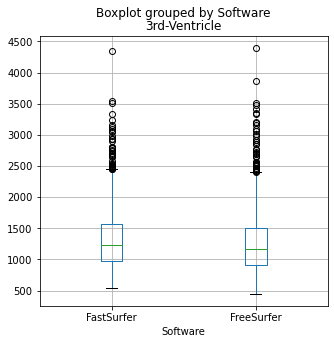

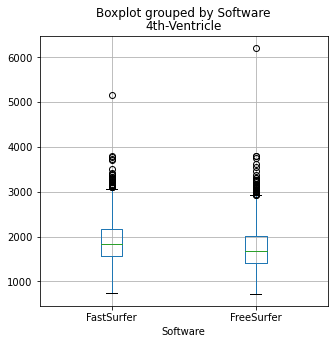

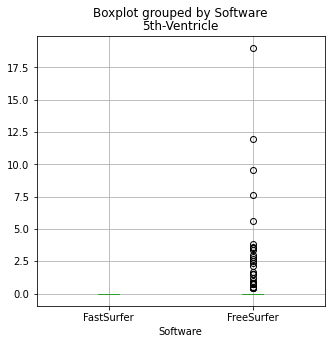

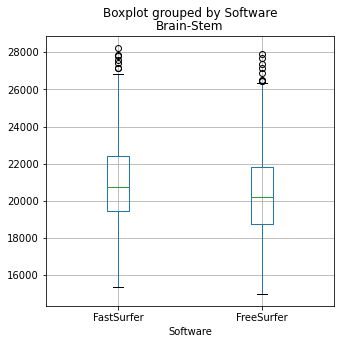

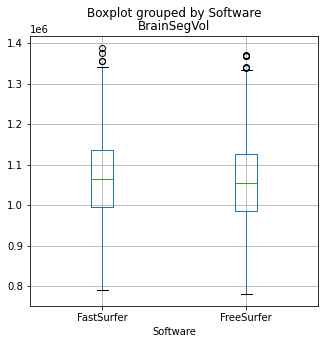

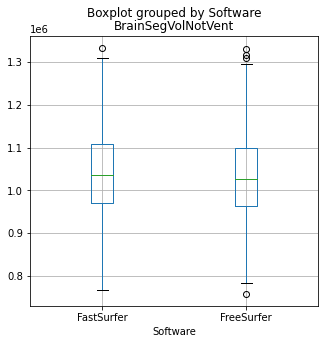

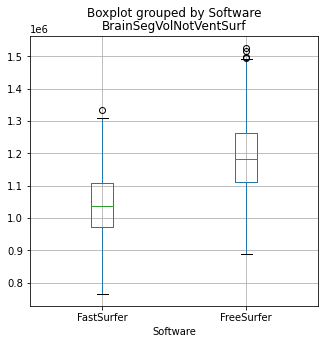

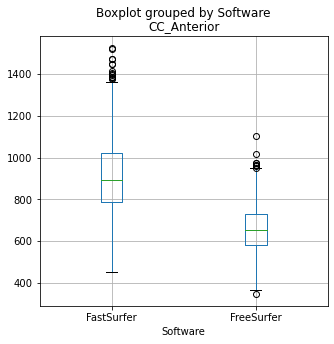

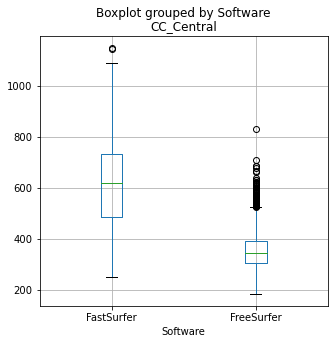

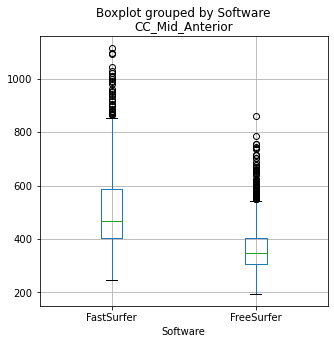

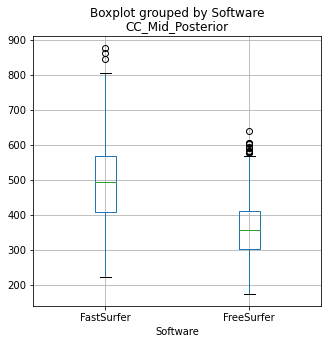

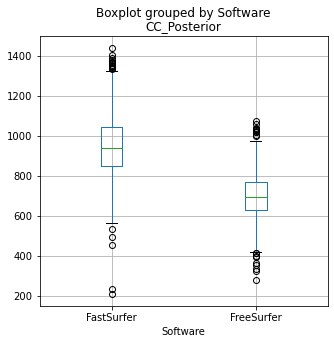

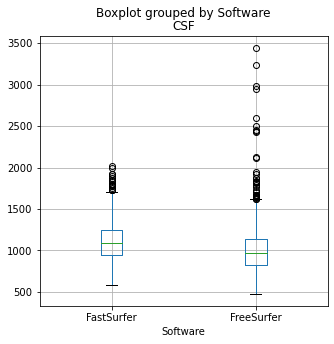

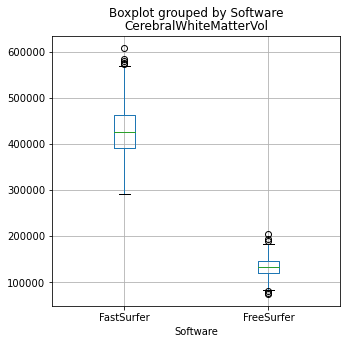

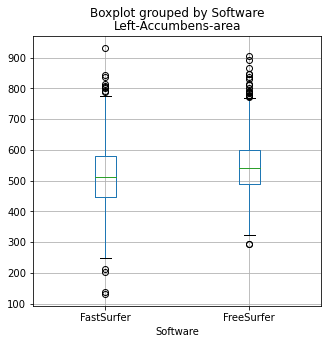

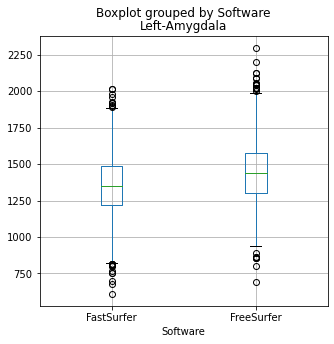

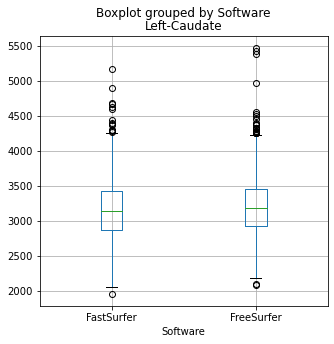

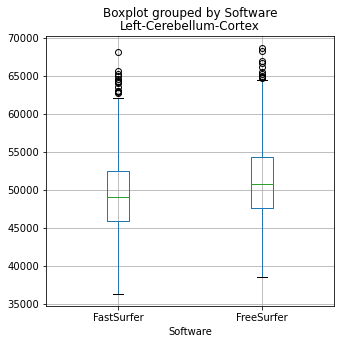

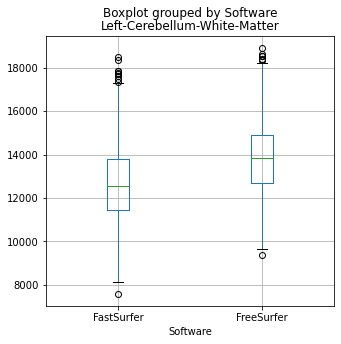

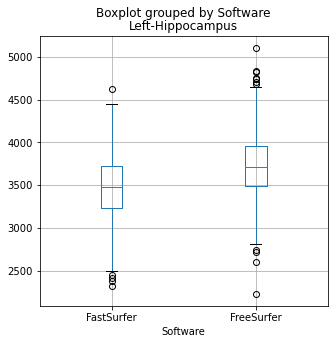

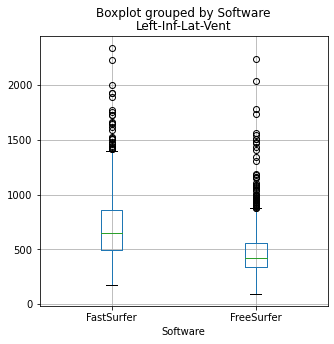

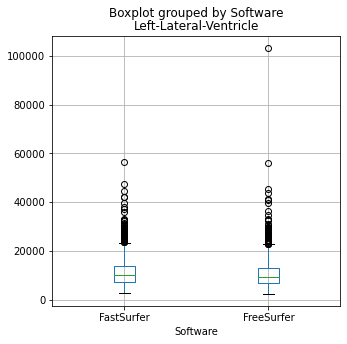

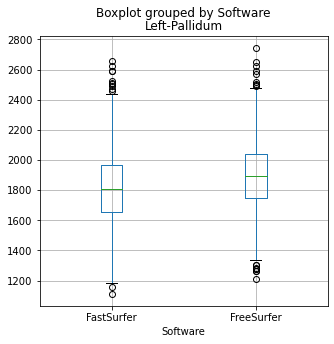

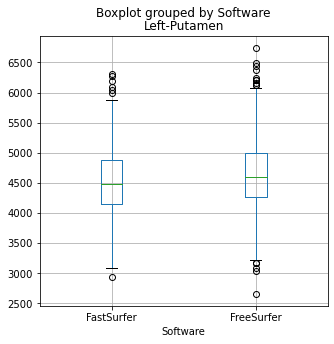

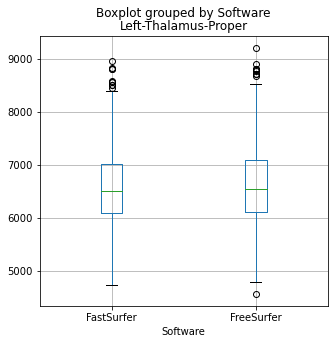

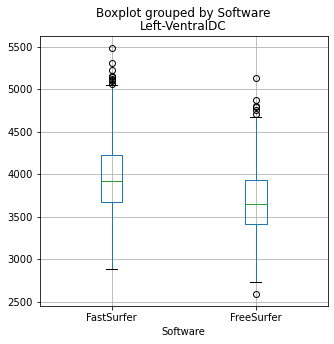

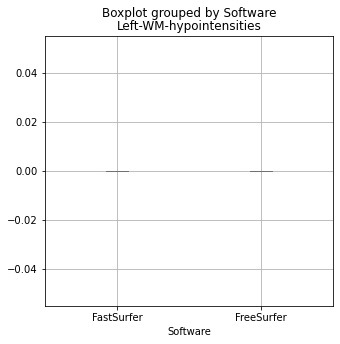

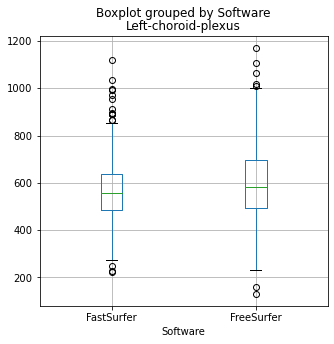

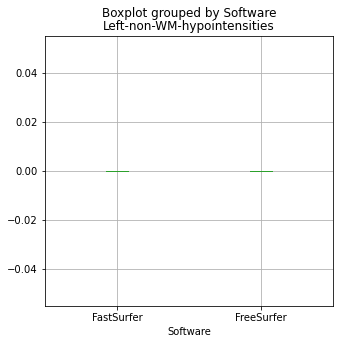

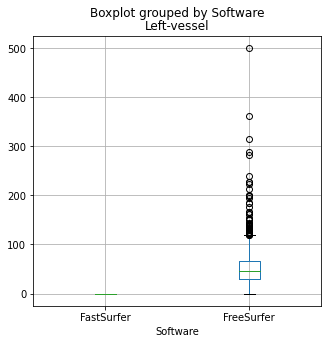

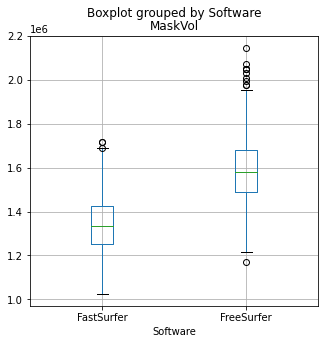

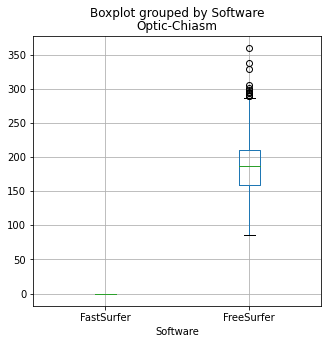

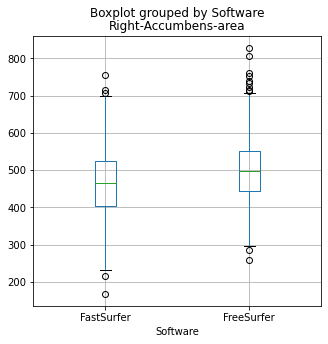

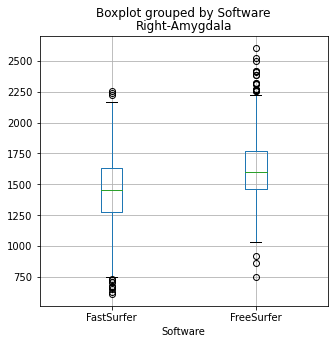

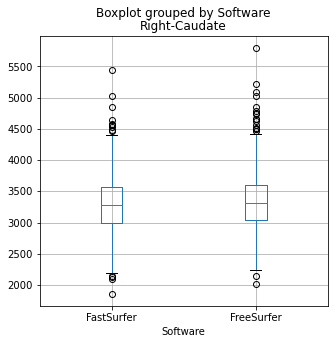

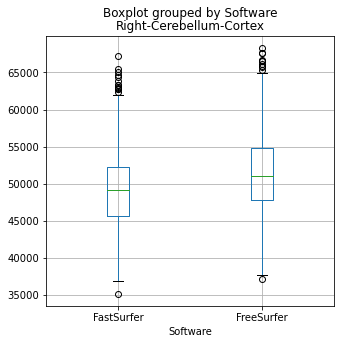

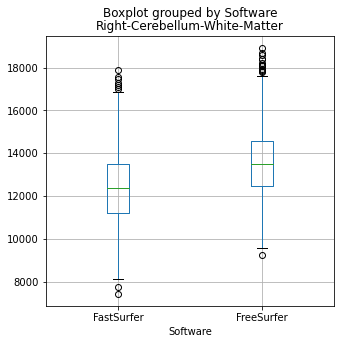

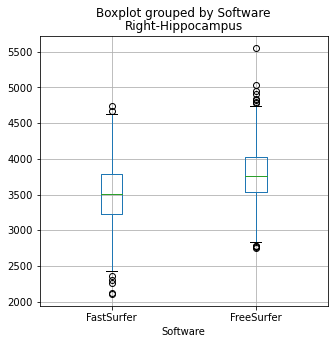

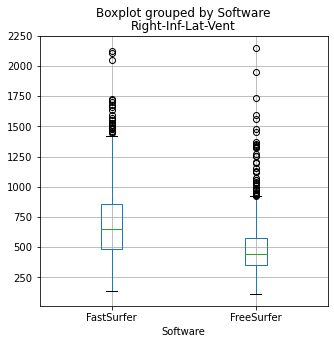

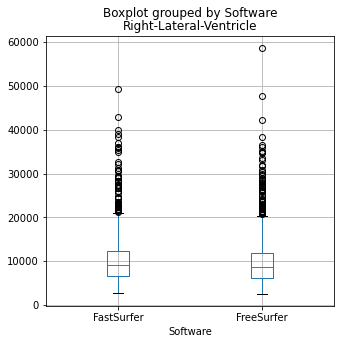

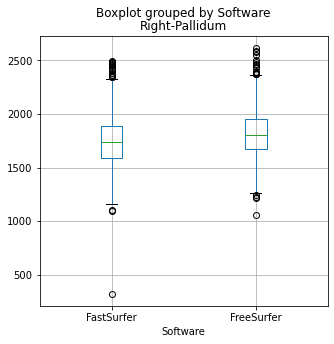

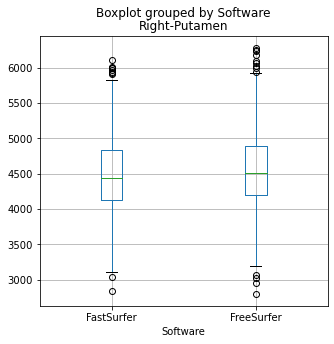

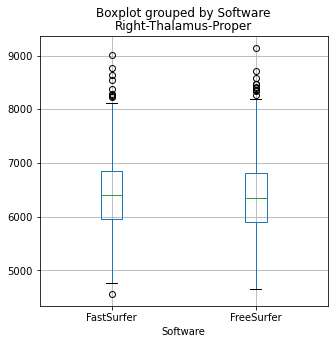

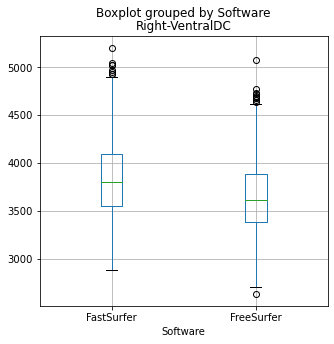

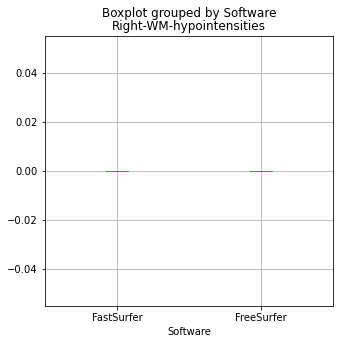

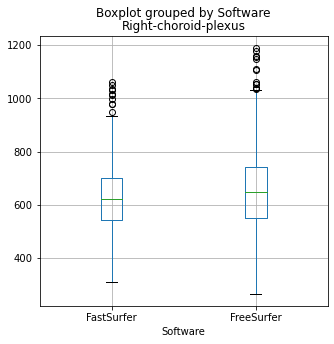

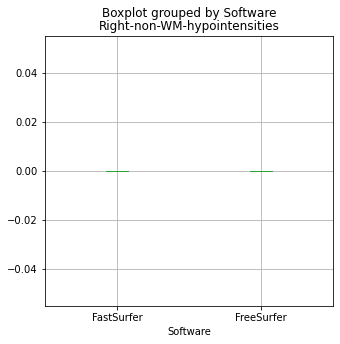

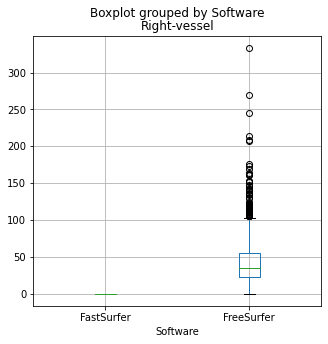

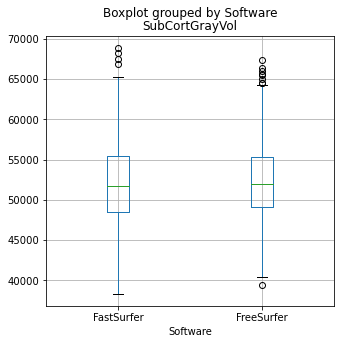

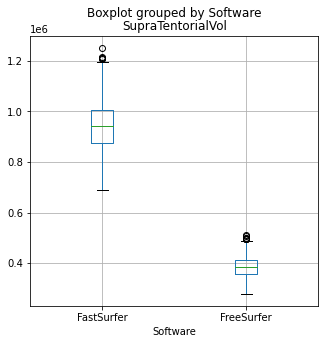

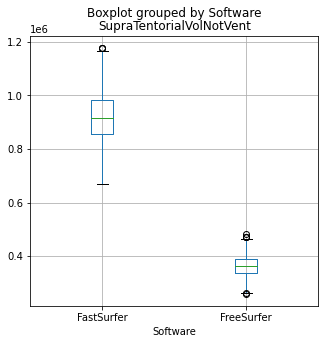

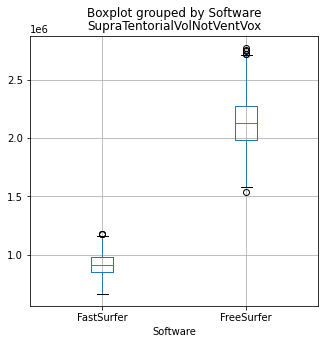

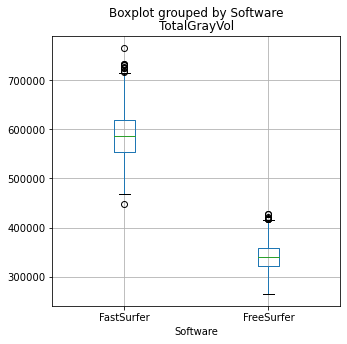

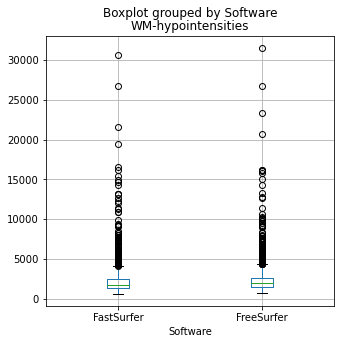

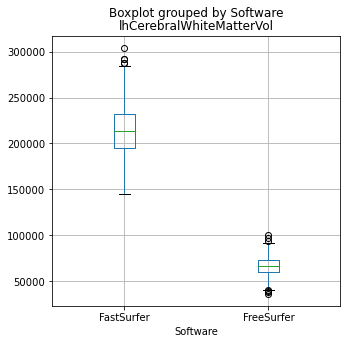

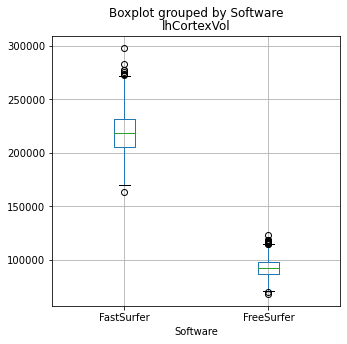

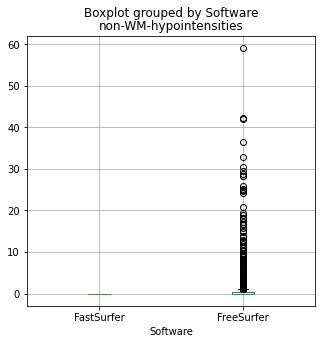

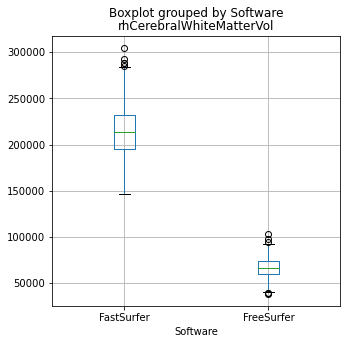

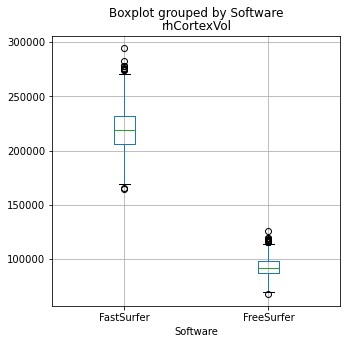

In [7]:
#Boxplots

for i in range(len(concat_df.columns.tolist())):
    concat_df.boxplot(column=concat_df.columns[i],by='Software',figsize=(5,5))
    plt.show()

### Histograms representation to check each variable distribution

We need to find out if the variables follow a normal distribution or not, in order to know how to analyse these regions.

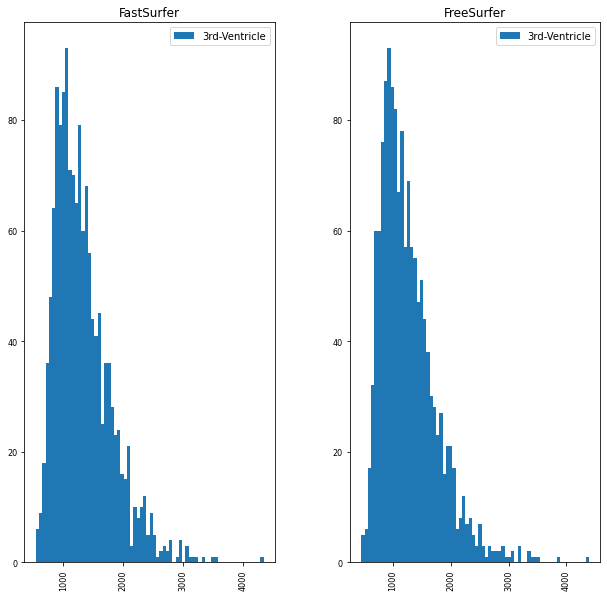

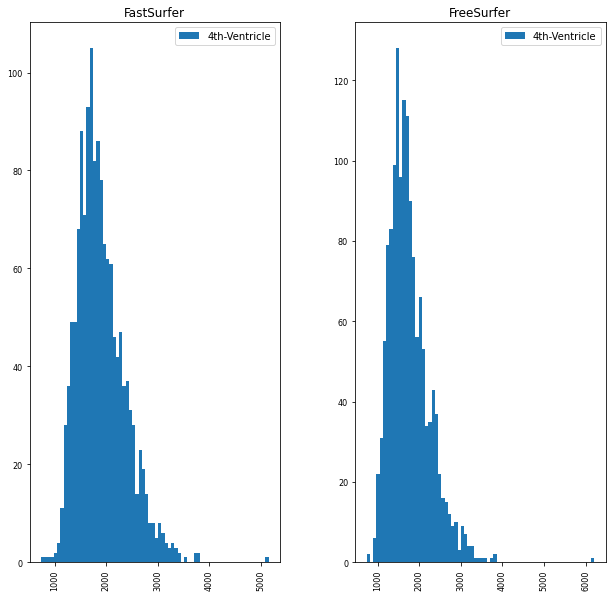

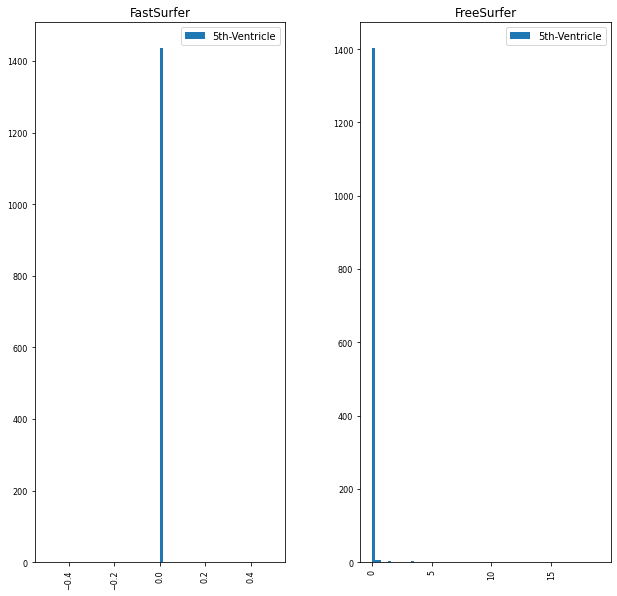

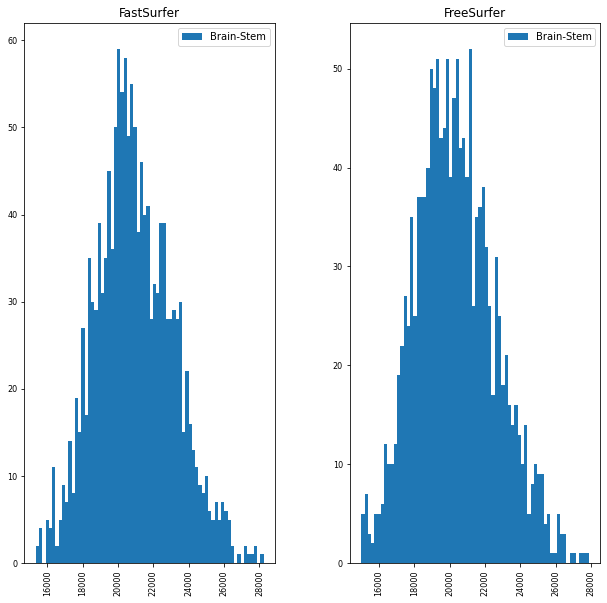

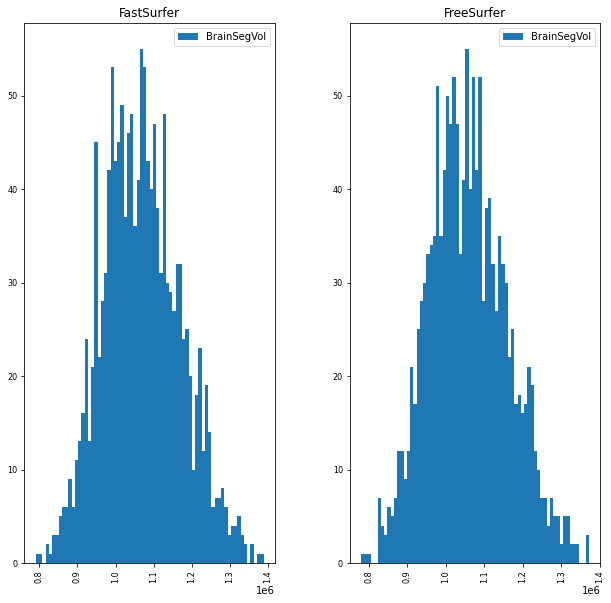

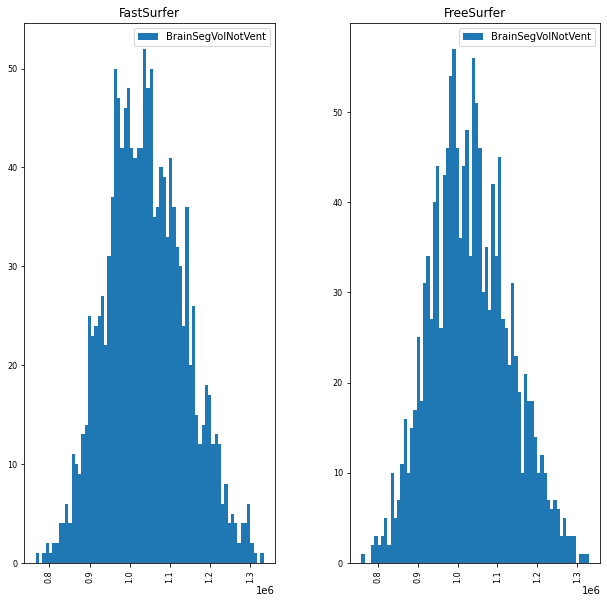

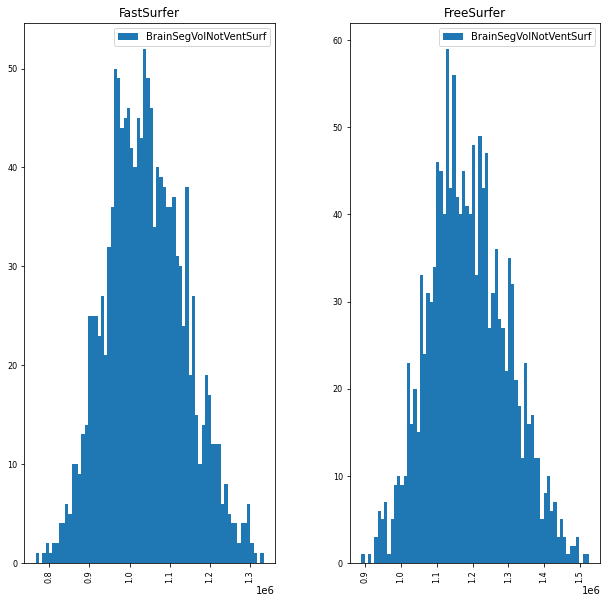

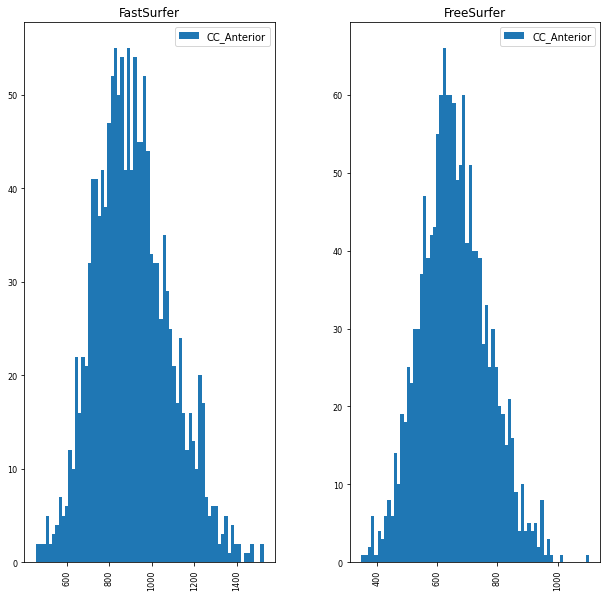

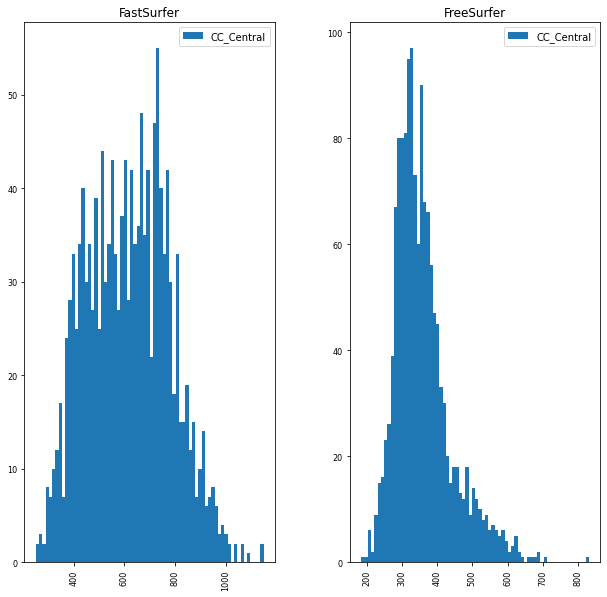

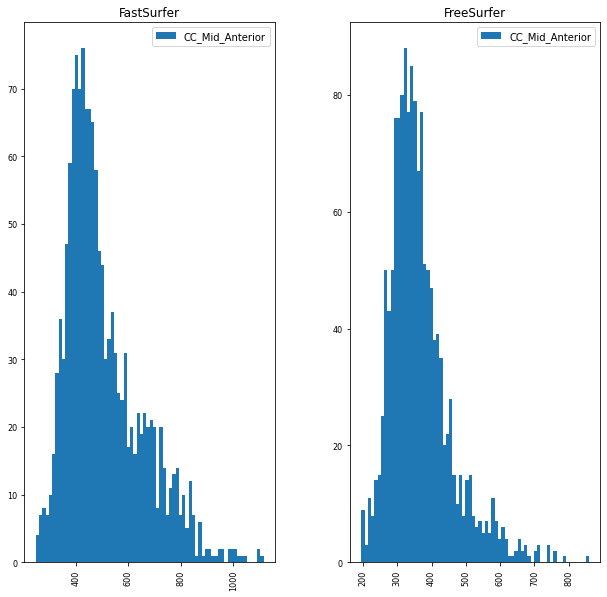

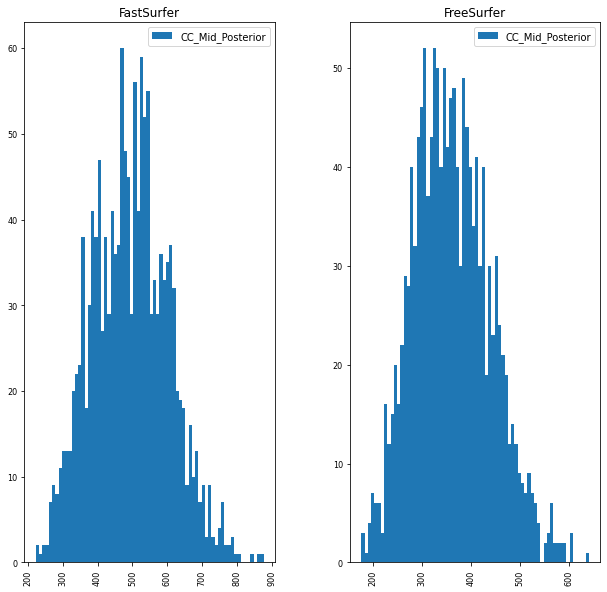

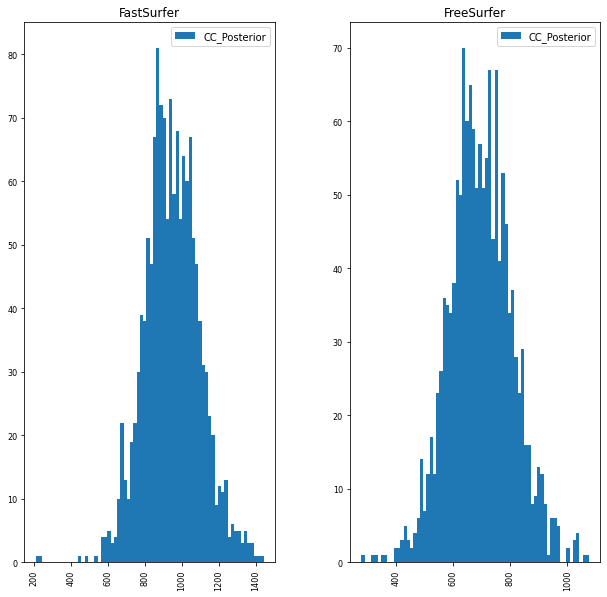

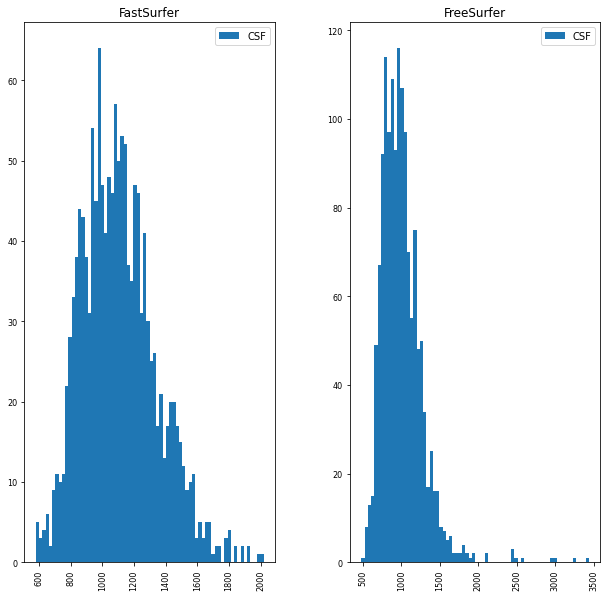

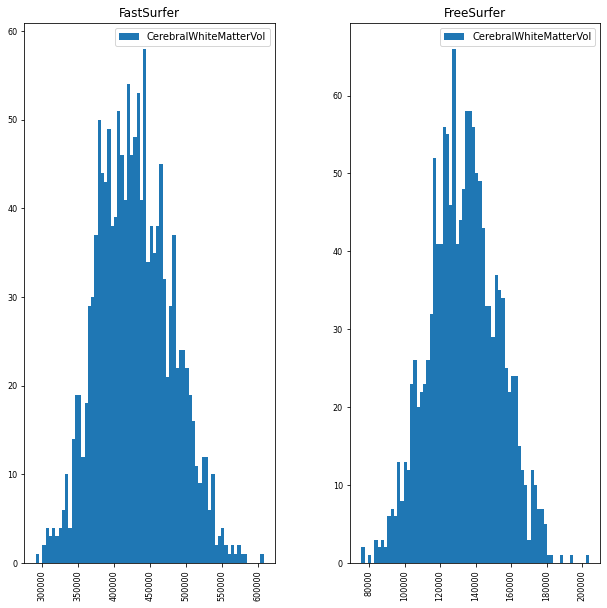

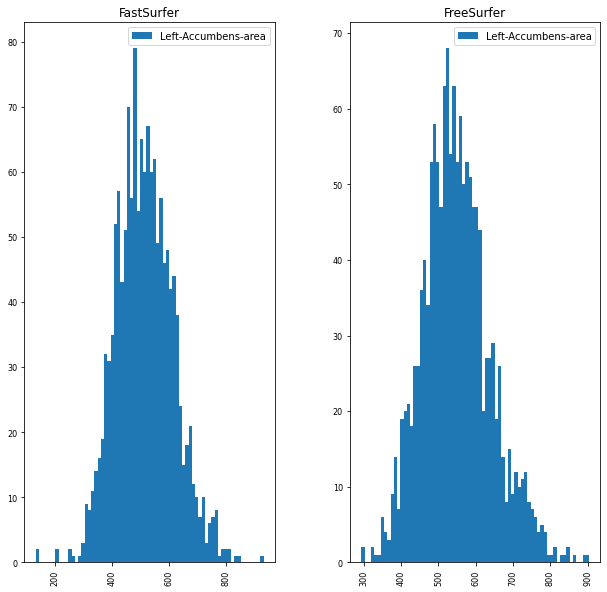

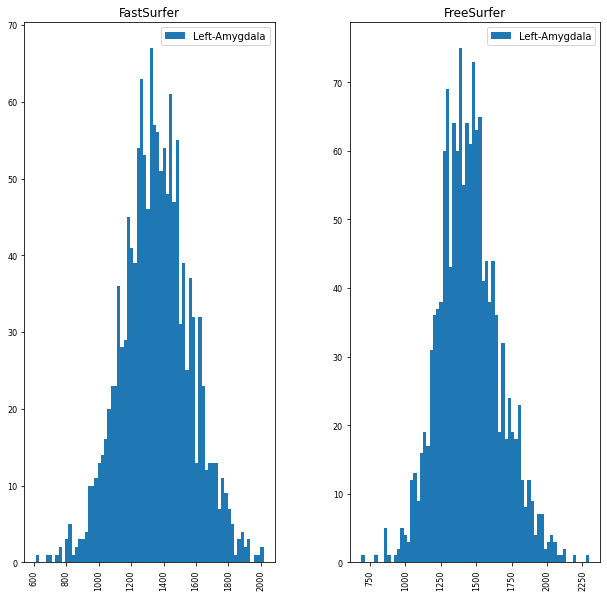

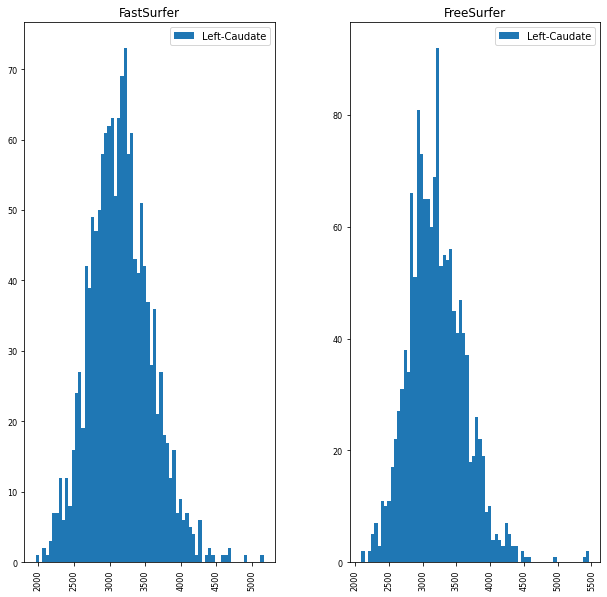

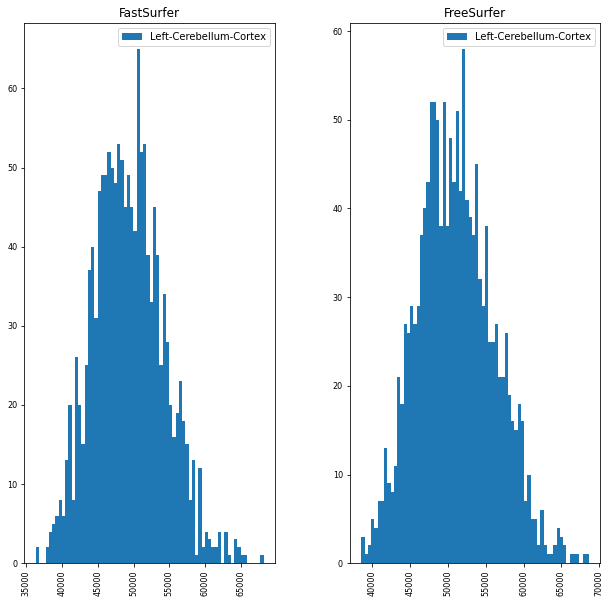

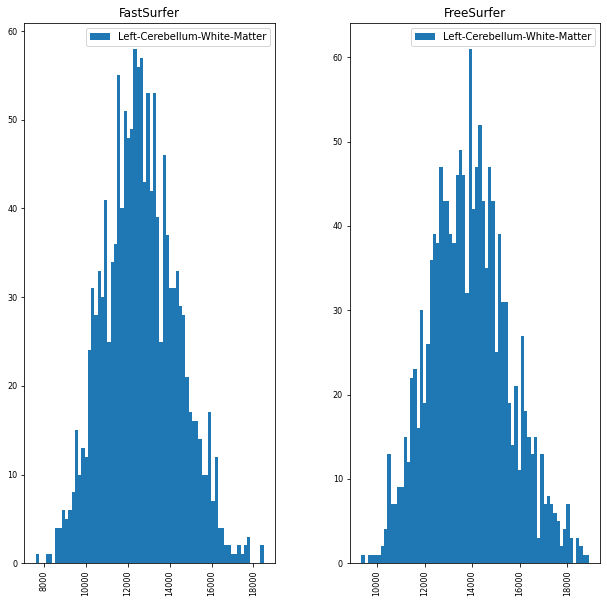

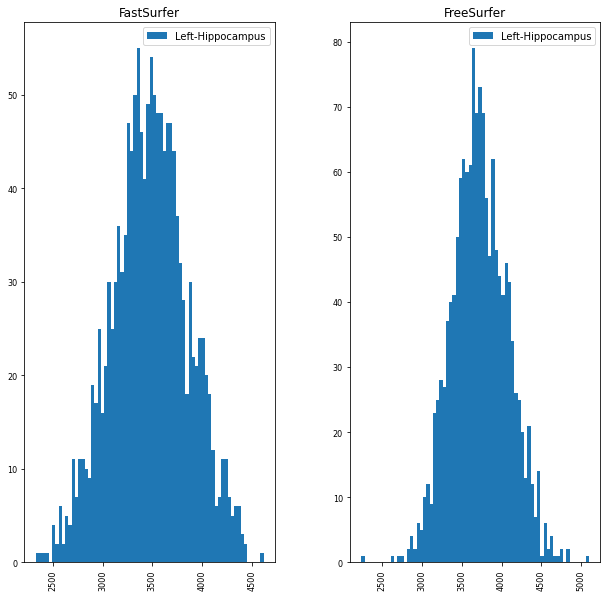

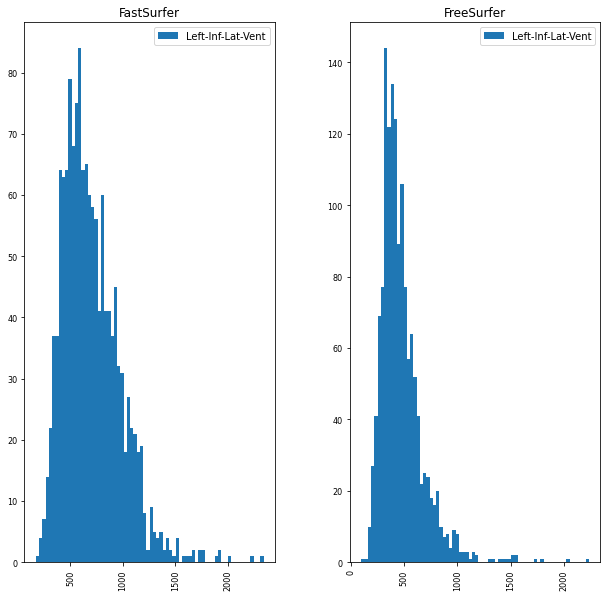

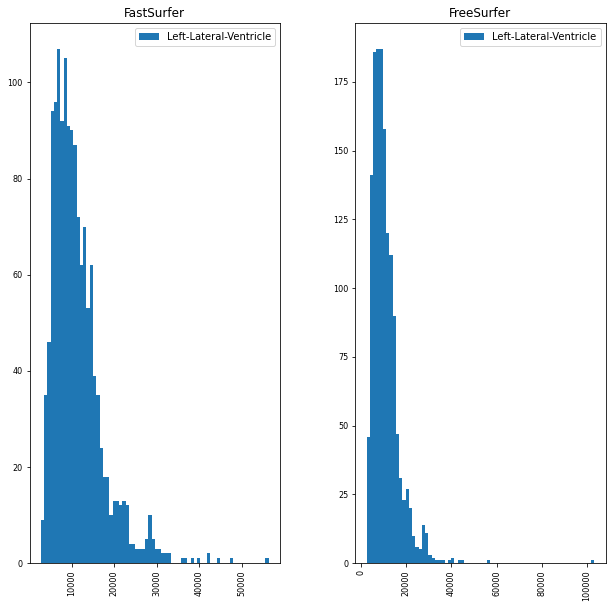

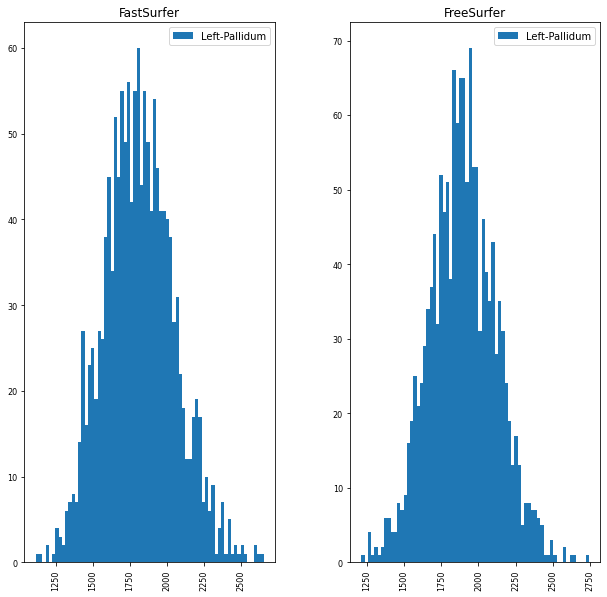

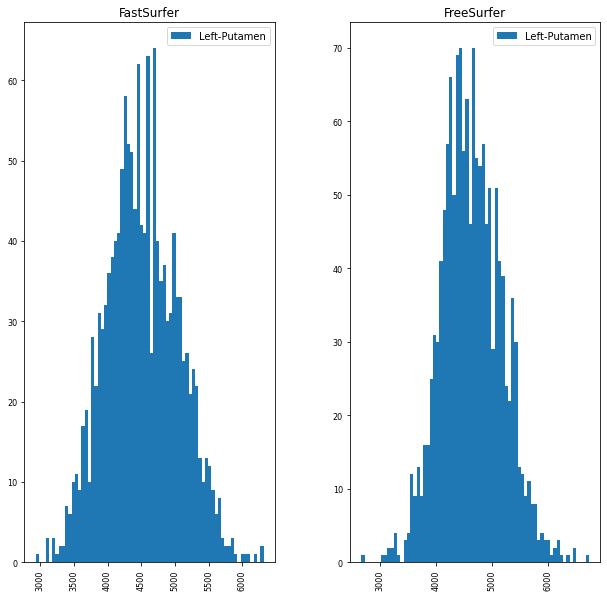

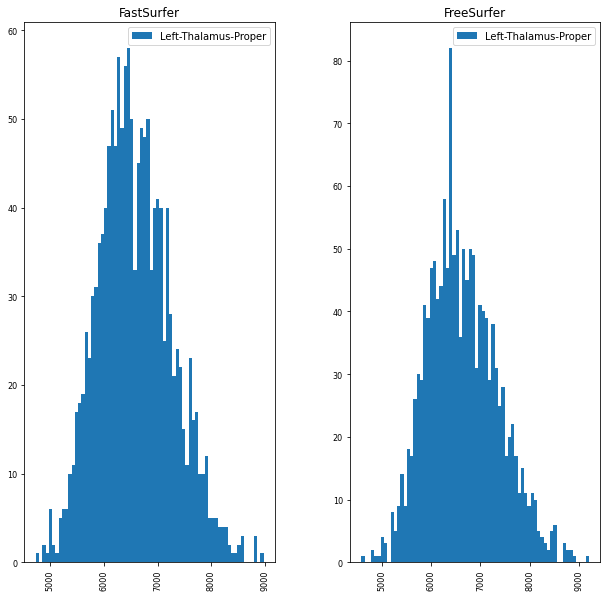

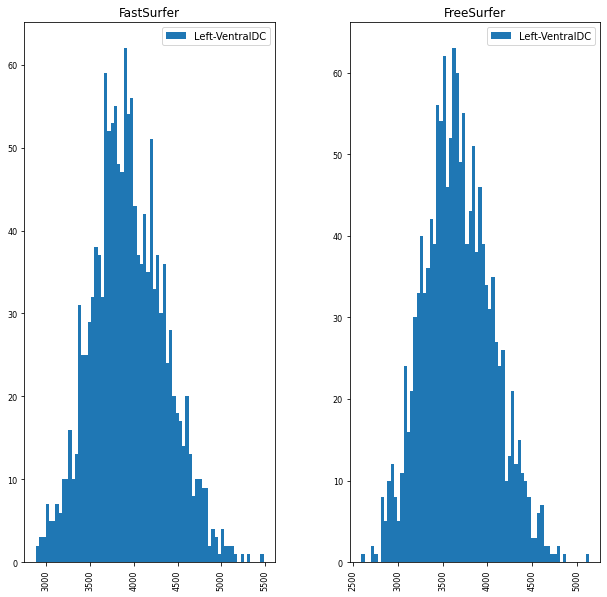

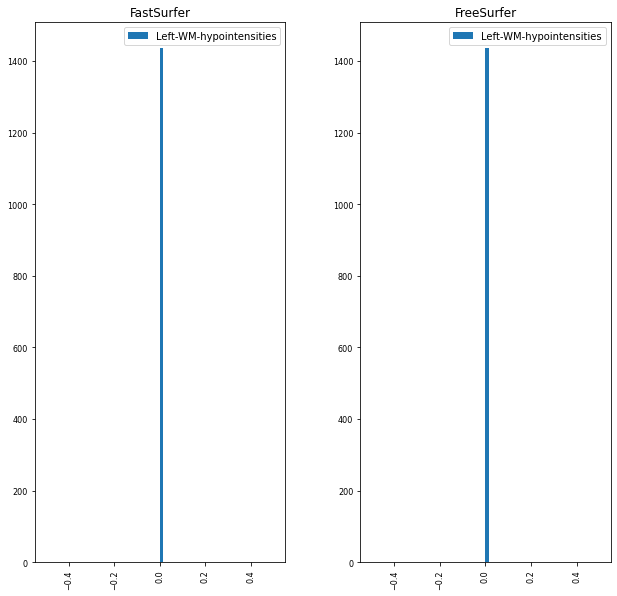

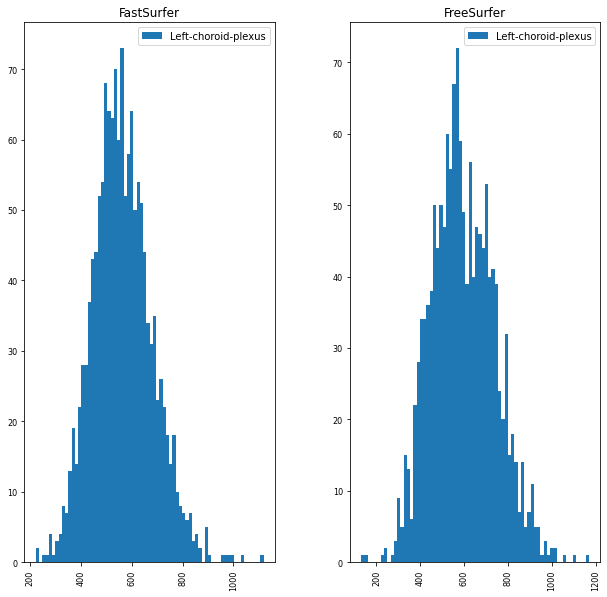

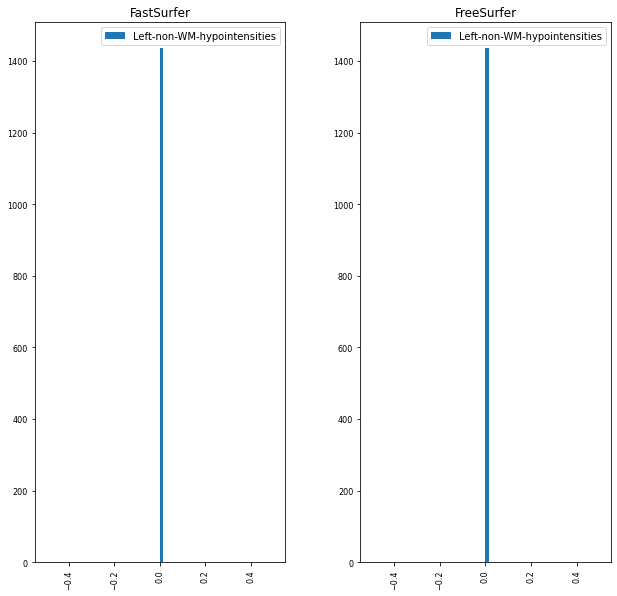

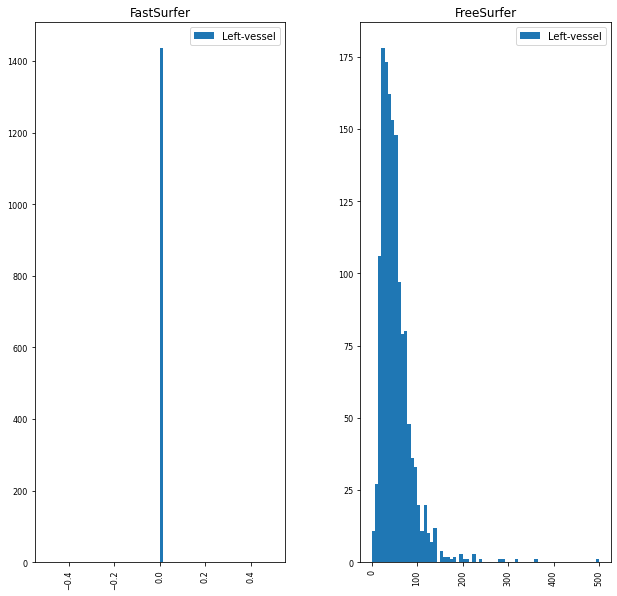

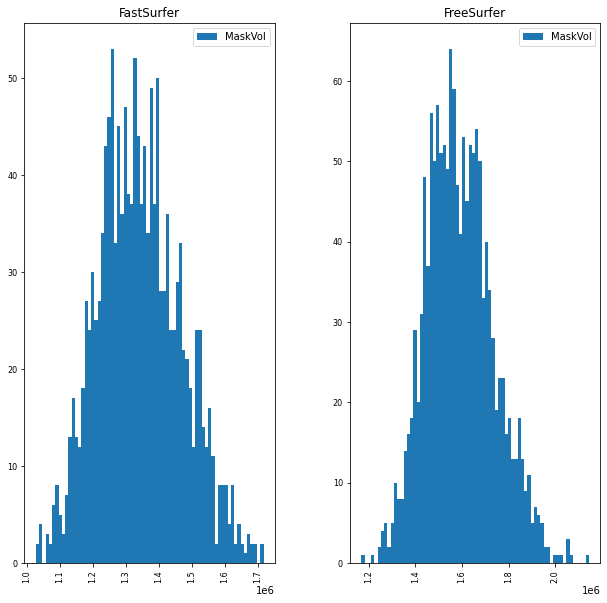

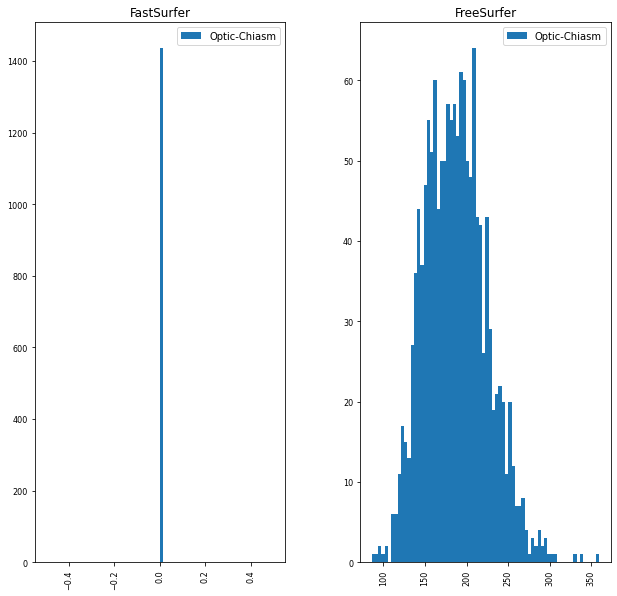

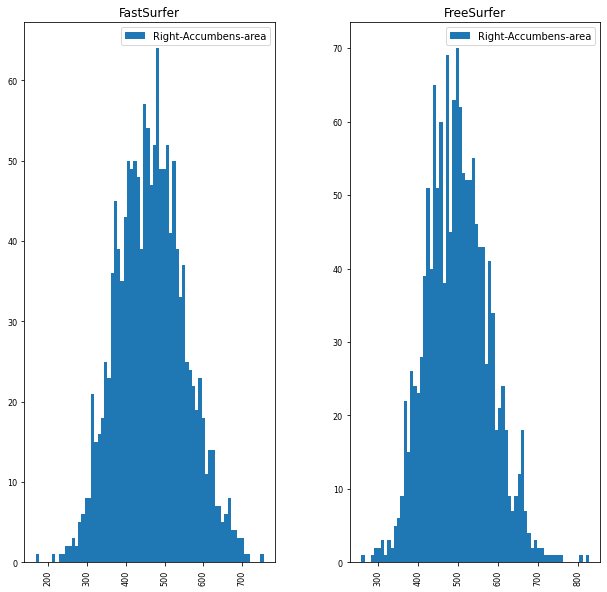

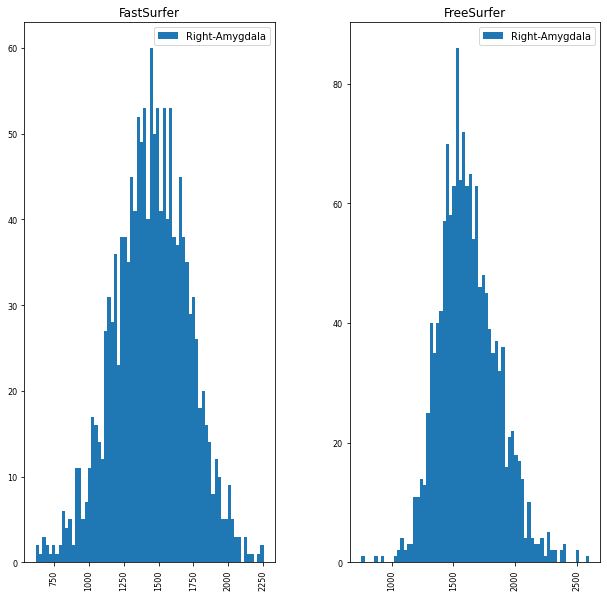

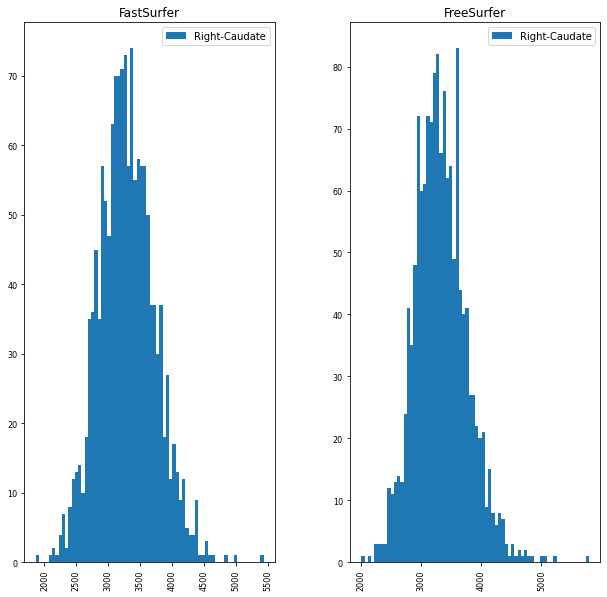

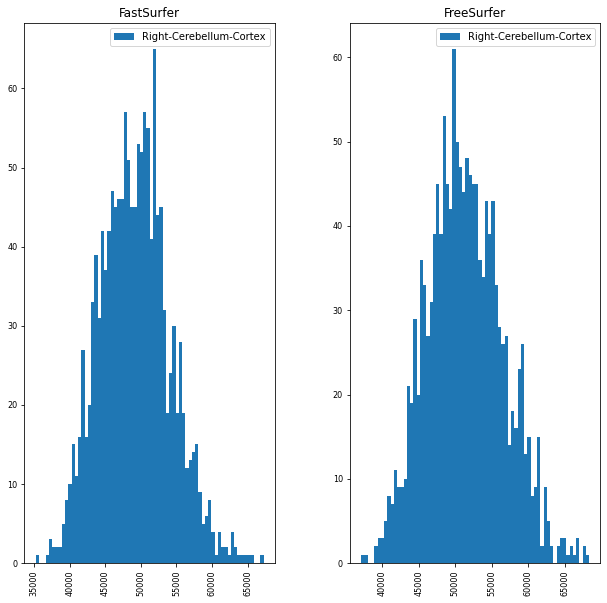

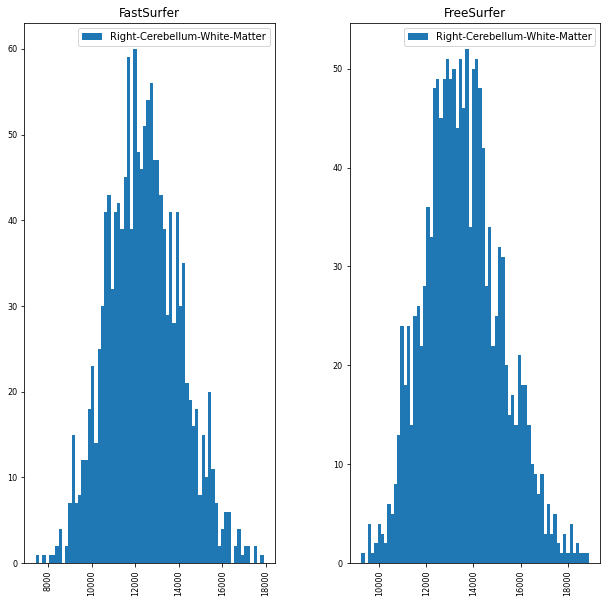

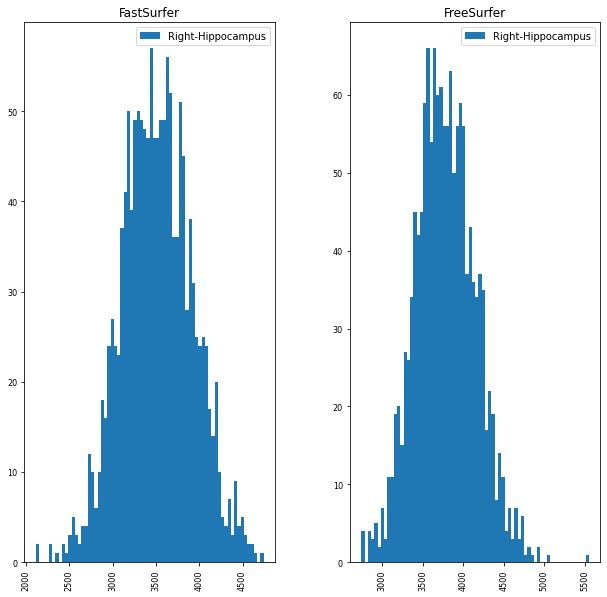

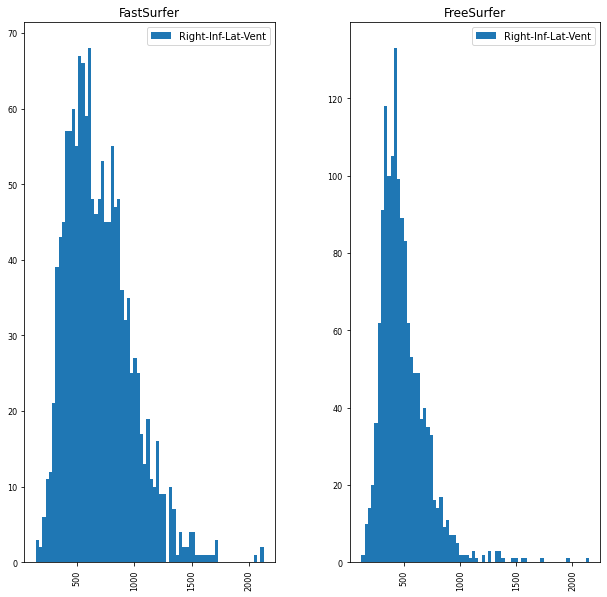

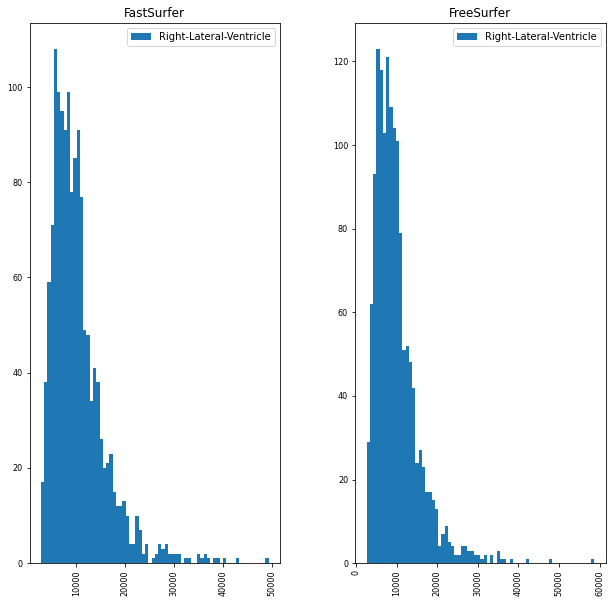

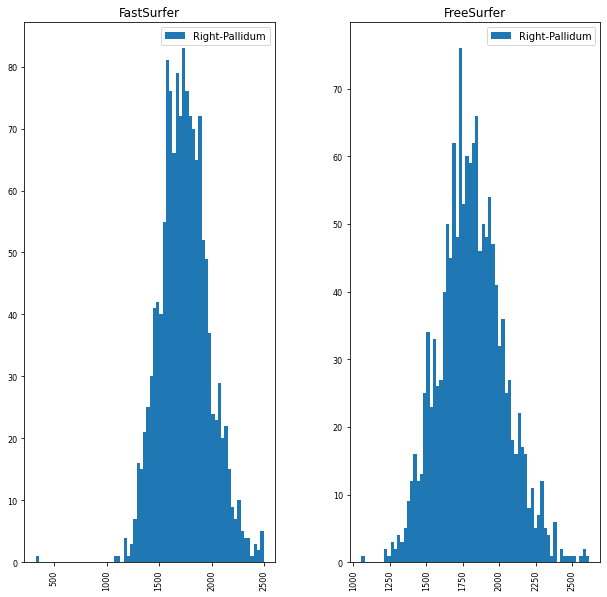

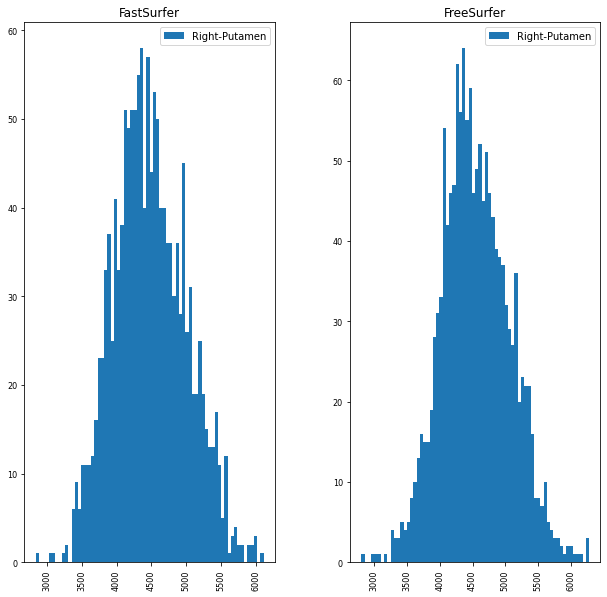

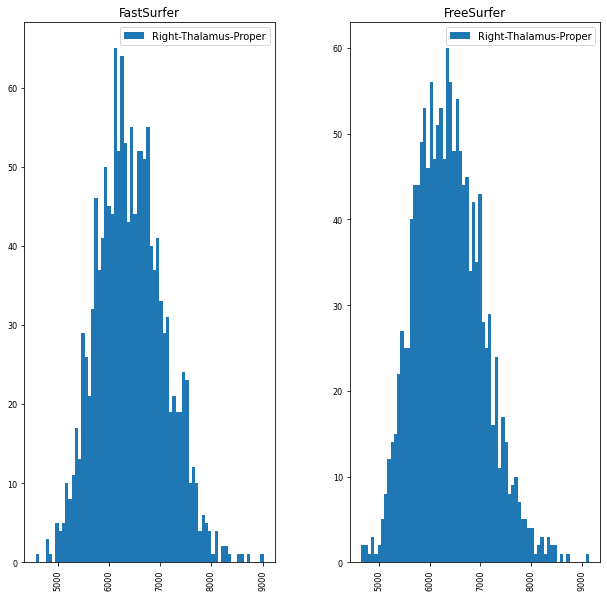

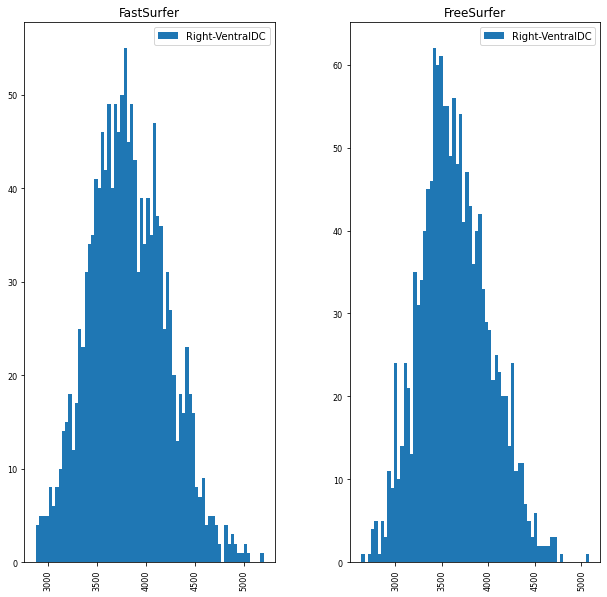

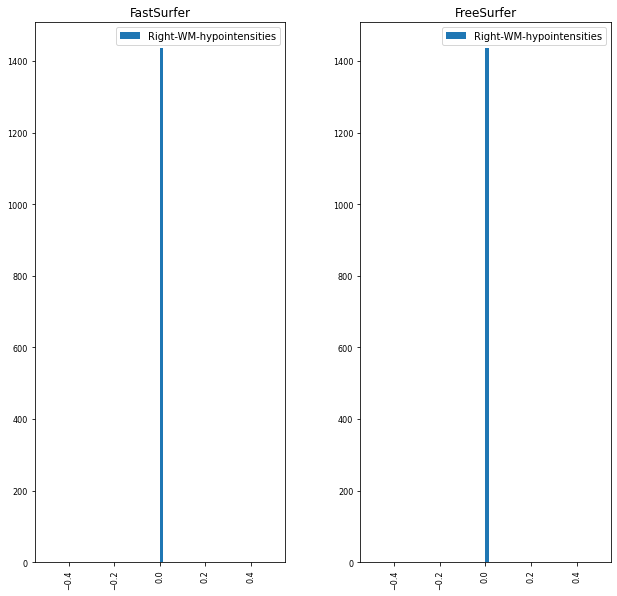

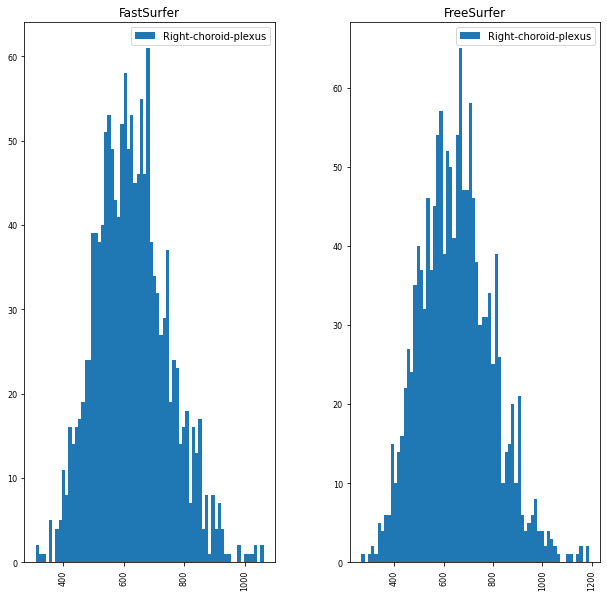

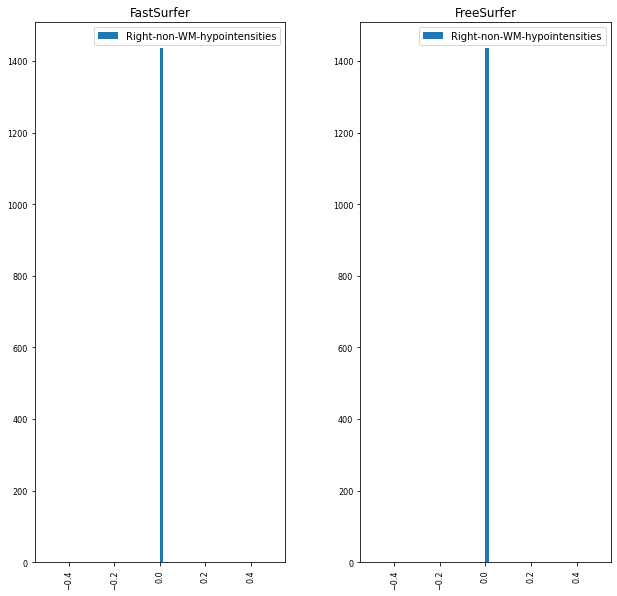

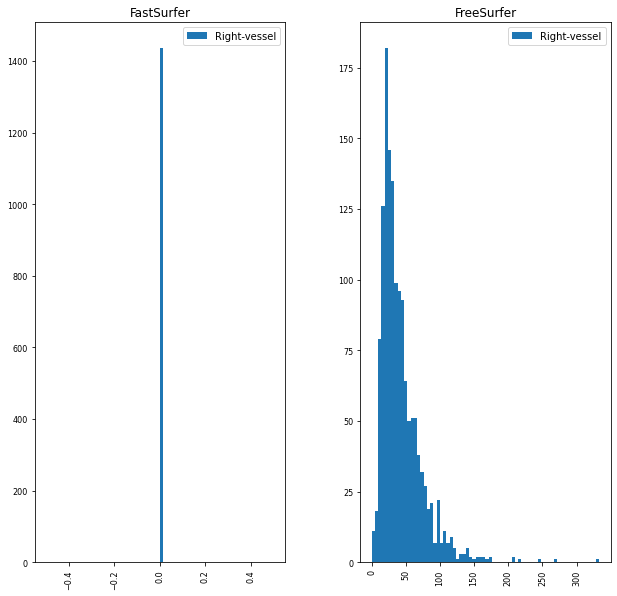

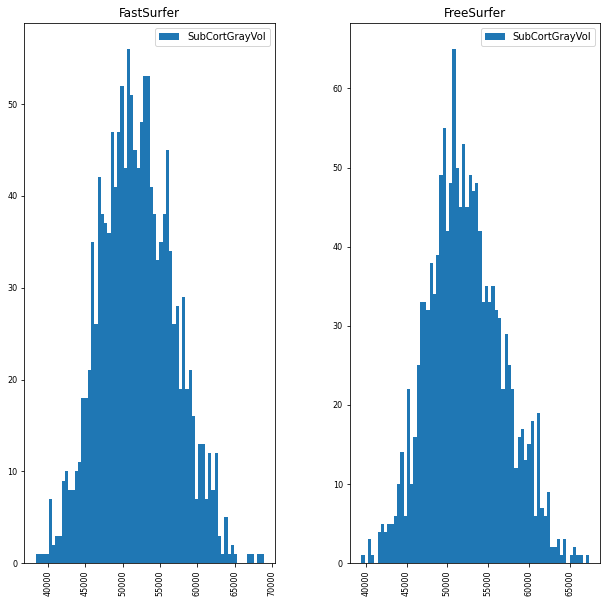

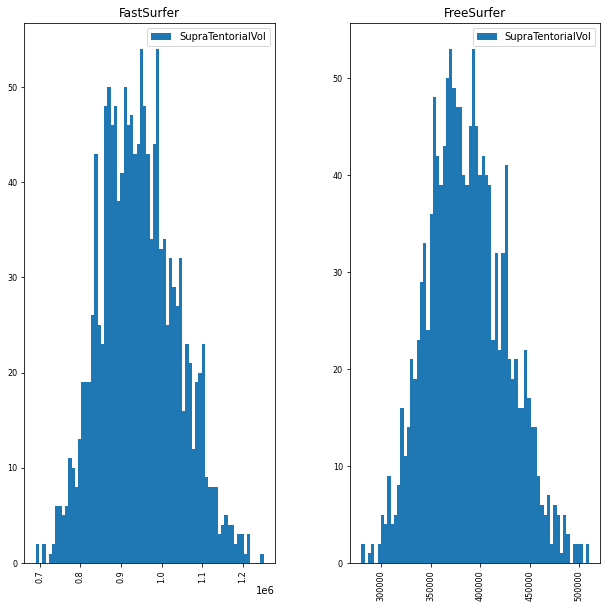

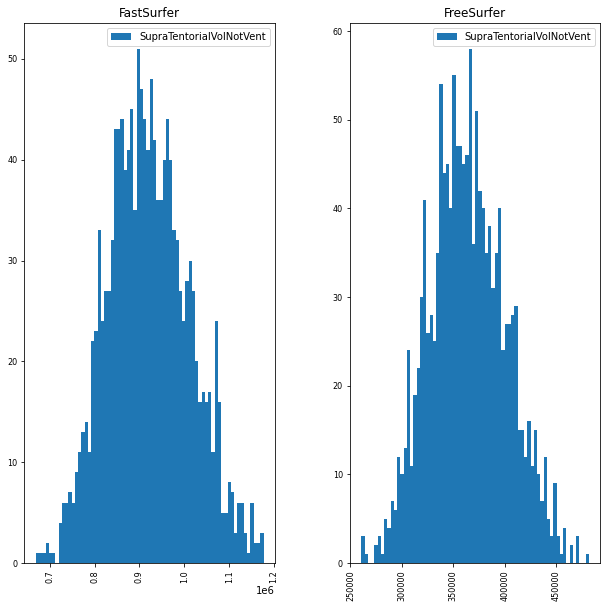

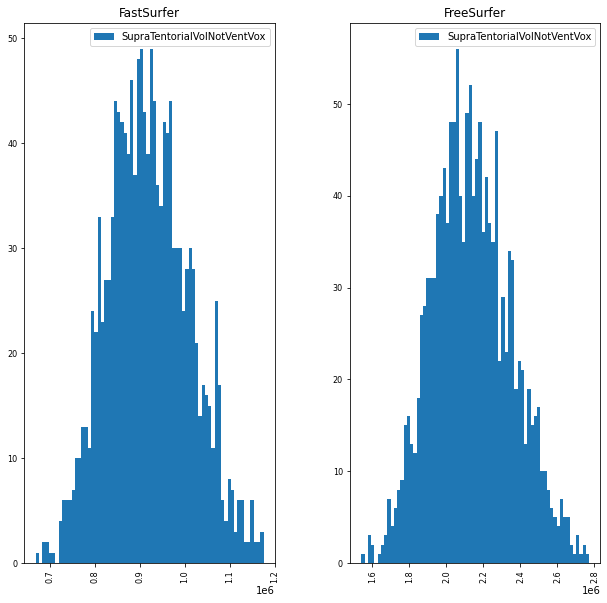

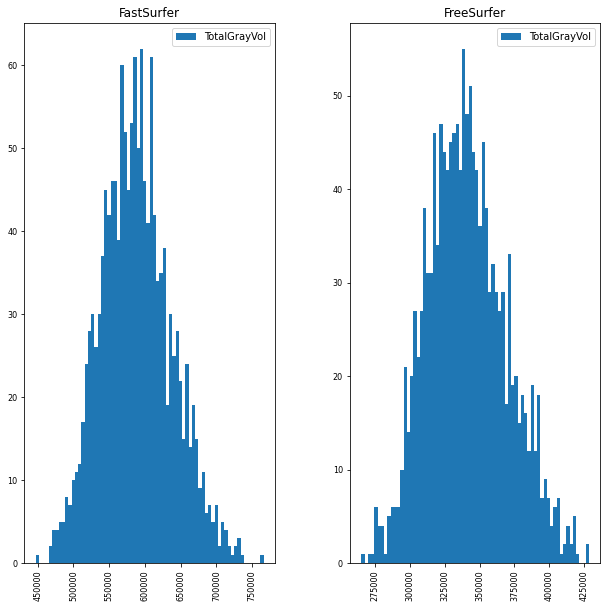

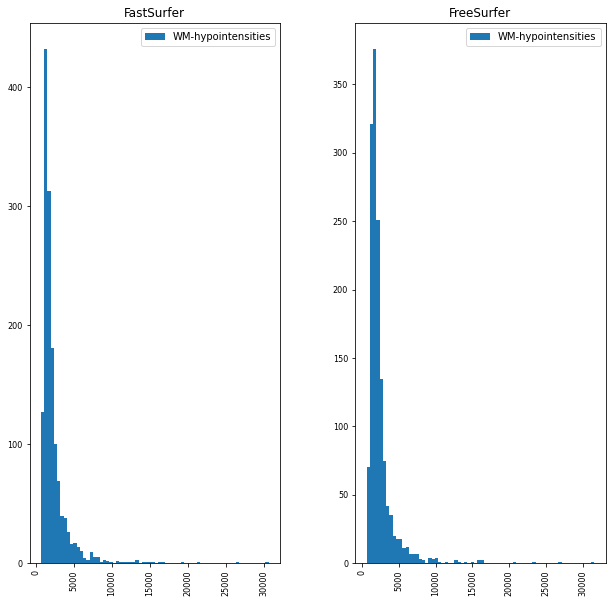

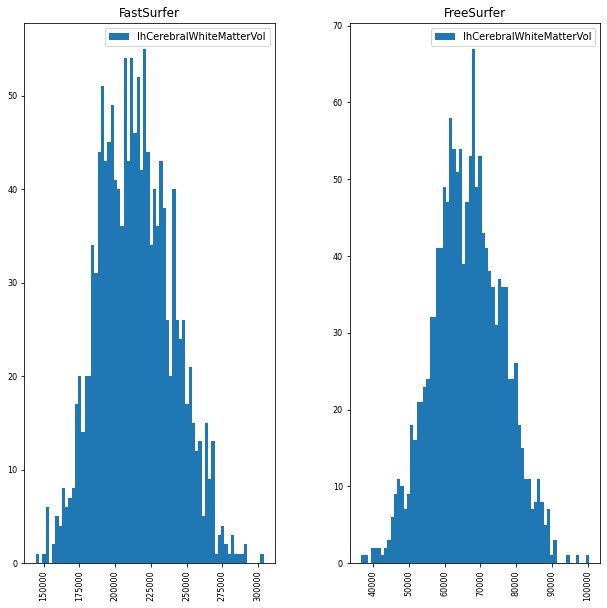

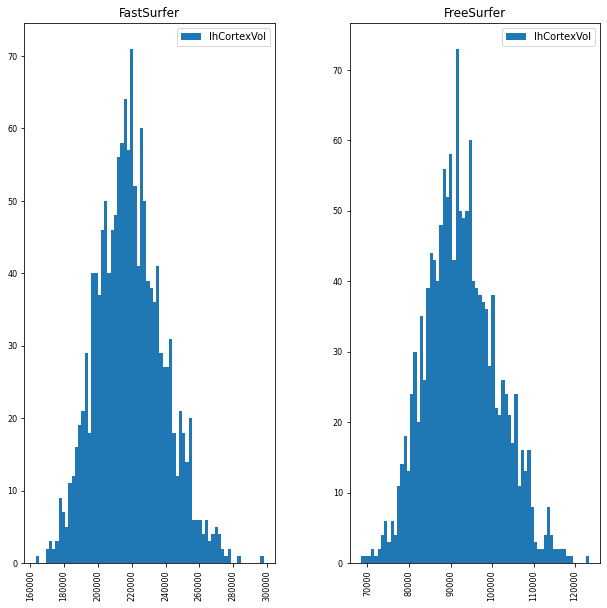

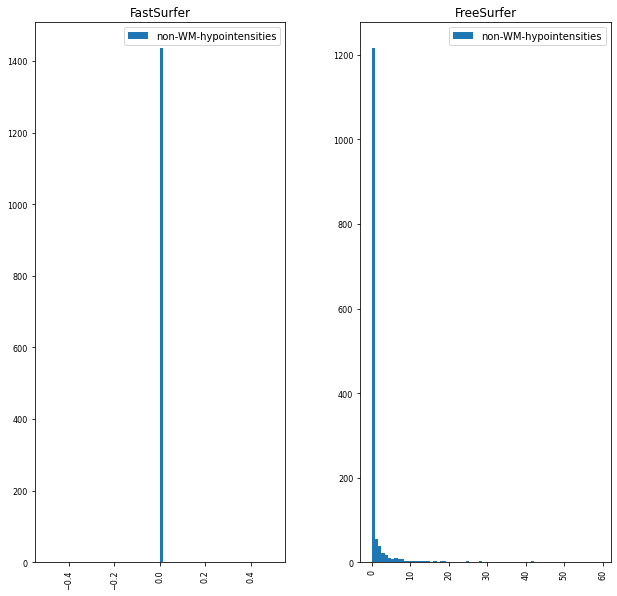

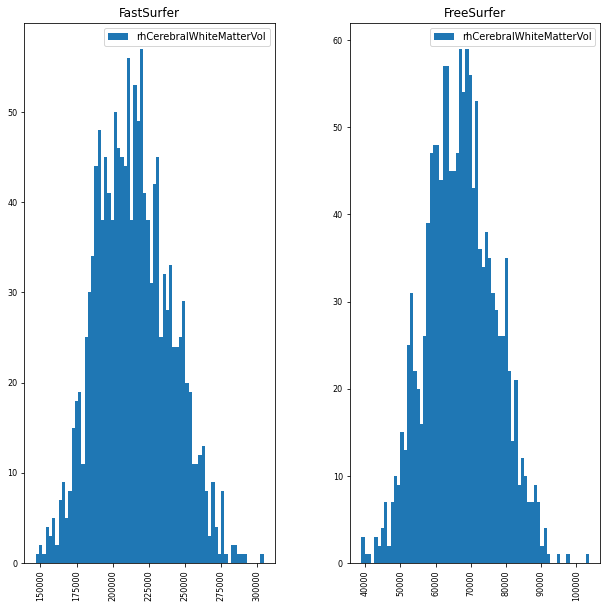

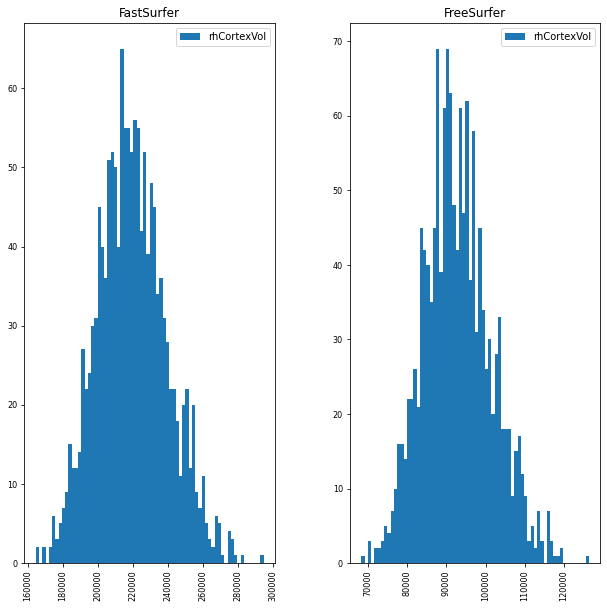

In [8]:
#Histograms

for i in range(len(concat_df.columns.tolist())):
    concat_df.hist(column=concat_df.columns[i],by='Software',figsize=(10,10), bins=70, xlabelsize=8, ylabelsize=8, legend=True)
    plt.show()

After seeing the histograms, we can't conclude that our regions follow normal distributions. In order to confirm this hypothesis, we will make a normality test to find it out

### Stats description grouped by Software

In [9]:
datasets_descriptions = concat_df.groupby('Software').describe()
datasets_descriptions

3rd-Ventricle                                                   \
                   count         mean         std    min     25%      50%   
Software                                                                    
FastSurfer        1436.0  1329.109192  471.575817  542.2  982.85  1235.55   
FreeSurfer        1436.0  1269.649721  491.065262  453.6  915.45  1163.95   

                             4th-Ventricle               ...  \
                 75%     max         count         mean  ...   
Software                                                 ...   
FastSurfer  1571.275  4341.0        1436.0  1904.978552  ...   
FreeSurfer  1512.350  4393.4        1436.0  1756.532521  ...   

           rhCerebralWhiteMatterVol                rhCortexVol                 \
                                75%            max       count           mean   
Software                                                                        
FastSurfer            231607.756397  304417.018195      1436.0  219691.038880   
FreeSurfer             73770.500836  103591.790771      1436.0   92854.378742   

                                                                       \
                     std            min            25%            50%   
Software                                                                
FastSurfer  19845.453668  164727.196708  206392.695216  218745.619096   
FreeSurfer   8636.973803   68374.658531   86985.152221   92234.102584   

                                          
                      75%            max  
Software                                  
FastSurfer  232327.766131  294506.516104  
FreeSurfer   98349.882748  126362.882725  

[2 rows x 472 columns]

In [10]:
#Resetting the index to call Software column easily

concat_df.reset_index(level='Software', inplace=True)

In [11]:
concat_df.head()

Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject                                                                        
10010    FastSurfer         1252.3         1545.0            0.0     23478.7   
10010    FreeSurfer         1159.4         1573.8            0.0     23742.3   
10011    FastSurfer         1395.7         1464.9            0.0     20967.4   
10011    FreeSurfer         1275.4         1295.1            0.0     19752.6   
10012    FastSurfer         1373.6         1385.9            0.0     21221.4   

          BrainSegVol  BrainSegVolNotVent  BrainSegVolNotVentSurf  \
subject                                                             
10010    1.130872e+06        1.103652e+06            1.103846e+06   
10010    1.120108e+06        1.094086e+06            1.279596e+06   
10011    1.013429e+06        9.930320e+05            9.933133e+05   
10011    9.905536e+05        9.711305e+05            1.121663e+06   
10012    1.074364e+06        1.042517e+06            1.042115e+06   

         CC_Anterior  CC_Central  ...  SupraTentorialVol  \
subject                           ...                      
10010         1159.2       914.5  ...      985329.127032   
10010          725.7       372.8  ...      404450.375411   
10011          703.7       339.2  ...      895651.319629   
10011          518.1       258.3  ...      363215.767095   
10012          981.2       712.4  ...      958722.844341   

         SupraTentorialVolNotVent  SupraTentorialVolNotVentVox   TotalGrayVol  \
subject                                                                         
10010               962081.127032                     960743.0  606493.534351   
10010               382244.984786                    2241017.0  361617.995000   
10011               879223.319629                     877813.0  579274.765061   
10011               347508.095220                    2018412.0  327493.800819   
10012               930585.844341                     930082.0  584596.562471   

         WM-hypointensities  lhCerebralWhiteMatterVol    lhCortexVol  \
subject                                                                
10010                2402.2             235160.339637  220400.716587   
10010                2252.6              74117.660344   94304.139146   
10011                1071.5             195681.058639  218365.416744   
10011                1176.0              59804.103309   91502.673933   
10012                1390.8             215145.144558  219214.854598   

         non-WM-hypointensities  rhCerebralWhiteMatterVol    rhCortexVol  
subject                                                                   
10010                       0.0             231447.253043  215464.817764  
10010                       0.0              72663.454442   92369.043355  
10011                       0.0             196481.495929  217480.348316  
10011                       0.0              61892.191092   89935.892511  
10012                       0.0             218237.137312  225925.707873  

[5 rows x 60 columns]

### Creation of functions to obtain mean difference and standard deviation

In [12]:
def dif_medias(atributo):
    
    dif_observada = (concat_df[atributo][concat_df.Software == 'FastSurfer'].mean()
                 - concat_df[atributo][concat_df.Software == 'FreeSurfer'].mean())
    if dif_observada > 0:
        mayor = '(bigger in FastSurfer)'
    elif dif_observada < 0:
        mayor = '(bigger in FreeSurfer)'
    else:
        mayor = ''
    print(f"Mean difference observed in {atributo}: {abs(dif_observada)} {mayor}")

def desv(atributo):
    desv_FastS = concat_df[atributo][concat_df.Software == 'FastSurfer'].std()
    desv_FreeS = concat_df[atributo][concat_df.Software == 'FreeSurfer'].std()

    print(f"Standard deviation observed in {atributo} in FastSurfer: {desv_FastS}")
    print(f"Standard deviation observed in {atributo} in FreeSurfer: {desv_FreeS}")

### Creation of function to obtain some distribution graphics

In [13]:
# Observed distribution graphics
# ==============================================================================

def graficos(atributo):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
    sns.violinplot(
        x     = concat_df[atributo],
        y     = concat_df.Software,
        color = ".8",
        ax    = axs[0]
    )
    sns.stripplot(
        x    = concat_df[atributo],
        y    = concat_df.Software,
        data = concat_df,
        size = 4,
        jitter  = 0.1,
        palette = 'tab10',
        ax = axs[0]
    )
    axs[0].set_title('Value distributions by group')
    axs[0].set_ylabel('Software')
    axs[0].set_xlabel(atributo);

    for Software in concat_df.Software.unique():
        datos_temp = concat_df[concat_df.Software == Software][atributo]
        datos_temp.plot.kde(ax=axs[1], label=Software)
        axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

    axs[1].set_title('Value distributions by group')
    axs[1].set_xlabel(atributo);
    axs[1].legend()

    fig.tight_layout();



### Calculating all mean differences and standard deviations

In [14]:
for i in concat_df.columns:
    if i == 'Software':
        continue
    else:
        dif_medias(i)
        desv(i)
        print('\n')
        

Mean difference observed in 3rd-Ventricle: 59.459470752089146 (bigger in FastSurfer)
Standard deviation observed in 3rd-Ventricle in FastSurfer: 471.5758165836377
Standard deviation observed in 3rd-Ventricle in FreeSurfer: 491.06526190456566


Mean difference observed in 4th-Ventricle: 148.4460306406686 (bigger in FastSurfer)
Standard deviation observed in 4th-Ventricle in FastSurfer: 466.1813345347092
Standard deviation observed in 4th-Ventricle in FreeSurfer: 485.62189577124303


Mean difference observed in 5th-Ventricle: 0.07110027855153203 (bigger in FreeSurfer)
Standard deviation observed in 5th-Ventricle in FastSurfer: 0.0
Standard deviation observed in 5th-Ventricle in FreeSurfer: 0.7463689858963435


Mean difference observed in Brain-Stem: 570.0629526462399 (bigger in FastSurfer)
Standard deviation observed in Brain-Stem in FastSurfer: 2170.9869405504724
Standard deviation observed in Brain-Stem in FreeSurfer: 2245.7255443270747


Mean difference observed in BrainSegVol: 10456.

<div class="alert alert-block alert-info">
Significant differences are visually observed in the following regions:

    -BrainSegVolNotVentSurf (bigger in FreeSurfer)
    -CC_Anterior (bigger in FastSurfer)
    -CC_Central (bigger in FastSurfer)
    -CC_Mid_Anterior (bigger in FastSurfer)
    -CC_Mid_Posterior (bigger in FastSurfer)
    -CC_Posterior (bigger in FastSurfer)
    -CerebralWhiteMatterVol (bigger in FastSurfer)
    -Left-Inf-Lat-Vent (bigger in FastSurfer)
    -MaskVol (bigger in FreeSurfer)
    -Right-Inf-Lat-Vent (bigger in FastSurfer)
    -SupraTentorialVol (bigger in FastSurfer)
    -SupraTentorialVolNotVent (bigger in FastSurfer)
    -SupraTentorialVolNotVentVox (bigger in FreeSurfer)
    -lhCerebralWhiteMatterVol (bigger in FastSurfer)
    -lhCortexVol (bigger in FastSurfer)
    -rhCerebralWhiteMatterVol (bigger in FastSurfer)
    -rhCortexVol (bigger in FastSurfer)

</div>

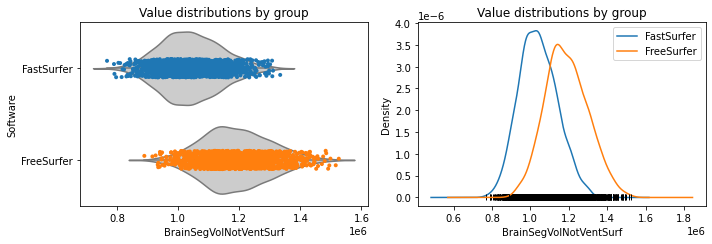

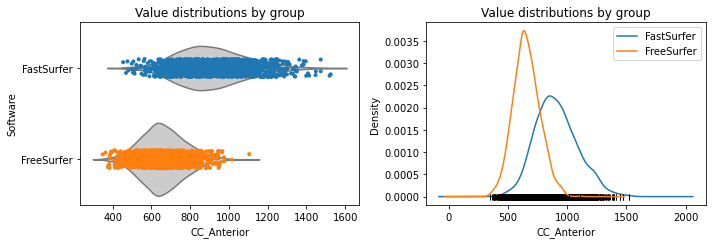

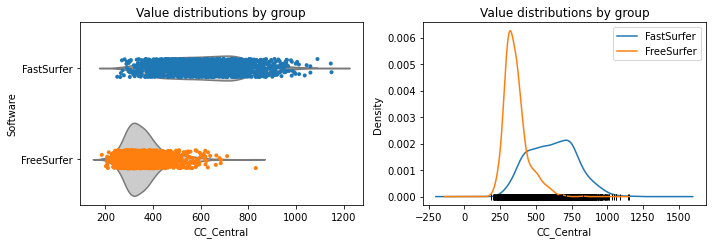

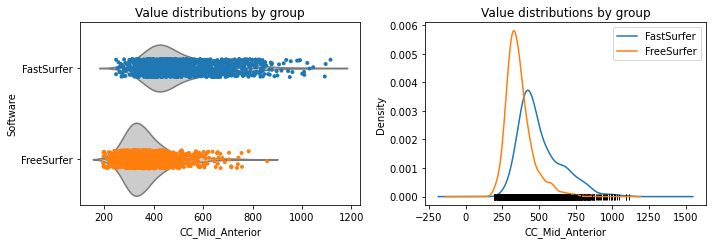

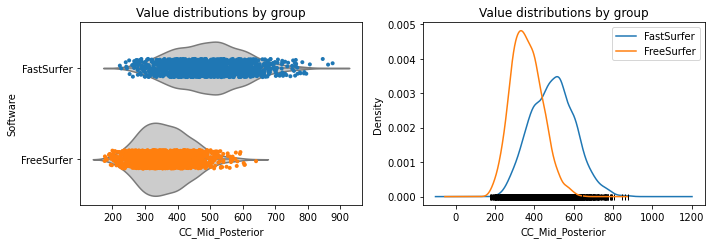

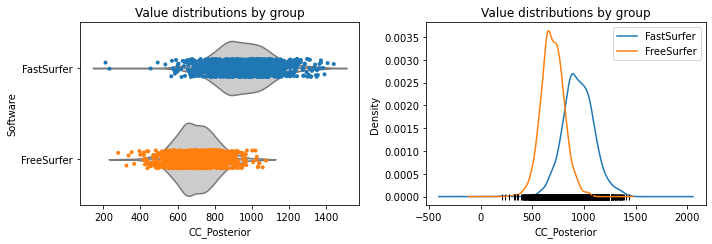

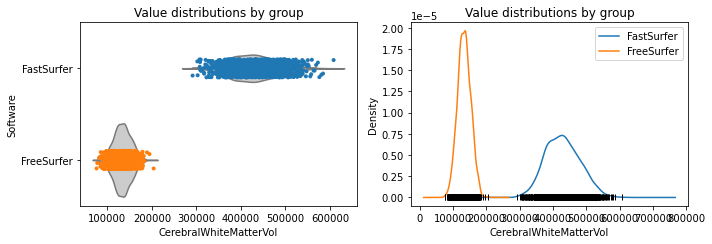

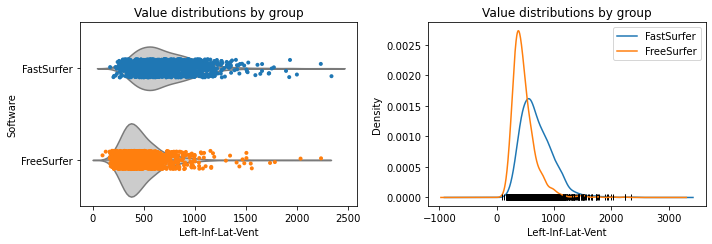

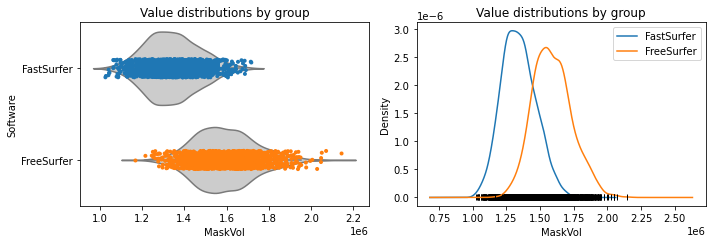

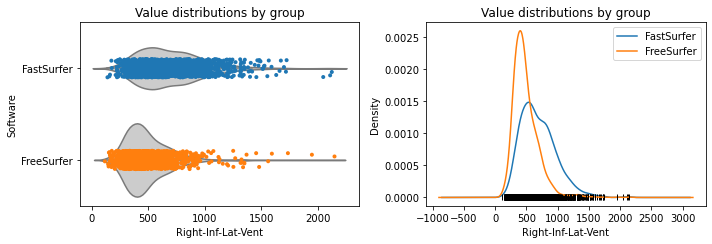

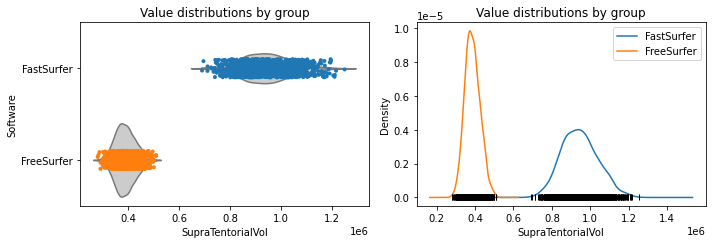

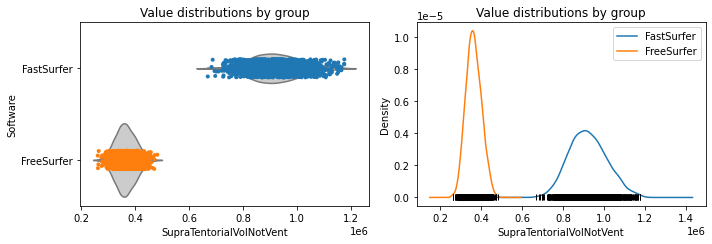

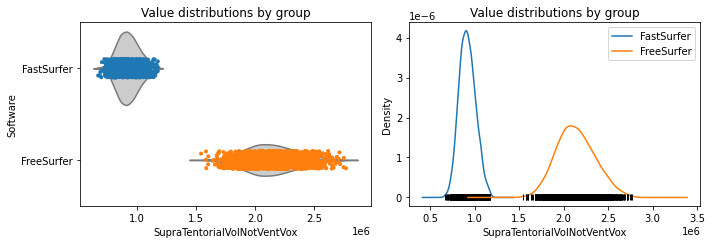

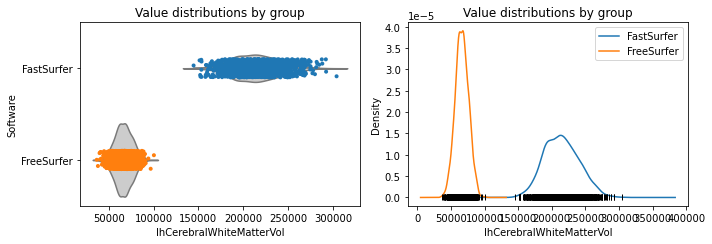

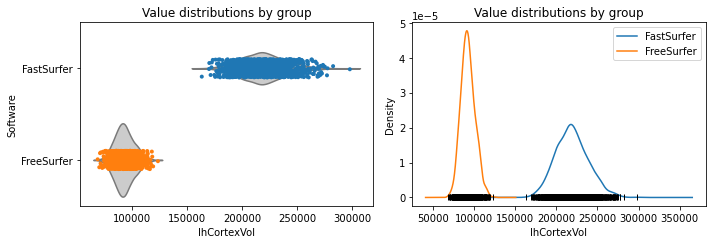

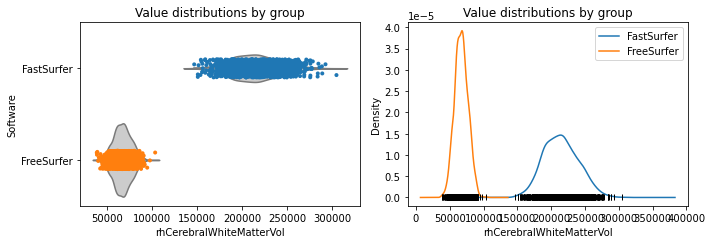

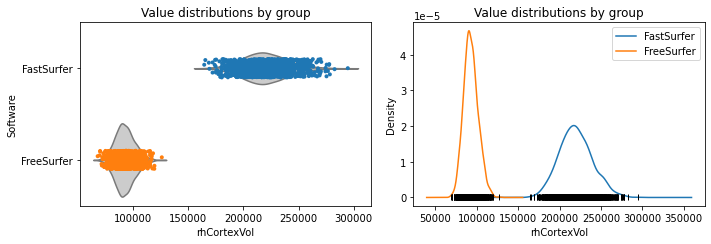

In [15]:
graficos('BrainSegVolNotVentSurf')
graficos('CC_Anterior')
graficos('CC_Central')
graficos('CC_Mid_Anterior')
graficos('CC_Mid_Posterior')
graficos('CC_Posterior')
graficos('CerebralWhiteMatterVol')
graficos('Left-Inf-Lat-Vent')
graficos('MaskVol')
graficos('Right-Inf-Lat-Vent')
graficos('SupraTentorialVol')
graficos('SupraTentorialVolNotVent')
graficos('SupraTentorialVolNotVentVox')
graficos('lhCerebralWhiteMatterVol')
graficos('lhCortexVol')
graficos('rhCerebralWhiteMatterVol')
graficos('rhCortexVol')

<div class="alert alert-block alert-info">
Furthermore, FastSurfer hasn't segmentated the following regions:
    
    -5th-Ventricle
    -Left-WM-hypointensities
    -Left-non-WM-hypointensities
    -Left-vessel
    -Optic-Chiasm
    -Right-WM-hypointensities (FreeSurfer didn't segmentate either)
    -Right-non-WM-hypointensities (FreeSurfer didn't segmentate either)
    -Right-vessel
    -non-WM-hypointensities
    
</div>

In [16]:
non_seg = ['5th-Ventricle','Left-WM-hypointensities', 'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm','Right-WM-hypointensities','Right-non-WM-hypointensities','Right-vessel','non-WM-hypointensities']

## Kolmogorov-Smirnov Test

We will check if both samples have the same distribution

In [17]:
from scipy.stats import ks_2samp
import numpy as np

ks_regions_not = []
ks_regions = []

for i in statsFastSurfer.columns:

    x = statsFastSurfer[i]
    y = statsFreeSurfer[i]
    if ks_2samp(x, y)[1] < 0.05:
        
        result = "They don't follow the same distribution"
        ks_regions_not.append(i)
    else:
        if i in non_seg:
            continue
        else:
            result = 'They follow the same distribution'
            ks_regions.append(i)
        

    print('In the',i,'the KS-Test result is: ', ks_2samp(x, y),'so ', result,'\n')

In the 3rd-Ventricle the KS-Test result is:  KstestResult(statistic=0.08774373259052924, pvalue=3.126754907831407e-05) so  They don't follow the same distribution 

In the 4th-Ventricle the KS-Test result is:  KstestResult(statistic=0.17479108635097493, pvalue=1.4319506581857472e-19) so  They don't follow the same distribution 

In the Brain-Stem the KS-Test result is:  KstestResult(statistic=0.133008356545961, pvalue=1.7340648123734013e-11) so  They don't follow the same distribution 

In the BrainSegVol the KS-Test result is:  KstestResult(statistic=0.05013927576601671, pvalue=0.05408729700237239) so  They follow the same distribution 

In the BrainSegVolNotVent the KS-Test result is:  KstestResult(statistic=0.04387186629526462, pvalue=0.12606562918079195) so  They follow the same distribution 

In the BrainSegVolNotVentSurf the KS-Test result is:  KstestResult(statistic=0.5174094707520891, pvalue=1.0606836976380654e-175) so  They don't follow the same distribution 

In the CC_Anteri

In [18]:
print(ks_regions_not)
len(ks_regions_not)

['3rd-Ventricle', '4th-Ventricle', 'Brain-Stem', 'BrainSegVolNotVentSurf', 'CC_Anterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior', 'CC_Posterior', 'CSF', 'CerebralWhiteMatterVol', 'Left-Accumbens-area', 'Left-Amygdala', 'Left-Caudate', 'Left-Cerebellum-Cortex', 'Left-Cerebellum-White-Matter', 'Left-Hippocampus', 'Left-Inf-Lat-Vent', 'Left-Pallidum', 'Left-Putamen', 'Left-VentralDC', 'Left-choroid-plexus', 'Left-vessel', 'MaskVol', 'Optic-Chiasm', 'Right-Accumbens-area', 'Right-Amygdala', 'Right-Caudate', 'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter', 'Right-Hippocampus', 'Right-Inf-Lat-Vent', 'Right-Pallidum', 'Right-Putamen', 'Right-Thalamus-Proper', 'Right-VentralDC', 'Right-choroid-plexus', 'Right-vessel', 'SubCortGrayVol', 'SupraTentorialVol', 'SupraTentorialVolNotVent', 'SupraTentorialVolNotVentVox', 'TotalGrayVol', 'WM-hypointensities', 'lhCerebralWhiteMatterVol', 'lhCortexVol', 'non-WM-hypointensities', 'rhCerebralWhiteMatterVol', 'rhCortexVol']


49

In [19]:
print(ks_regions)
len(ks_regions)

['BrainSegVol', 'BrainSegVolNotVent', 'Left-Lateral-Ventricle', 'Left-Thalamus-Proper', 'Right-Lateral-Ventricle']


5

<div class="alert alert-block alert-info">

We can observe that the only regions that follow the same distribution in both samples are:
    
    -BrainSegVol
    -BrainSegVolNotVent
    -Left-Lateral-Ventricle
    -Left-Thalamus-Proper
    -Right-Lateral-Ventricle
Therefore, we can conclude that the distribution of the values from each sample (FastSurfer and FreeSurfer) differ in almost every region
    
</div>

## Normality test

With this test, we will check if the values of each region follow a normal distribution, in order to treat the distributions as parametric or non-parametric

#### FastSurfer

In [20]:
from scipy.stats import normaltest

not_norm = []
norm = []
for i in statsFastSurfer.columns:
    result = normaltest(statsFastSurfer[i])
    if result[1] < 0.05:
        dist = 'Values are not distributed normally'
        not_norm.append(i)
    else:
        dist = 'Values are distributed normally'
        norm.append(i)
    print(i,':', result, dist, '\n')

3rd-Ventricle : NormaltestResult(statistic=348.95974706247887, pvalue=1.6763076316295035e-76) Values are not distributed normally 

4th-Ventricle : NormaltestResult(statistic=245.7121968406365, pvalue=4.40833294665183e-54) Values are not distributed normally 

5th-Ventricle : NormaltestResult(statistic=3785.787906963159, pvalue=0.0) Values are not distributed normally 

Brain-Stem : NormaltestResult(statistic=15.362687303268373, pvalue=0.0004613545822919091) Values are not distributed normally 

BrainSegVol : NormaltestResult(statistic=17.475908399610507, pvalue=0.0001603816613497634) Values are not distributed normally 

BrainSegVolNotVent : NormaltestResult(statistic=15.805969526694216, pvalue=0.00036963860852881505) Values are not distributed normally 

BrainSegVolNotVentSurf : NormaltestResult(statistic=15.718271399900411, pvalue=0.00038620752634652714) Values are not distributed normally 

CC_Anterior : NormaltestResult(statistic=33.19131944556293, pvalue=6.202925410489503e-08) Va

In [21]:
print(norm)

['Left-Amygdala', 'Left-Hippocampus', 'Right-Amygdala', 'Right-Hippocampus']


In [22]:
print(not_norm)

['3rd-Ventricle', '4th-Ventricle', '5th-Ventricle', 'Brain-Stem', 'BrainSegVol', 'BrainSegVolNotVent', 'BrainSegVolNotVentSurf', 'CC_Anterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior', 'CC_Posterior', 'CSF', 'CerebralWhiteMatterVol', 'Left-Accumbens-area', 'Left-Caudate', 'Left-Cerebellum-Cortex', 'Left-Cerebellum-White-Matter', 'Left-Inf-Lat-Vent', 'Left-Lateral-Ventricle', 'Left-Pallidum', 'Left-Putamen', 'Left-Thalamus-Proper', 'Left-VentralDC', 'Left-WM-hypointensities', 'Left-choroid-plexus', 'Left-non-WM-hypointensities', 'Left-vessel', 'MaskVol', 'Optic-Chiasm', 'Right-Accumbens-area', 'Right-Caudate', 'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter', 'Right-Inf-Lat-Vent', 'Right-Lateral-Ventricle', 'Right-Pallidum', 'Right-Putamen', 'Right-Thalamus-Proper', 'Right-VentralDC', 'Right-WM-hypointensities', 'Right-choroid-plexus', 'Right-non-WM-hypointensities', 'Right-vessel', 'SubCortGrayVol', 'SupraTentorialVol', 'SupraTentorialVolNotVent', 'SupraTentorialV

<div class="alert alert-block alert-info">

We can see the only regions that follow a normal distribution in FastSurfer dataset are:
    
    -Left-Amygdala
    -Left-Hippocampus
    -Right-Amygdala
    -Right-Hippocampus
Therefore, we can conclude we will need to analyse them as non-normal distributions
    
</div>

#### FreeSurfer

In [23]:

not_norm = []
norm = []
for i in statsFreeSurfer.columns:
    result = normaltest(statsFreeSurfer[i])
    if result[1] < 0.05:
        dist = 'Values are not distributed normally'
        not_norm.append(i)
    else:
        dist = 'Values are distributed normally'
        norm.append(i)
    print(i,':', result, dist, '\n')

3rd-Ventricle : NormaltestResult(statistic=403.34366127215594, pvalue=2.600379893914655e-88) Values are not distributed normally 

4th-Ventricle : NormaltestResult(statistic=458.4467021437124, pvalue=2.815551698223391e-100) Values are not distributed normally 

5th-Ventricle : NormaltestResult(statistic=3005.84866081362, pvalue=0.0) Values are not distributed normally 

Brain-Stem : NormaltestResult(statistic=24.575408158045615, pvalue=4.608057856327826e-06) Values are not distributed normally 

BrainSegVol : NormaltestResult(statistic=17.575347940641986, pvalue=0.00015260251315849454) Values are not distributed normally 

BrainSegVolNotVent : NormaltestResult(statistic=15.925228198558433, pvalue=0.000348241588479842) Values are not distributed normally 

BrainSegVolNotVentSurf : NormaltestResult(statistic=15.486100593368237, pvalue=0.0004337464996599029) Values are not distributed normally 

CC_Anterior : NormaltestResult(statistic=13.03111966314526, pvalue=0.0014802269896626358) Valu

In [24]:
print(norm)

['CerebralWhiteMatterVol', 'Left-Hippocampus', 'Left-Pallidum', 'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol']


In [25]:
print(not_norm)

['3rd-Ventricle', '4th-Ventricle', '5th-Ventricle', 'Brain-Stem', 'BrainSegVol', 'BrainSegVolNotVent', 'BrainSegVolNotVentSurf', 'CC_Anterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior', 'CC_Posterior', 'CSF', 'Left-Accumbens-area', 'Left-Amygdala', 'Left-Caudate', 'Left-Cerebellum-Cortex', 'Left-Cerebellum-White-Matter', 'Left-Inf-Lat-Vent', 'Left-Lateral-Ventricle', 'Left-Putamen', 'Left-Thalamus-Proper', 'Left-VentralDC', 'Left-WM-hypointensities', 'Left-choroid-plexus', 'Left-non-WM-hypointensities', 'Left-vessel', 'MaskVol', 'Optic-Chiasm', 'Right-Accumbens-area', 'Right-Amygdala', 'Right-Caudate', 'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter', 'Right-Hippocampus', 'Right-Inf-Lat-Vent', 'Right-Lateral-Ventricle', 'Right-Pallidum', 'Right-Putamen', 'Right-Thalamus-Proper', 'Right-VentralDC', 'Right-WM-hypointensities', 'Right-choroid-plexus', 'Right-non-WM-hypointensities', 'Right-vessel', 'SubCortGrayVol', 'SupraTentorialVol', 'SupraTentorialVolNotVent', 'Su

<div class="alert alert-block alert-info">

We can see the only regions that follow a normal distribution in FreeSurfer dataset are:
    
    -CerebralWhiteMatterVol
    -Left-Hippocampus
    -Left-Pallidum
    -lhCerebralWhiteMatterVol
    -rhCerebralWhiteMatterVol
Therefore, we can conclude we will need to analyse them as non-normal distributions
    
</div>

## Anderson-Darling test

We will check if the distributions come from normal distributions. This is a more powerful test than the normality test.

$H_0$: Our sample follow a normal distribution

$H_1$: Our sample don't follow a normal distribution

#### FastSurfer

In [42]:
from scipy.stats import anderson
norm = []
not_norm = []
for i in statsFastSurfer.columns:
    result = anderson(statsFastSurfer[i])
    if result[0] < result[1][3]: #alpha = 0.05
        dist = "we can't reject the null hypothesis"
        norm.append(i)
    else:
        dist = "we can accept the alternative hypothesis"
        not_norm.append(i)
    print(i,':', result, dist, '\n')

3rd-Ventricle : AndersonResult(statistic=27.326108253384064, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

4th-Ventricle : AndersonResult(statistic=14.464936283201041, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

5th-Ventricle : AndersonResult(statistic=nan, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

Brain-Stem : AndersonResult(statistic=2.005336231142792, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

BrainSegVol : AndersonResult(statistic=2.0193043448489334, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance

In [43]:
norm

['Left-Amygdala',
 'Left-Hippocampus',
 'Left-Pallidum',
 'Right-Accumbens-area',
 'Right-Amygdala',
 'Right-Cerebellum-White-Matter',
 'Right-Hippocampus']

<div class="alert alert-block alert-info">
We can see that we can accept the alternative hypothesis of the data not coming from a normal distribution for practically every region, as the statistic is bigger than all the critical values

#### FreeSurfer

In [44]:
norm = []
not_norm = []
for i in statsFreeSurfer.columns:
    result = anderson(statsFastSurfer[i])
    if result[0] < result[1][3]:
        dist = "we can't reject the null hypothesis"
        norm.append(i)
    else:
        dist = "we can accept the alternative hypothesis"
        not_norm.append(i)
    print(i,':', result, dist, '\n')

3rd-Ventricle : AndersonResult(statistic=27.326108253384064, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

4th-Ventricle : AndersonResult(statistic=14.464936283201041, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

5th-Ventricle : AndersonResult(statistic=nan, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

Brain-Stem : AndersonResult(statistic=2.005336231142792, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) we can accept the alternative hypothesis 

BrainSegVol : AndersonResult(statistic=2.0193043448489334, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance

In [45]:
norm

['Left-Amygdala',
 'Left-Hippocampus',
 'Left-Pallidum',
 'Right-Accumbens-area',
 'Right-Amygdala',
 'Right-Cerebellum-White-Matter',
 'Right-Hippocampus']

<div class="alert alert-block alert-info">
We can see that we can accept the alternative hypothesis of the data not coming from a normal distribution for practically every region, as the statistic is bigger than all the critical values

## Wilcoxon Test

$H_0$: $P(X>Y) = 0.5$ (Both data come from poblations equallly distributed)

$H_1$: $P(X>Y) \neq 0.5$ (Both data doesn't come from poblations equallly distributed)

In [46]:
from scipy.stats import wilcoxon
import numpy as np

wilcox_not = []
wilcox = []

for i in statsFastSurfer.columns:

    x = statsFastSurfer[i]
    y = statsFreeSurfer[i]
    if i in non_seg:
        continue
    else:
        if wilcoxon(x, y)[1] < 0.05:

            result = "we can accept the alternative hypothesis"
            wilcox_not.append(i)
        else:
            
            result = "we can't reject the null hypothesis"
            wilcox.append(i)
        

    print('In the',i,'the Wilcoxon result is: ', wilcoxon(x, y),'so ', result,'\n')

In the 3rd-Ventricle the Wilcoxon result is:  WilcoxonResult(statistic=83050.5, pvalue=5.9527319322236245e-167) so  we can accept the alternative hypothesis 

In the 4th-Ventricle the Wilcoxon result is:  WilcoxonResult(statistic=23780.5, pvalue=3.3747331251591317e-215) so  we can accept the alternative hypothesis 

In the Brain-Stem the Wilcoxon result is:  WilcoxonResult(statistic=103293.5, pvalue=6.912254297535173e-152) so  we can accept the alternative hypothesis 

In the BrainSegVol the Wilcoxon result is:  WilcoxonResult(statistic=142245.0, pvalue=6.36136710116261e-125) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVent the Wilcoxon result is:  WilcoxonResult(statistic=204006.0, pvalue=1.2572680493908466e-87) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVentSurf the Wilcoxon result is:  WilcoxonResult(statistic=1.0, pvalue=2.737044855403218e-236) so  we can accept the alternative hypothesis 

In the CC_Anterior the Wilcoxon result is: 

In [47]:
wilcox

[]

## t-test for paired samples

$H_0$: $\mu_0 = \mu_1$ (Mean values are equal)

$H_1$: $\mu_0 \neq \mu_1$ (Mean values are not equal)

In [48]:
from scipy.stats import ttest_rel
import numpy as np

t_not = []
t = []

for i in statsFastSurfer.columns:

    x = statsFastSurfer[i]
    y = statsFreeSurfer[i]
    if i in non_seg:
        continue
    else:
        if ttest_rel(x, y)[1] < 0.05:

            result = "we can accept the alternative hypothesis"
            t_not.append(i)
        else:
            
            result = "we can't reject the null hypothesis"
            t.append(i)
        

    print('In the',i,'the t-test result is: ', ttest_rel(x, y),'so ', result,'\n')

In the 3rd-Ventricle the t-test result is:  Ttest_relResult(statistic=32.59571629472142, pvalue=6.951398408696431e-175) so  we can accept the alternative hypothesis 

In the 4th-Ventricle the t-test result is:  Ttest_relResult(statistic=51.28178236238379, pvalue=0.0) so  we can accept the alternative hypothesis 

In the Brain-Stem the t-test result is:  Ttest_relResult(statistic=33.95773351521834, pvalue=5.279831700753027e-186) so  we can accept the alternative hypothesis 

In the BrainSegVol the t-test result is:  Ttest_relResult(statistic=24.245544940237217, pvalue=4.0169737371864224e-109) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVent the t-test result is:  Ttest_relResult(statistic=19.781644877657886, pvalue=3.2946325413066823e-77) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVentSurf the t-test result is:  Ttest_relResult(statistic=-197.70197003038908, pvalue=0.0) so  we can accept the alternative hypothesis 

In the CC_Anterior the

In [49]:
t

[]

##### Considerar quitar los outliers y probar el t-test y el wilcoxon test

## Outliers imputation

#### FastSurfer

<div class="alert alert-block alert-info">
    
We have created a function to calculate the number of outliers. The method we have used to calculate them is the z-score. We've found an interval 2 standard deviations away from the mean to check the observations that are inside this interval
 

In [50]:
#creamos una función con el nombre del atributo como entrada que nos devuelve el número de outliers del atributo que queramos
def outliers(atributo): 
    z_score = [statsFastSurfer[atributo].mean() -2*statsFastSurfer[str(atributo)].std(), statsFastSurfer[str(atributo)].mean() +2*statsFastSurfer[str(atributo)].std()]
    print("Intervalo z_score:",z_score)
    list_outliers = []
    count = 0

    for i in range(0,len(statsFastSurfer[atributo])): #si el valor del atributo esta fuera de nuestro z-score, lo consideramos outlier
        if statsFastSurfer[atributo].iloc[i]<z_score[0] or statsFastSurfer[atributo].iloc[i]> z_score[1]:
            count = count + 1
            list_outliers.append(statsFastSurfer[atributo].iloc[i])
        else: 
            continue

    print("Número de outliers:",count)         
    print("Valores de los outliers:",list_outliers)

In [51]:
for i in statsFastSurfer.columns:
    print(i)
    outliers(i)
    print('\n')

3rd-Ventricle
Intervalo z_score: [385.95755903328177, 2272.2608253678327]
Número de outliers: 69
Valores de los outliers: [2335.3, 2316.6, 2292.2, 2288.3, 2376.8, 2526.8, 2347.9, 2812.9, 2375.3, 2646.0, 2367.7, 2934.4, 2508.5, 2376.6, 2678.0, 2301.6, 2460.3, 2572.8, 2536.6, 2439.4, 2785.2, 2288.9, 2404.9, 2799.6, 2454.7, 2466.7, 2453.4, 2337.5, 2689.5, 2335.4, 2278.7, 2434.4, 3544.3, 2737.4, 2307.1, 2513.7, 2464.9, 2983.8, 2319.2, 2464.2, 3511.8, 2655.2, 2486.7, 3046.0, 3125.0, 2316.0, 2344.7, 2386.8, 2304.0, 2895.0, 2479.6, 2941.5, 2749.7, 3151.6, 2940.8, 2493.6, 2786.6, 3069.6, 3236.4, 2334.5, 3091.7, 2406.7, 2330.0, 2425.8, 3333.6, 2705.7, 2342.4, 2537.1, 4341.0]


4th-Ventricle
Intervalo z_score: [972.6158824626152, 2837.341220601452]
Número de outliers: 59
Valores de los outliers: [3003.2, 3130.0, 2872.9, 3023.3, 3154.8, 3115.5, 3001.4, 2989.7, 3286.4, 3049.1, 3791.4, 3125.0, 3158.7, 2885.0, 2976.5, 3768.1, 2888.7, 3336.5, 3182.0, 3012.0, 5157.9, 2928.7, 3312.2, 3097.0, 2896.3, 28

Número de outliers: 67
Valores de los outliers: [813.1, 765.8, 759.9, 740.8, 770.7, 757.3, 713.4, 763.3, 764.0, 718.3, 717.7, 757.9, 269.3, 808.8, 311.5, 750.5, 302.4, 837.9, 304.1, 746.4, 718.4, 745.1, 249.3, 719.6, 801.9, 735.0, 724.0, 713.7, 753.1, 734.7, 788.2, 748.5, 757.9, 793.2, 136.9, 803.1, 741.9, 771.1, 931.2, 724.8, 247.6, 732.5, 132.9, 298.8, 313.5, 311.0, 287.2, 756.1, 724.7, 719.9, 306.5, 767.5, 719.2, 768.8, 718.1, 212.0, 309.9, 743.0, 774.1, 306.8, 714.5, 202.6, 843.0, 307.3, 768.6, 298.8, 309.4]


Left-Amygdala
Intervalo z_score: [938.4225503704879, 1774.043466342604]
Número de outliers: 68
Valores de los outliers: [918.7, 1827.1, 1918.7, 871.9, 843.2, 1801.8, 881.7, 1784.7, 1795.1, 754.6, 1838.9, 1900.9, 1834.4, 933.6, 863.1, 1809.5, 814.3, 1780.1, 934.3, 1926.1, 1877.8, 1781.1, 1883.1, 815.3, 695.9, 2016.9, 612.4, 916.8, 1889.2, 1870.0, 1775.1, 1963.6, 906.7, 1820.1, 1814.2, 1877.8, 2013.7, 801.2, 1780.2, 803.8, 926.4, 805.5, 1803.6, 1793.1, 769.9, 1917.3, 1797.2, 17

Número de outliers: 0
Valores de los outliers: []


MaskVol
Intervalo z_score: [1091861.031087786, 1591973.3031740524]
Número de outliers: 68
Valores de los outliers: [1621183, 1670768, 1620429, 1040687, 1640342, 1086820, 1645167, 1083629, 1594895, 1654159, 1086473, 1594629, 1691451, 1621486, 1688166, 1642474, 1622927, 1045706, 1090408, 1717304, 1611895, 1628121, 1685682, 1606293, 1611567, 1675481, 1608141, 1087070, 1607250, 1600696, 1082192, 1091373, 1686932, 1087796, 1714770, 1065511, 1628502, 1630079, 1613690, 1644209, 1625468, 1677668, 1601803, 1043434, 1079270, 1041776, 1665914, 1026418, 1072310, 1085503, 1601119, 1063546, 1618472, 1621275, 1653305, 1066686, 1064098, 1594946, 1597207, 1625466, 1078092, 1028725, 1592424, 1079266, 1598478, 1598701, 1607879, 1607256]


Optic-Chiasm
Intervalo z_score: [0.0, 0.0]
Número de outliers: 0
Valores de los outliers: []


Right-Accumbens-area
Intervalo z_score: [291.4836605830486, 640.1408519517704]
Número de outliers: 59
Valores de los outlie

Número de outliers: 0
Valores de los outliers: []


Right-choroid-plexus
Intervalo z_score: [390.1471662564478, 865.7972627129114]
Número de outliers: 57
Valores de los outliers: [869.3, 378.2, 375.7, 874.8, 914.7, 380.3, 898.1, 899.2, 918.9, 898.2, 886.7, 979.7, 1036.2, 926.8, 909.2, 871.9, 871.4, 363.2, 948.6, 870.3, 911.5, 1012.9, 931.7, 899.5, 890.0, 895.1, 928.1, 977.2, 902.0, 870.4, 895.9, 361.2, 340.8, 311.0, 357.3, 933.1, 315.6, 921.9, 357.5, 915.0, 329.9, 868.9, 912.5, 900.7, 388.2, 1031.3, 997.1, 1060.4, 898.2, 917.2, 915.4, 355.1, 1050.4, 875.7, 378.2, 1018.3, 904.3]


Right-non-WM-hypointensities
Intervalo z_score: [0.0, 0.0]
Número de outliers: 0
Valores de los outliers: []


Right-vessel
Intervalo z_score: [0.0, 0.0]
Número de outliers: 0
Valores de los outliers: []


SubCortGrayVol
Intervalo z_score: [42184.82596181462, 61783.48323038594]
Número de outliers: 66
Valores de los outliers: [61911, 65241, 63124, 64788, 40941, 41849, 62579, 63876, 62274, 62101, 67470, 41931, 4

<div class="alert alert-block alert-info">
Once we have located the outliers, we proceed to replace them for the median values of each variable

In [52]:
for i in range(0, len(statsFastSurfer.columns)):
    z_score = [statsFastSurfer[statsFastSurfer.columns[i]].mean() -2*statsFastSurfer[statsFastSurfer.columns[i]].std(), statsFastSurfer[statsFastSurfer.columns[i]].mean() +2*statsFastSurfer[statsFastSurfer.columns[i]].std()]
    for j in range(0,len(statsFastSurfer[statsFastSurfer.columns[i]])):
        if statsFastSurfer[statsFastSurfer.columns[i]].iloc[j]<z_score[0] or statsFastSurfer[statsFastSurfer.columns[i]].iloc[j]> z_score[1]:
            statsFastSurfer[statsFastSurfer.columns[i]].replace(statsFastSurfer[statsFastSurfer.columns[i]].iloc[j],statsFastSurfer[statsFastSurfer.columns[i]].median(),inplace=True)
        else: 
             continue

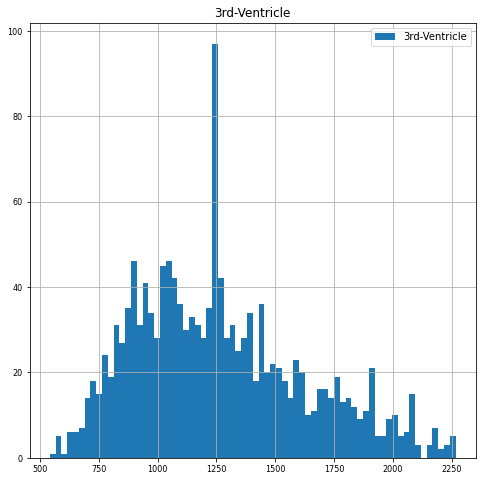

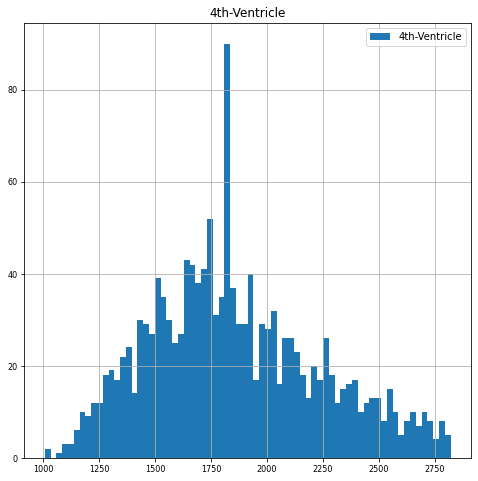

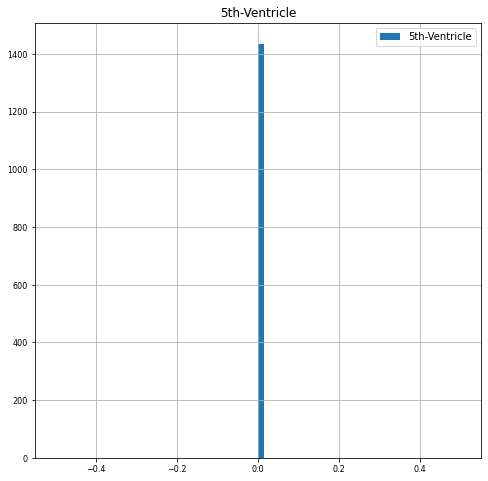

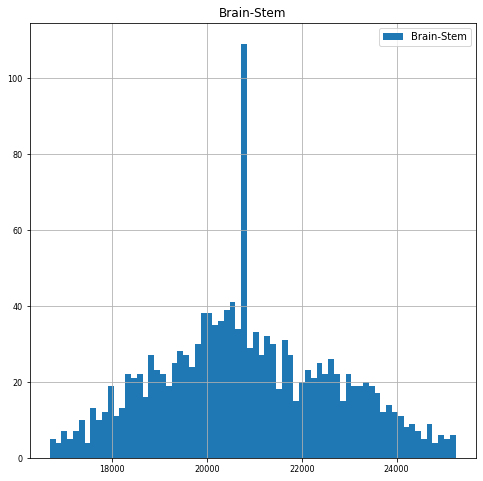

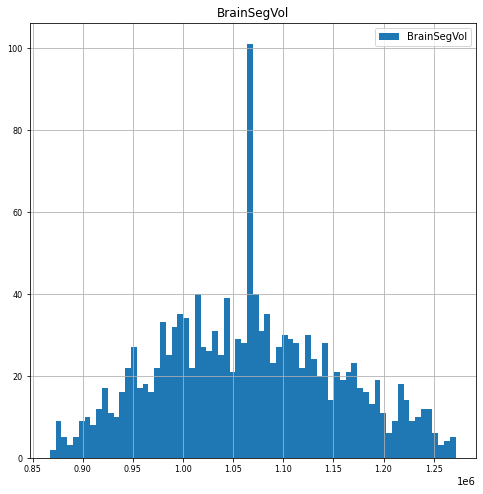

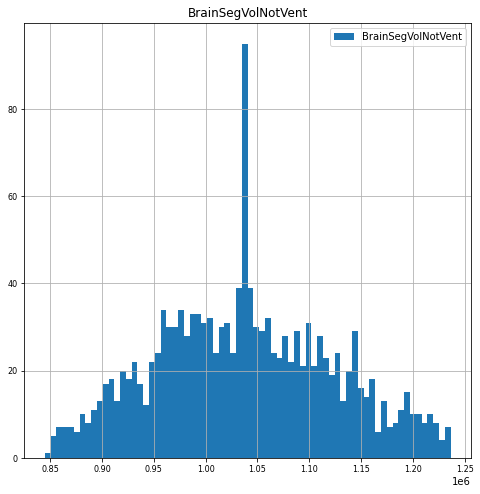

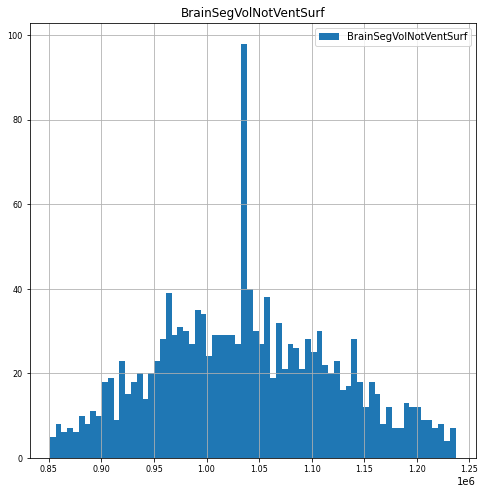

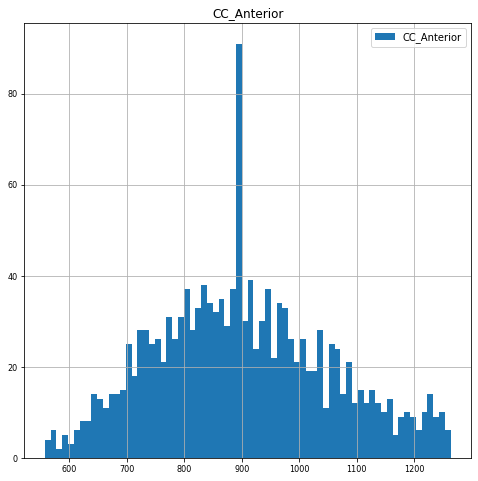

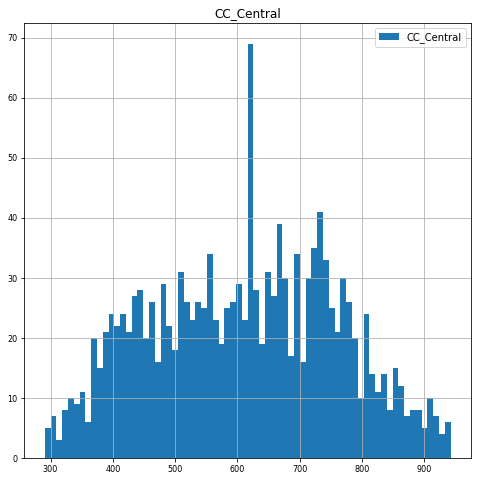

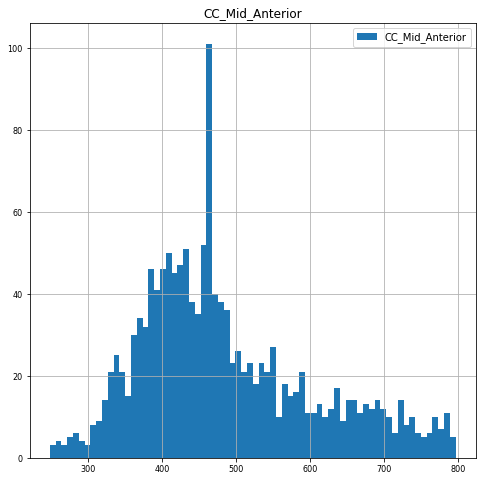

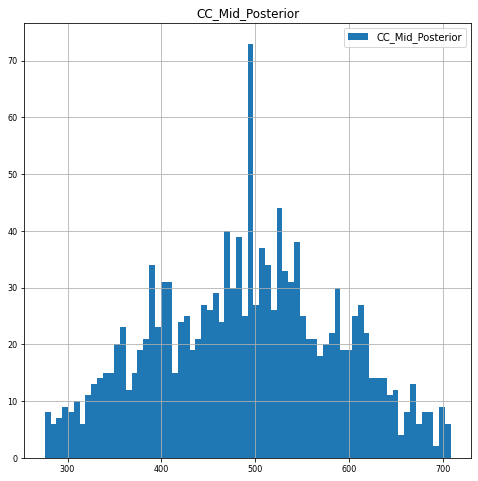

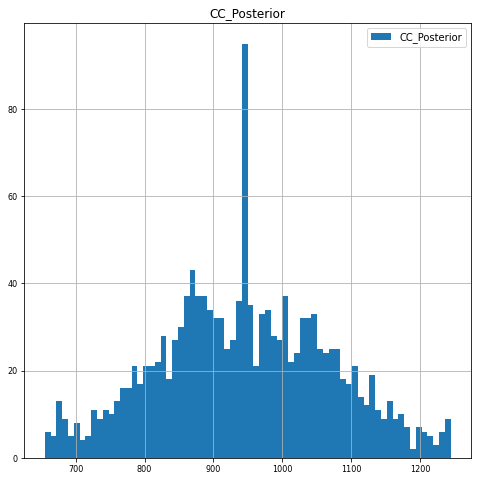

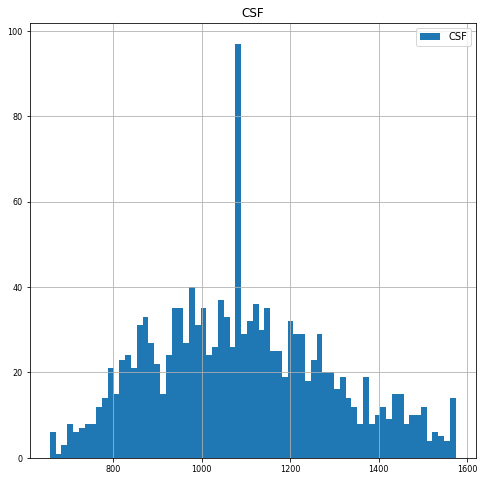

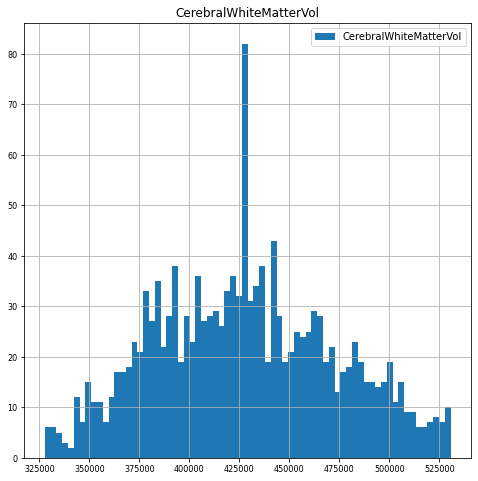

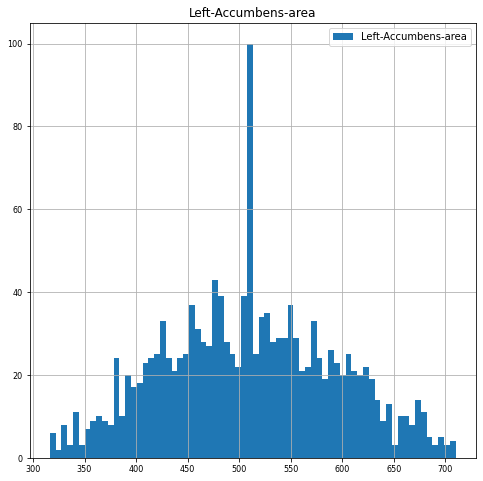

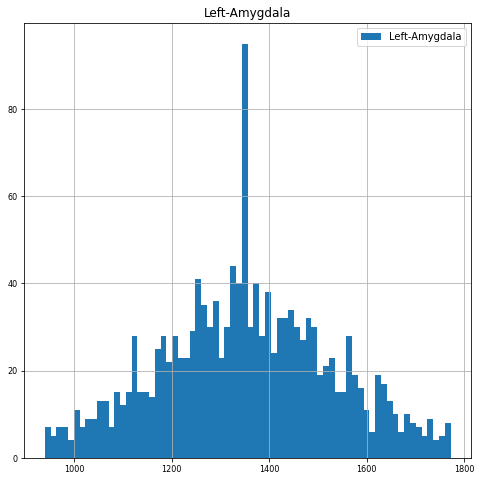

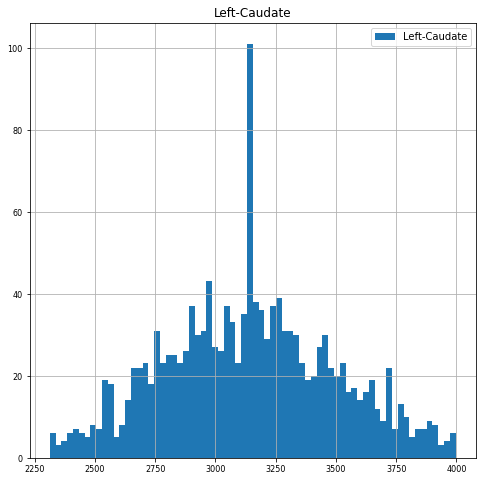

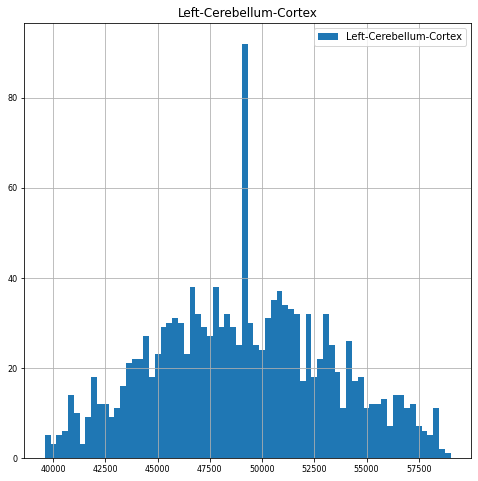

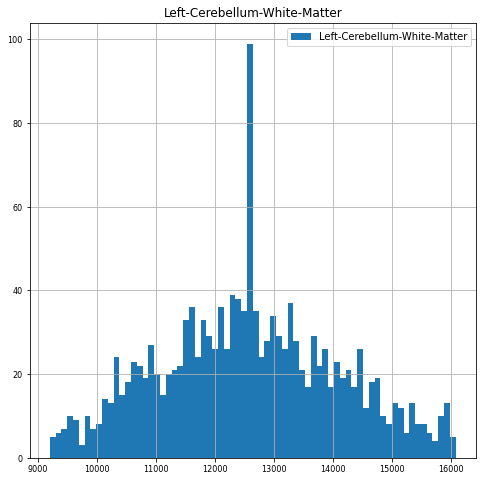

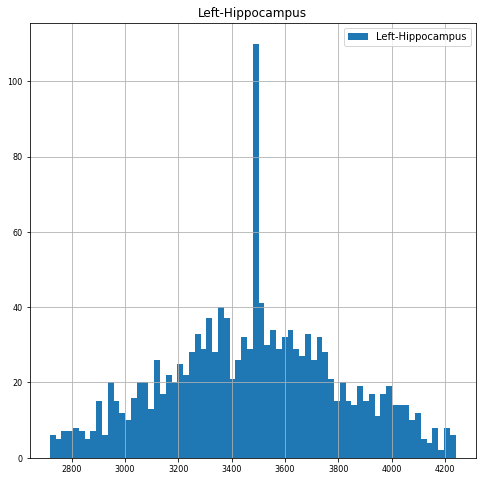

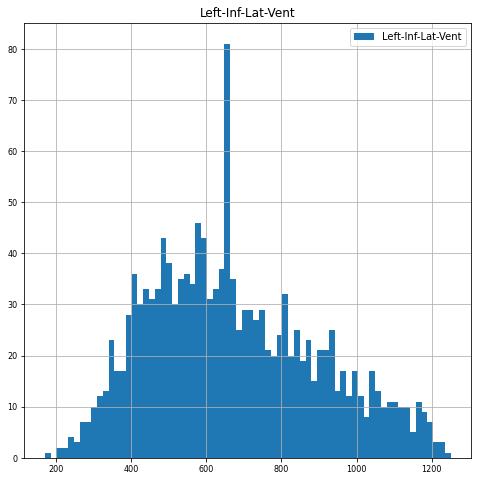

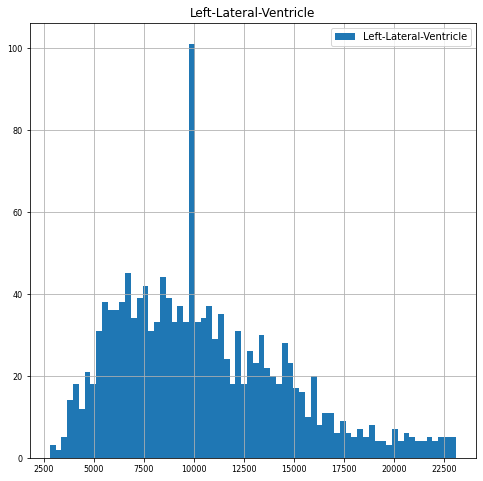

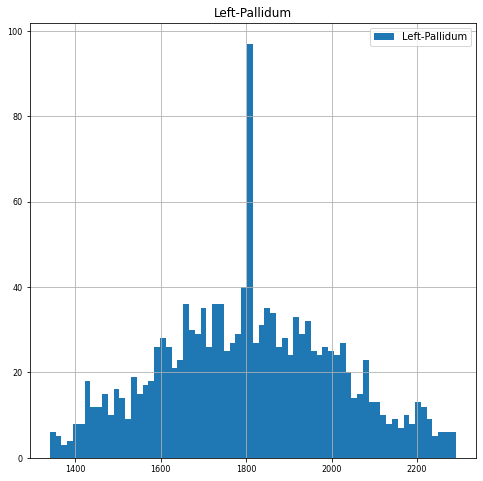

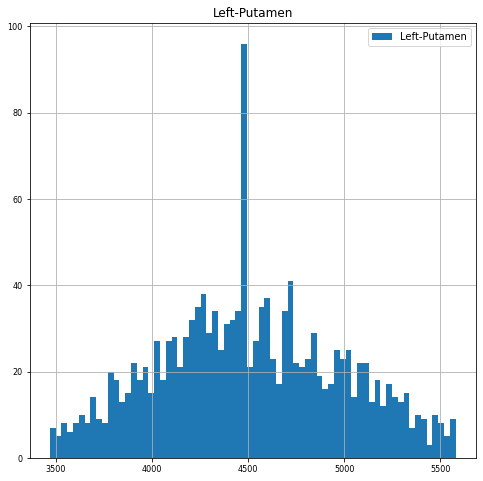

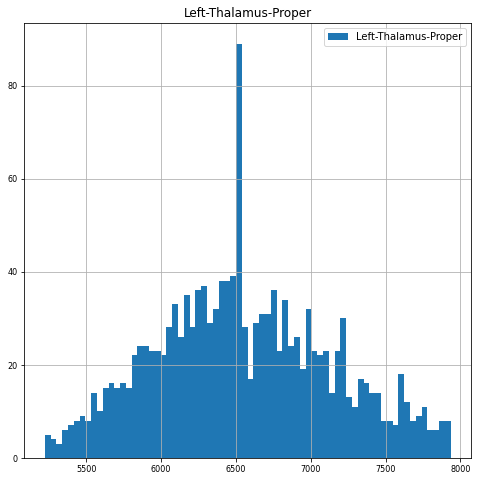

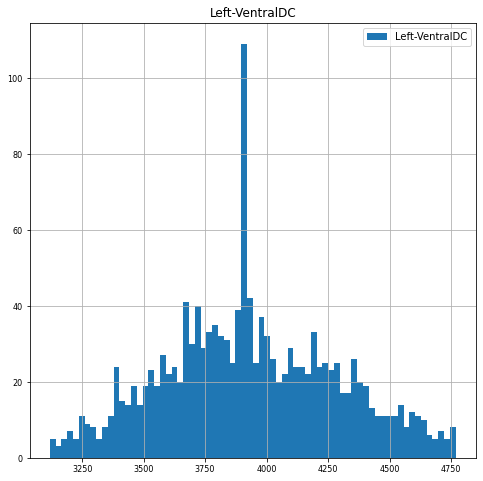

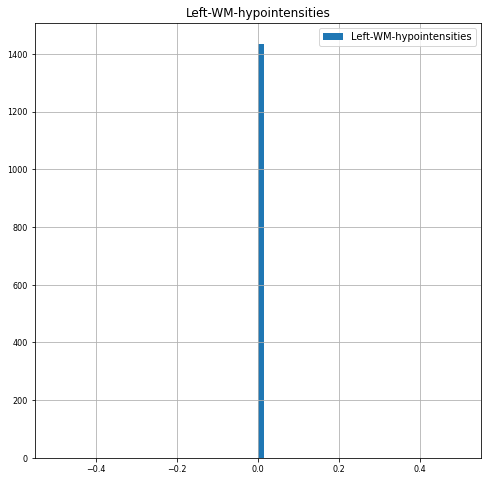

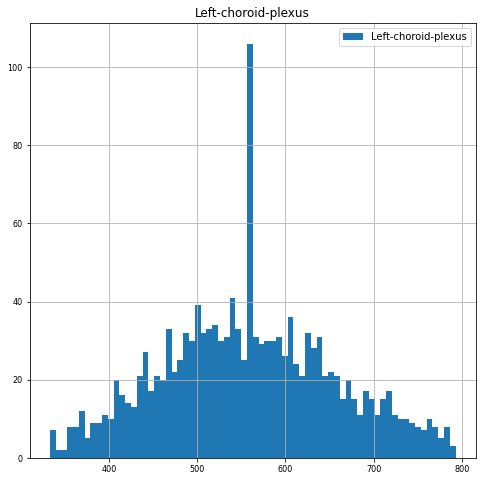

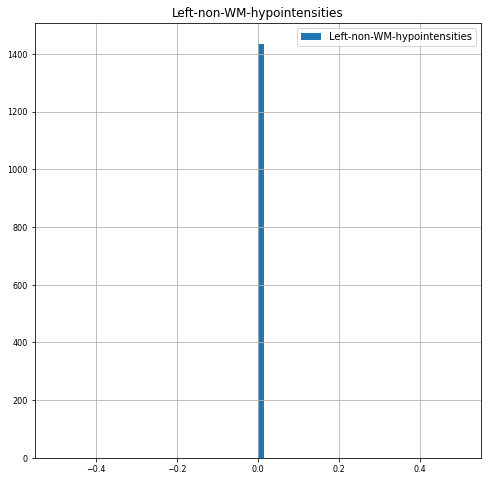

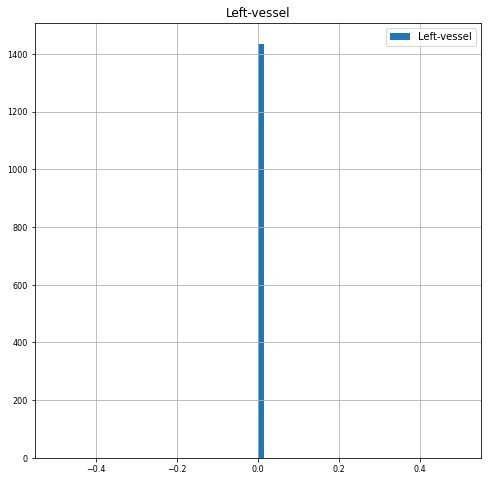

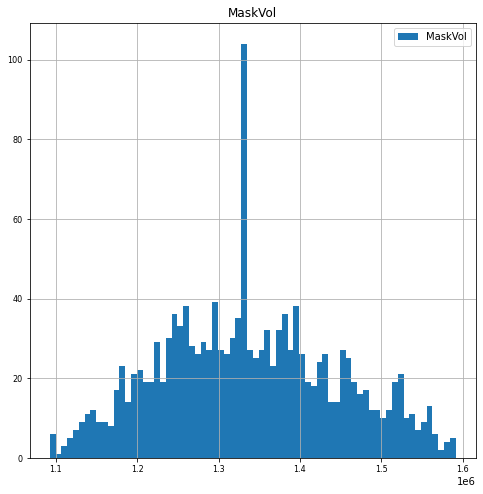

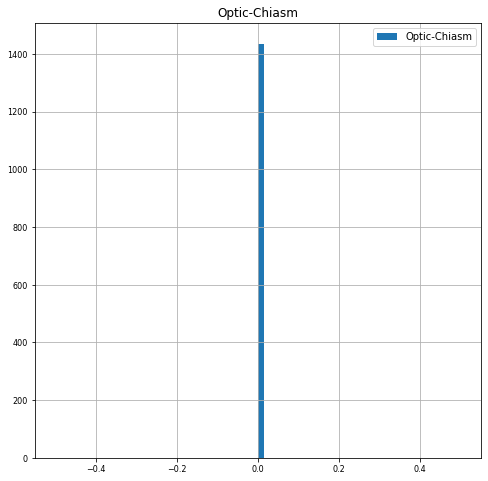

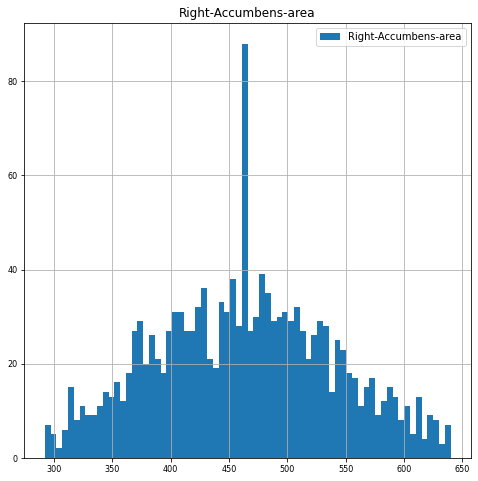

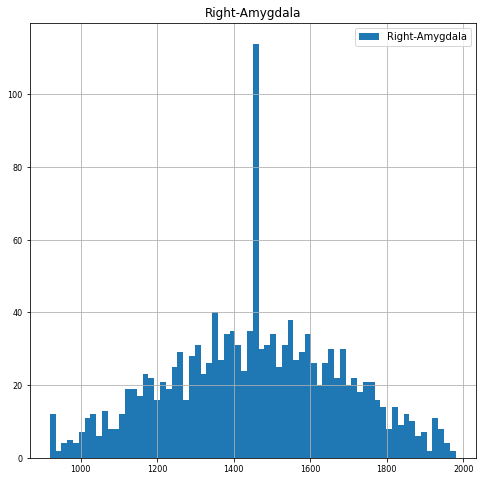

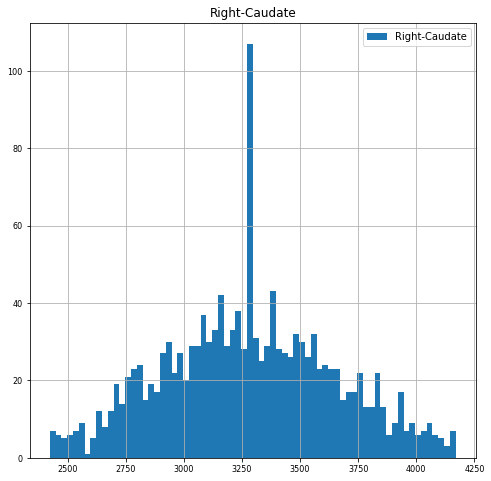

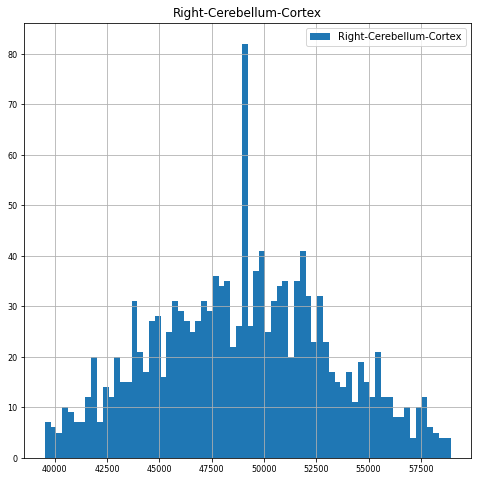

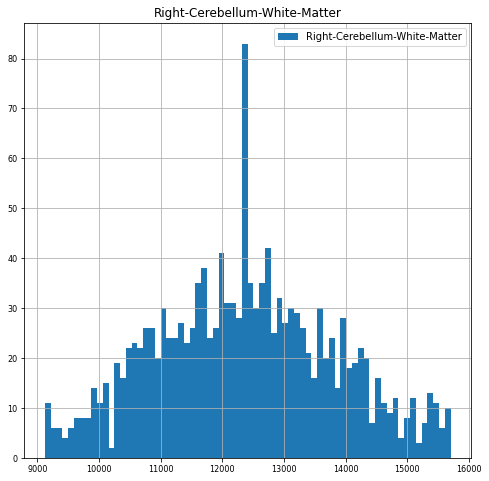

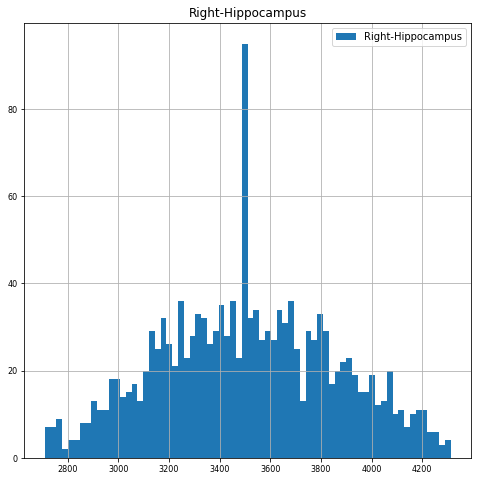

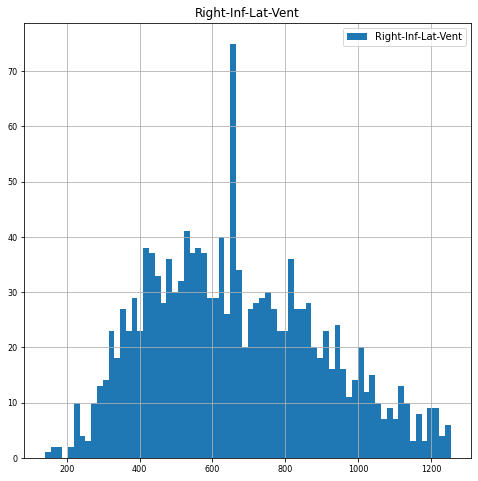

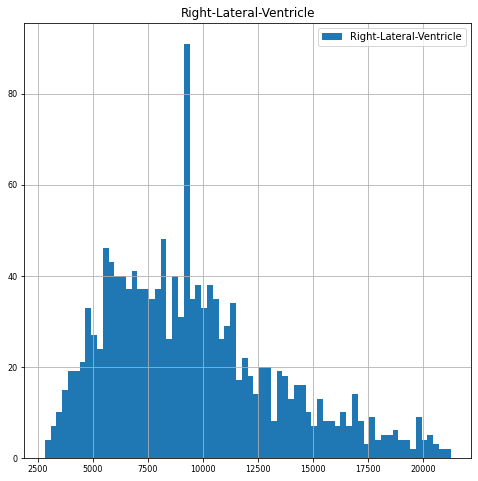

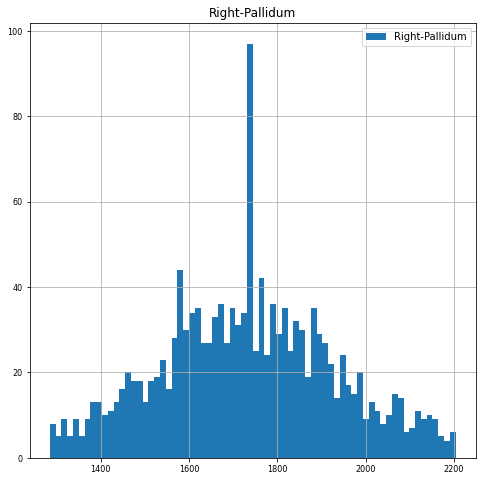

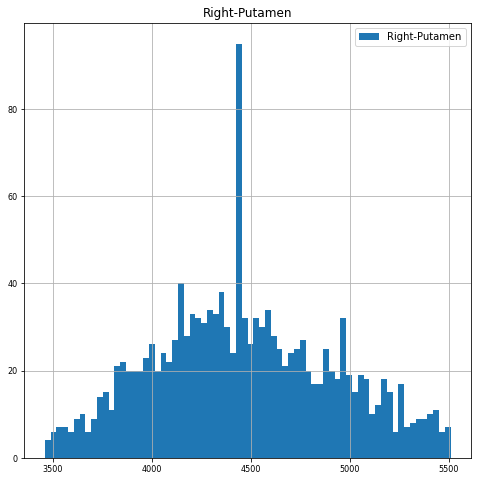

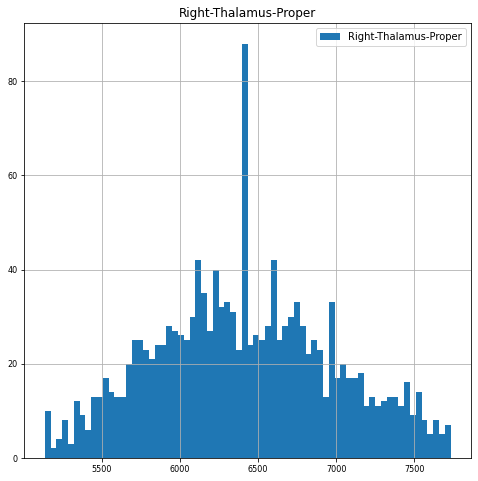

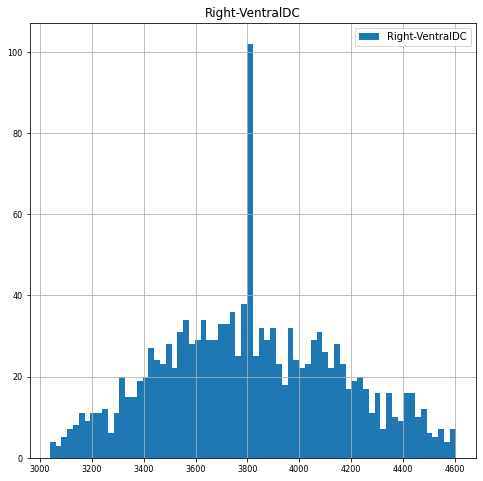

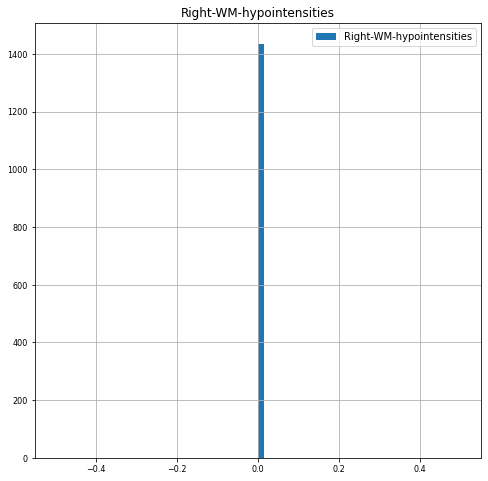

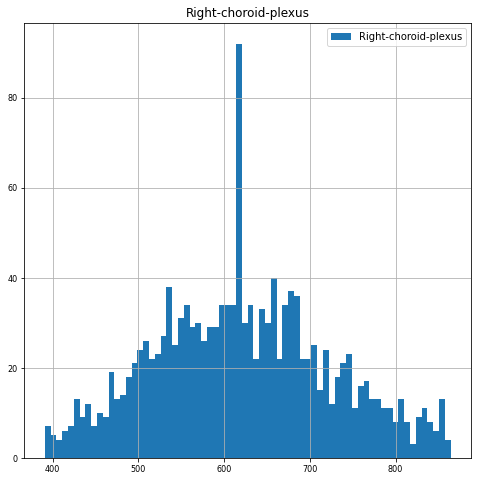

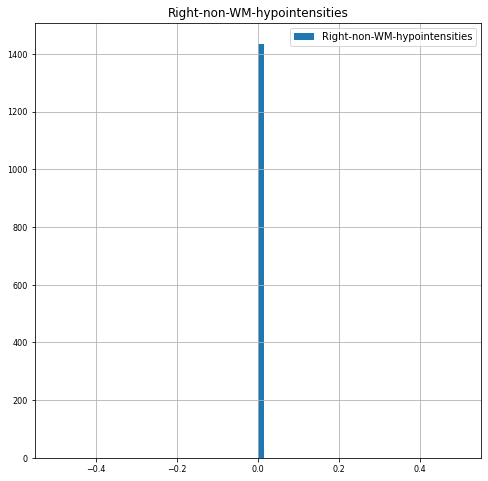

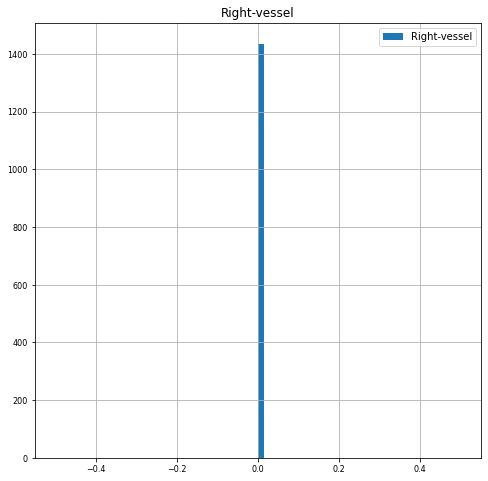

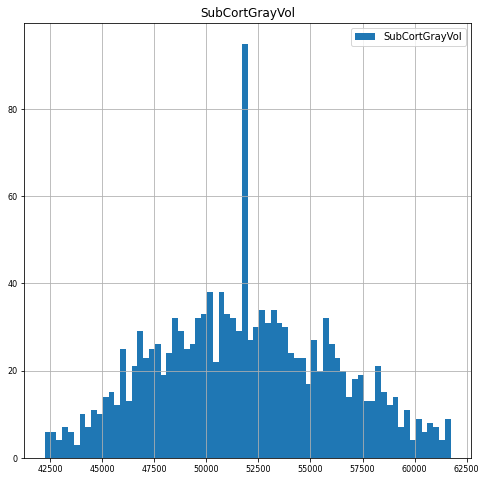

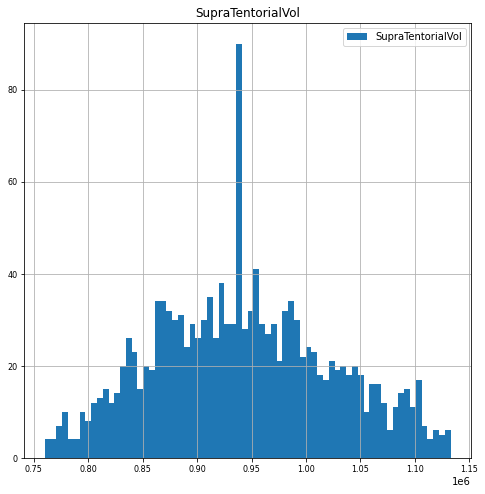

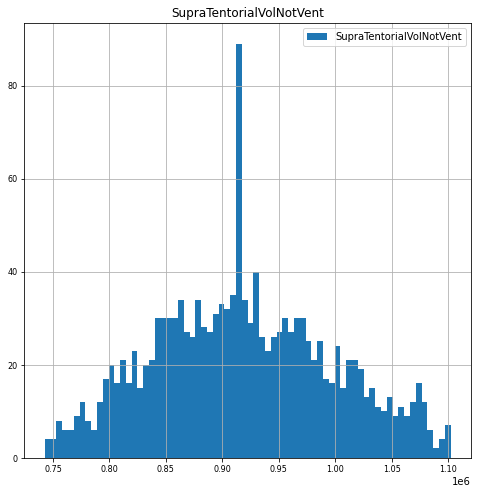

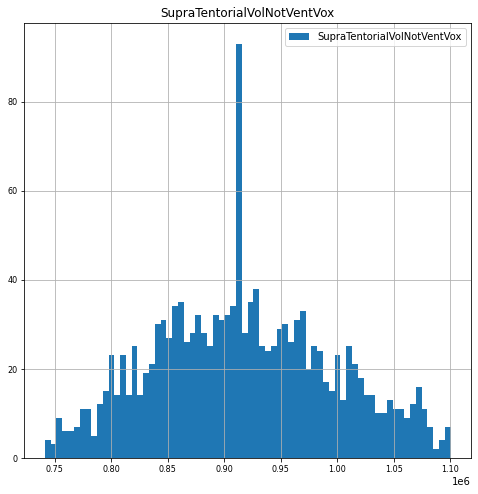

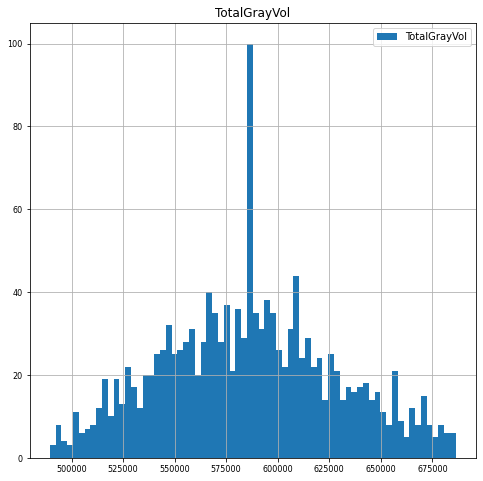

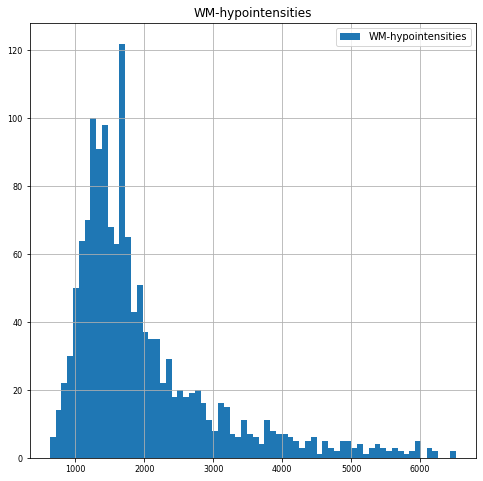

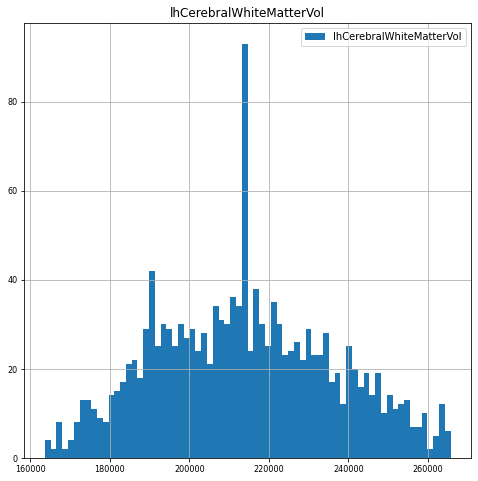

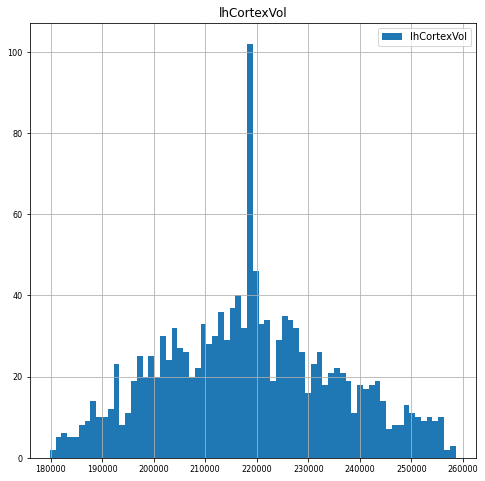

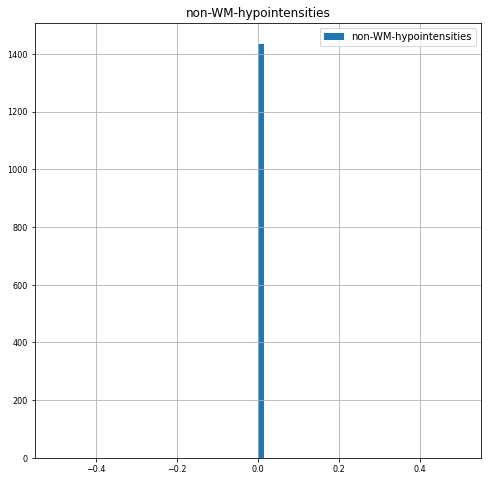

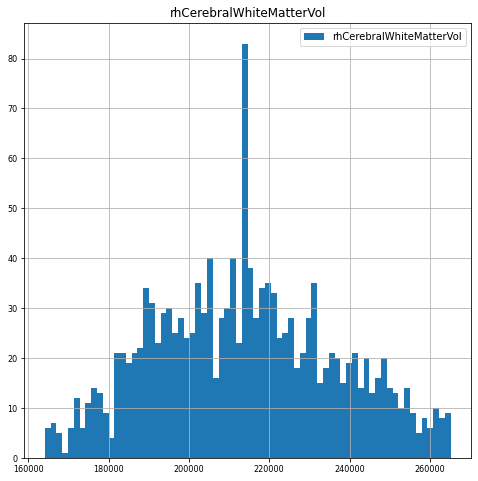

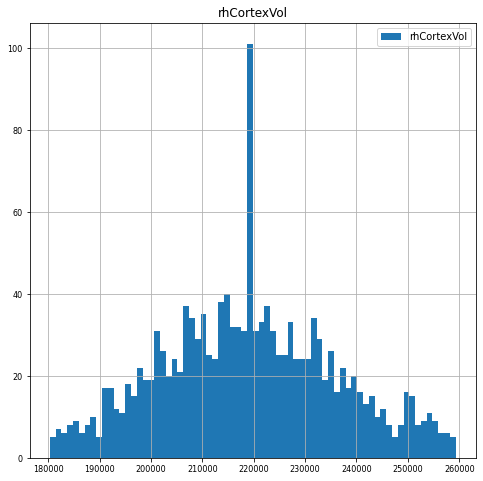

In [53]:
#Histograms

for i in range(len(statsFastSurfer.columns.tolist())):
    statsFastSurfer.hist(column=statsFastSurfer.columns[i],figsize=(8,8), bins=70, xlabelsize=8, ylabelsize=8, legend=True)
    plt.show()

#### FreeSurfer

<div class="alert alert-block alert-info">
Same steps for FreeSurfer dataset

In [54]:
#creamos una función con el nombre del atributo como entrada que nos devuelve el número de outliers del atributo que queramos
def outliers(atributo): 
    z_score = [statsFreeSurfer[atributo].mean() -2*statsFreeSurfer[str(atributo)].std(), statsFreeSurfer[str(atributo)].mean() +2*statsFreeSurfer[str(atributo)].std()]
    print("Intervalo z_score:",z_score)
    list_outliers = []
    count = 0

    for i in range(0,len(statsFreeSurfer[atributo])): #si el valor del atributo esta fuera de nuestro z-score, lo consideramos outlier
        if statsFreeSurfer[atributo].iloc[i]<z_score[0] or statsFreeSurfer[atributo].iloc[i]> z_score[1]:
            count = count + 1
            list_outliers.append(statsFreeSurfer[atributo].iloc[i])
        else: 
            continue

    print("Número de outliers:",count)         
    print("Valores de los outliers:",list_outliers)

In [55]:
for i in statsFreeSurfer.columns:
    print(i)
    outliers(i)
    print('\n')

3rd-Ventricle
Intervalo z_score: [287.51919763933665, 2251.7802452575993]
Número de outliers: 61
Valores de los outliers: [2280.7, 2329.6, 2437.7, 2711.6, 2279.8, 2882.2, 2377.1, 2917.4, 2408.2, 2560.8, 2698.3, 2336.8, 2663.5, 2446.2, 3871.0, 2258.3, 2568.1, 2694.4, 2503.9, 2518.9, 2285.1, 2272.5, 2726.7, 2338.8, 2348.1, 2325.6, 3484.5, 2855.4, 2516.3, 2476.0, 2861.3, 2422.6, 2418.0, 3517.3, 2647.9, 2532.9, 3060.1, 3209.0, 2252.1, 2340.1, 2342.5, 2920.7, 2519.2, 3349.0, 3006.6, 3414.1, 2976.3, 2510.7, 2781.0, 3093.6, 3337.0, 3156.0, 2361.5, 2289.4, 2292.3, 2543.8, 3192.9, 2764.1, 2400.0, 2535.5, 4393.4]


4th-Ventricle
Intervalo z_score: [785.288729348879, 2727.776312433851]
Número de outliers: 60
Valores de los outliers: [2919.5, 3001.3, 2852.4, 3054.0, 3027.3, 2947.3, 2906.5, 2877.6, 3095.9, 2929.4, 3800.2, 2775.7, 2851.2, 3114.0, 2753.3, 2806.4, 3801.4, 2760.7, 3162.6, 3000.4, 2812.6, 6206.6, 2763.6, 3266.7, 3154.2, 2936.1, 3084.5, 3542.3, 2786.7, 3153.0, 3006.1, 3102.4, 778.7, 2732

Número de outliers: 74
Valores de los outliers: [768.2, 757.4, 743.3, 847.5, 328.6, 773.4, 763.7, 734.5, 802.5, 732.9, 749.6, 365.0, 748.3, 733.1, 736.5, 810.8, 766.6, 758.7, 731.7, 730.9, 751.3, 788.1, 345.8, 346.8, 776.4, 790.9, 775.4, 787.7, 750.6, 904.1, 736.0, 831.7, 767.7, 891.2, 743.6, 327.2, 813.3, 353.9, 748.9, 737.7, 349.7, 776.8, 735.5, 740.6, 786.4, 786.1, 353.7, 745.1, 353.7, 744.6, 737.7, 836.5, 752.0, 355.0, 778.6, 744.7, 739.2, 760.7, 731.7, 361.1, 768.0, 763.0, 760.3, 355.8, 357.5, 730.5, 738.5, 847.7, 867.0, 322.7, 293.3, 293.9, 343.2, 751.1]


Left-Amygdala
Intervalo z_score: [1022.6457925108989, 1878.170502753725]
Número de outliers: 68
Valores de los outliers: [1971.0, 689.5, 2127.8, 2122.7, 866.0, 1890.5, 1951.8, 1000.1, 1959.4, 993.0, 2024.5, 943.0, 854.5, 2003.7, 1891.8, 2055.9, 1953.7, 1960.5, 1985.0, 1945.4, 971.1, 967.2, 1956.7, 1902.1, 1881.7, 1951.3, 2053.3, 2050.7, 2017.7, 2020.8, 1900.1, 2022.4, 1925.1, 2088.8, 1880.8, 1904.9, 1011.0, 1933.1, 1893.2, 1977

Número de outliers: 47
Valores de los outliers: [166.1, 140.6, 201.8, 226.7, 212.4, 177.0, 162.7, 142.8, 288.2, 228.4, 362.4, 161.5, 135.3, 138.6, 126.1, 133.4, 142.1, 153.8, 137.6, 500.5, 139.9, 151.9, 130.4, 151.9, 184.9, 131.2, 134.0, 199.3, 132.5, 150.6, 141.6, 315.9, 140.5, 131.6, 184.1, 141.7, 128.7, 126.2, 141.5, 138.8, 165.6, 140.9, 198.8, 194.0, 222.8, 240.3, 281.5]


MaskVol
Intervalo z_score: [1303861.0631609396, 1878543.918450307]
Número de outliers: 67
Valores de los outliers: [1885060.6875, 1953629.296875, 1920620.53125, 1907846.578125, 2006081.015625, 2047134.515625, 1280046.796875, 1883178.28125, 2047753.828125, 1277858.109375, 1914620.203125, 1931254.3125, 1878876.0, 1950281.71875, 1911613.078125, 1904045.484375, 1245779.15625, 1297410.328125, 1251054.28125, 1940427.140625, 1938288.234375, 1887226.59375, 1881565.453125, 2071418.484375, 1880601.046875, 1942901.4375, 1933005.09375, 1906228.265625, 1295488.265625, 2050944.46875, 1996594.734375, 1879380.984375, 1918244.953

Número de outliers: 0
Valores de los outliers: []


Right-choroid-plexus
Intervalo z_score: [362.52716794925107, 941.5125256440637]
Número de outliers: 60
Valores de los outliers: [1003.7, 1055.6, 964.3, 329.1, 981.6, 1030.8, 944.7, 971.6, 1155.7, 988.4, 355.8, 1149.2, 1009.3, 976.6, 1024.9, 958.8, 337.0, 976.6, 1052.5, 983.8, 1038.1, 978.9, 1035.9, 360.9, 337.1, 1038.9, 960.2, 336.7, 997.2, 947.7, 348.9, 300.8, 954.2, 344.8, 266.2, 1111.1, 339.0, 952.7, 1020.9, 1019.8, 968.0, 947.8, 964.3, 356.4, 311.8, 994.6, 966.6, 974.6, 1016.6, 975.3, 1179.5, 1189.2, 950.7, 1105.2, 346.9, 976.7, 1159.2, 306.8, 995.8, 1059.9]


Right-non-WM-hypointensities
Intervalo z_score: [0.0, 0.0]
Número de outliers: 0
Valores de los outliers: []


Right-vessel
Intervalo z_score: [-18.60285579378499, 104.43210370464848]
Número de outliers: 63
Valores de los outliers: [208.2, 120.0, 107.7, 134.8, 151.3, 104.6, 115.4, 160.7, 105.2, 106.7, 108.3, 163.0, 140.6, 142.4, 105.4, 106.3, 145.7, 152.8, 118.2, 111.4, 113.

In [56]:
for i in range(0, len(statsFreeSurfer.columns)):
    z_score = [statsFreeSurfer[statsFreeSurfer.columns[i]].mean() -2*statsFreeSurfer[statsFreeSurfer.columns[i]].std(), statsFreeSurfer[statsFreeSurfer.columns[i]].mean() +2*statsFreeSurfer[statsFreeSurfer.columns[i]].std()]
    for j in range(0,len(statsFreeSurfer[statsFreeSurfer.columns[i]])):
        if statsFreeSurfer[statsFreeSurfer.columns[i]].iloc[j]<z_score[0] or statsFreeSurfer[statsFreeSurfer.columns[i]].iloc[j]> z_score[1]:
            statsFreeSurfer[statsFreeSurfer.columns[i]].replace(statsFreeSurfer[statsFreeSurfer.columns[i]].iloc[j],statsFreeSurfer[statsFreeSurfer.columns[i]].median(),inplace=True)
        else: 
             continue

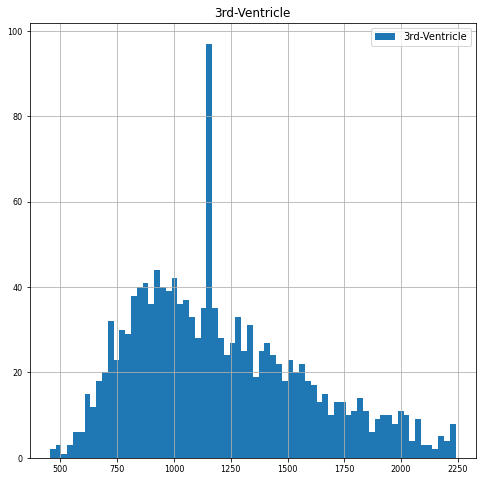

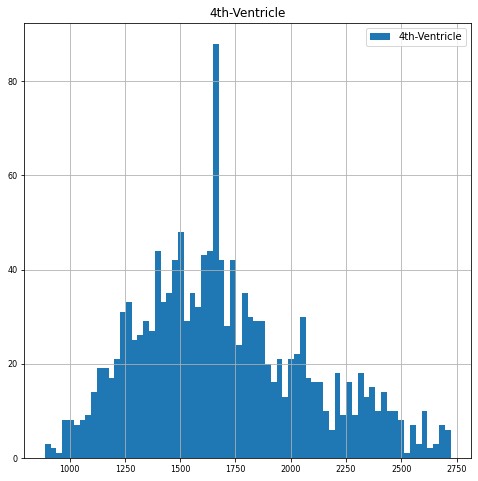

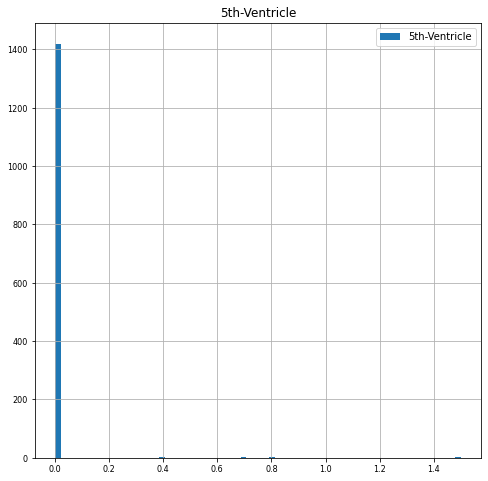

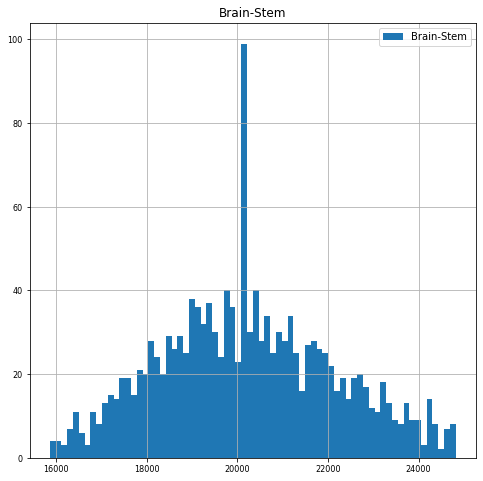

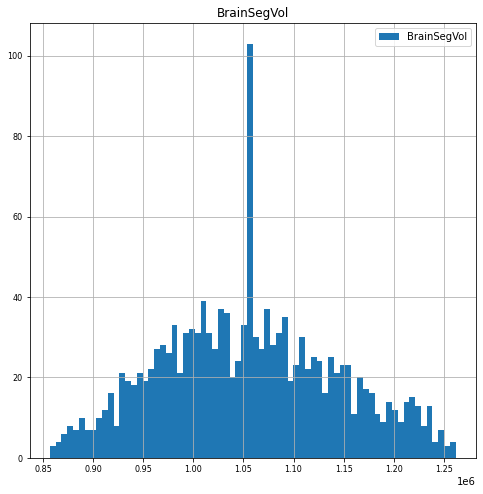

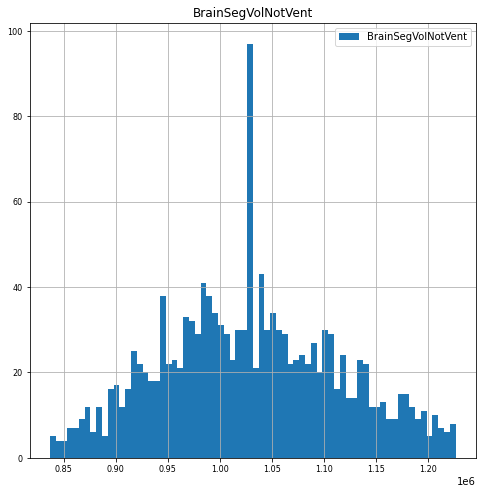

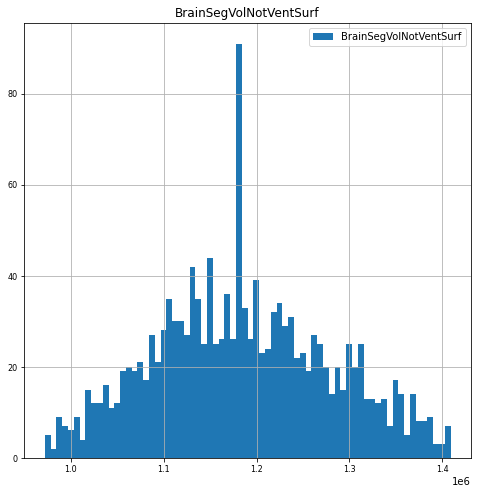

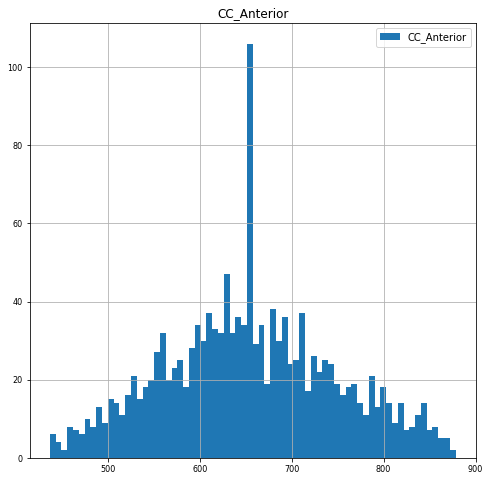

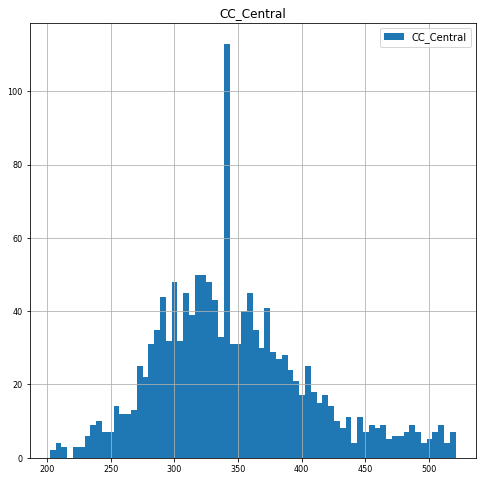

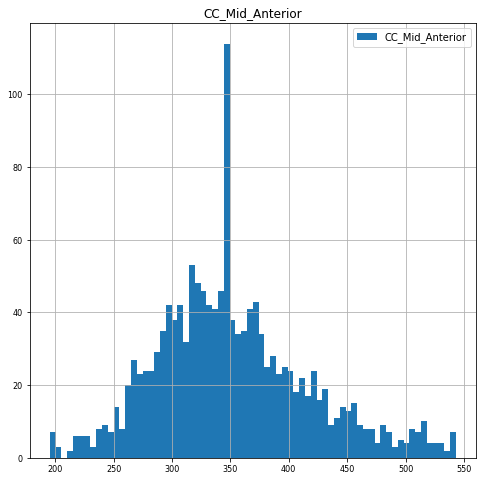

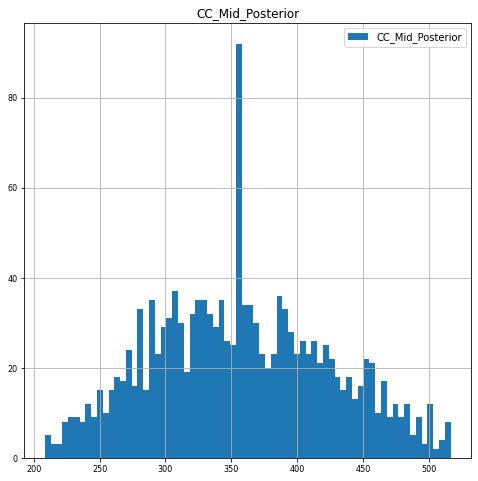

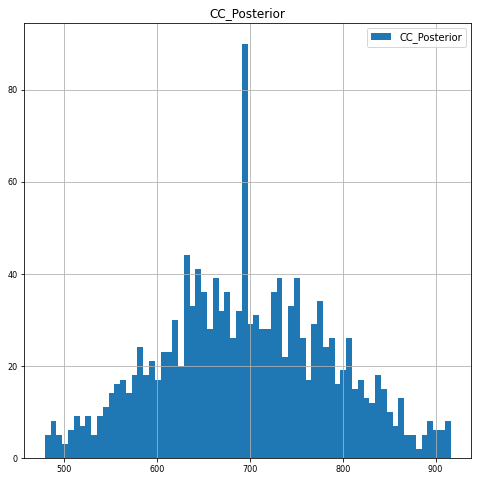

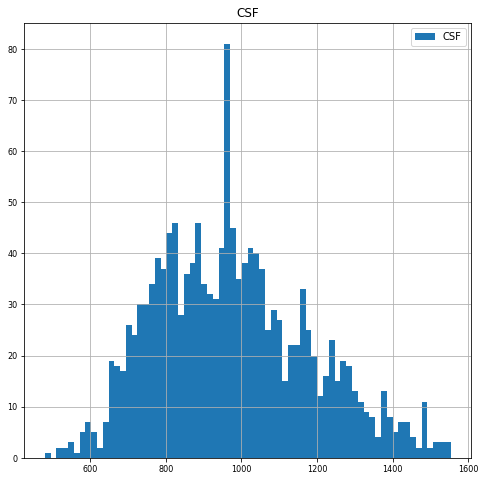

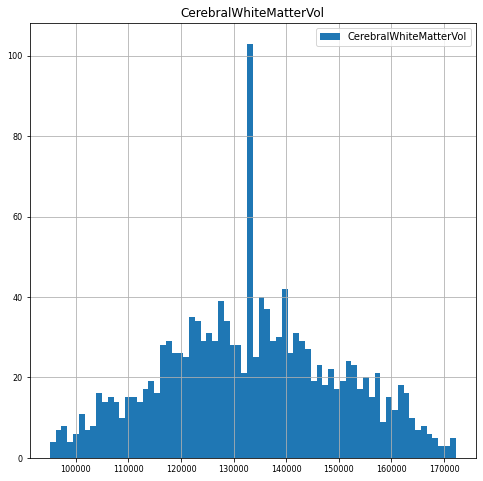

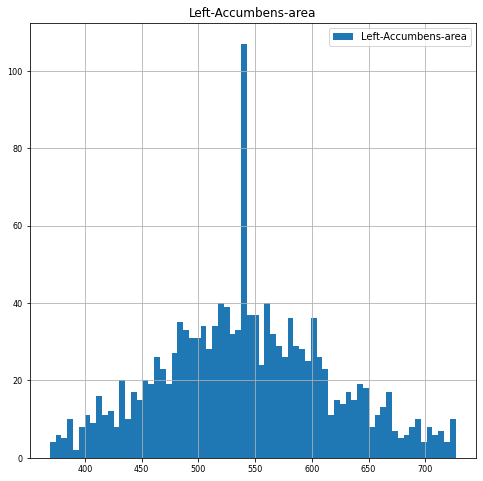

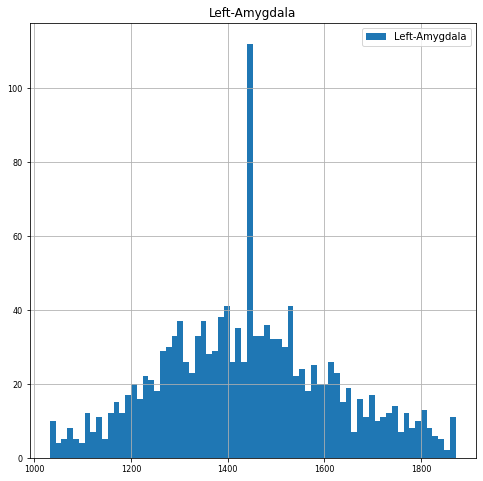

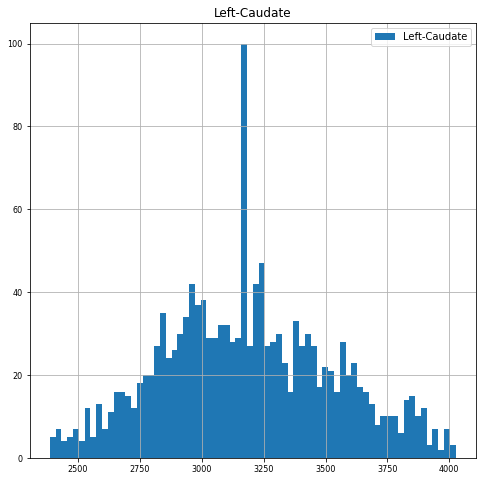

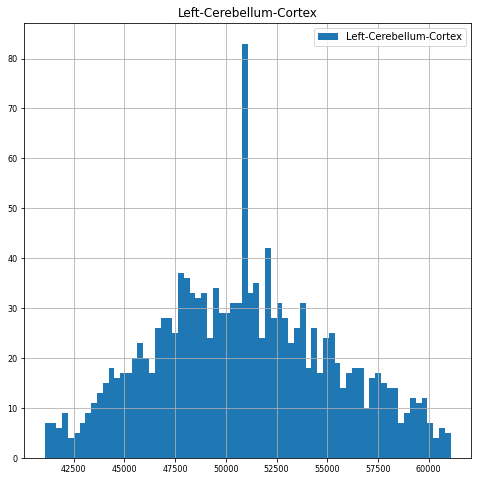

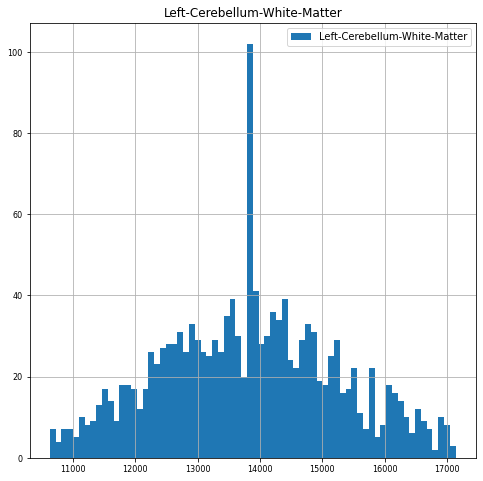

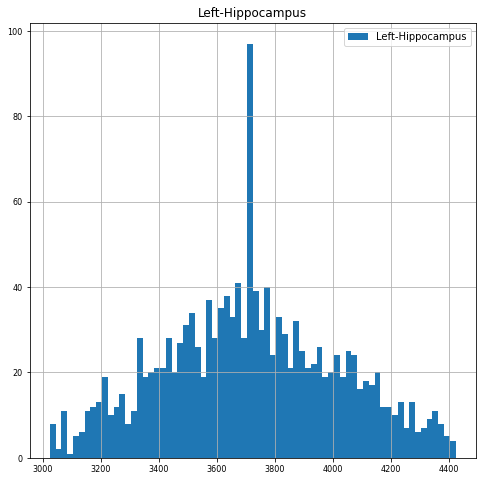

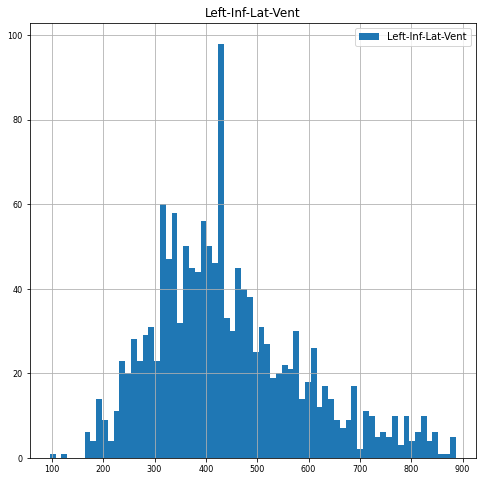

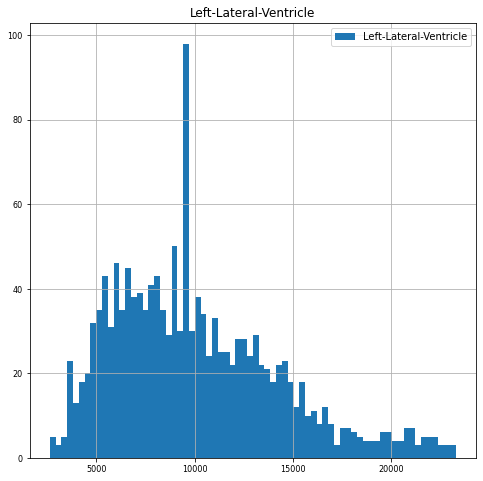

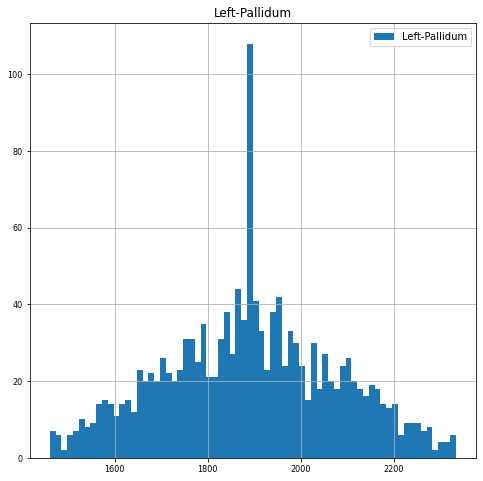

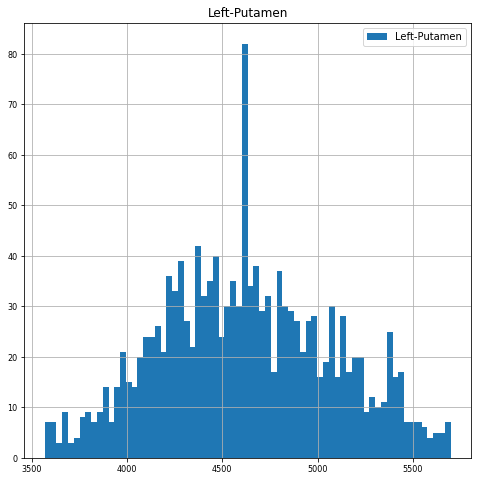

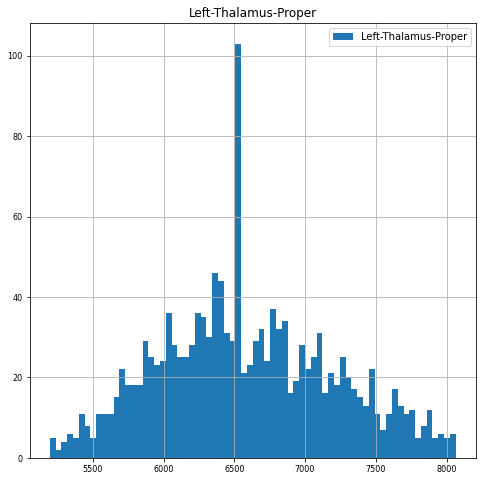

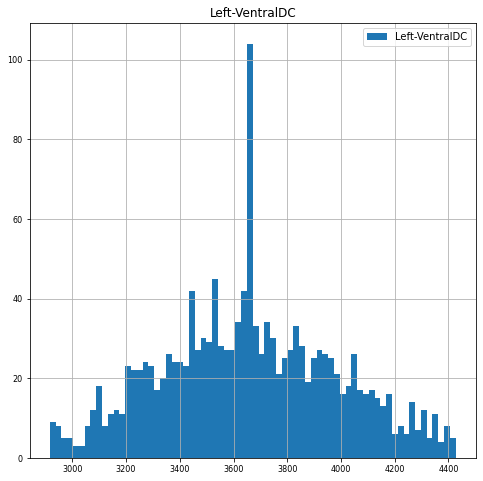

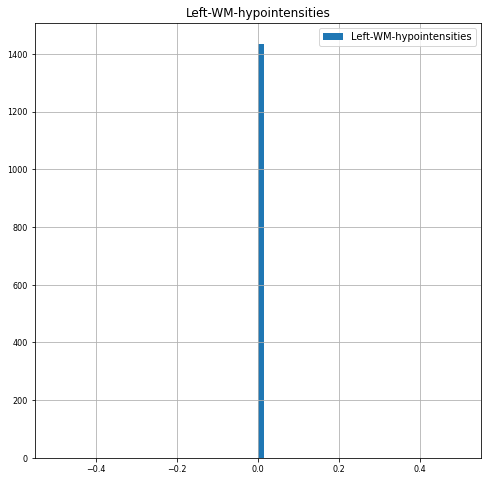

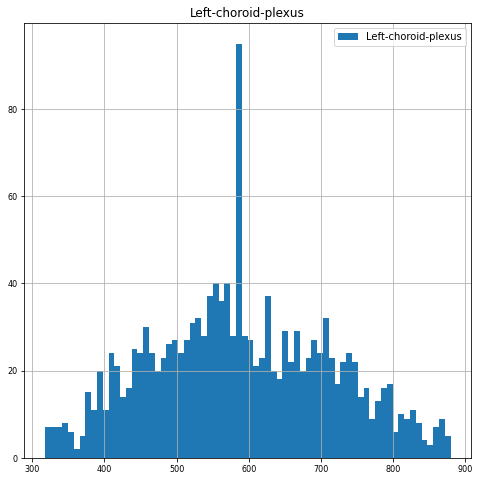

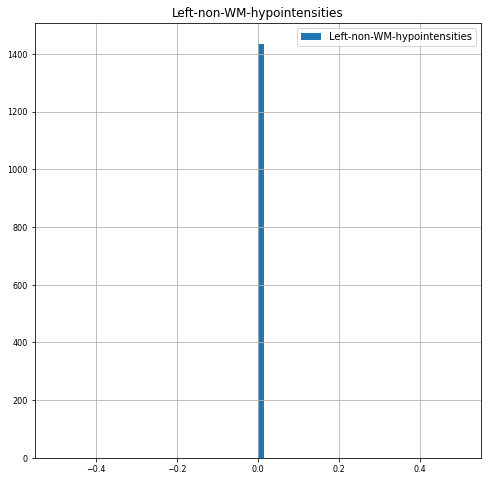

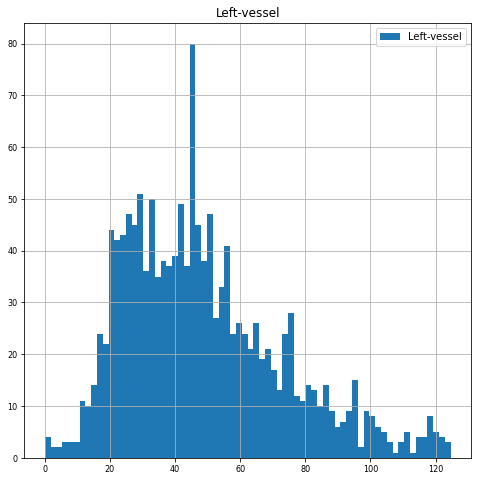

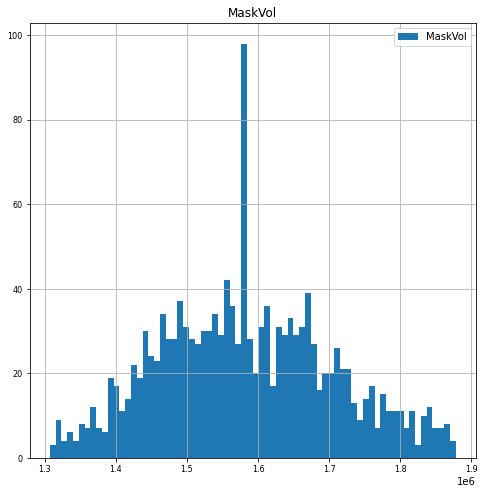

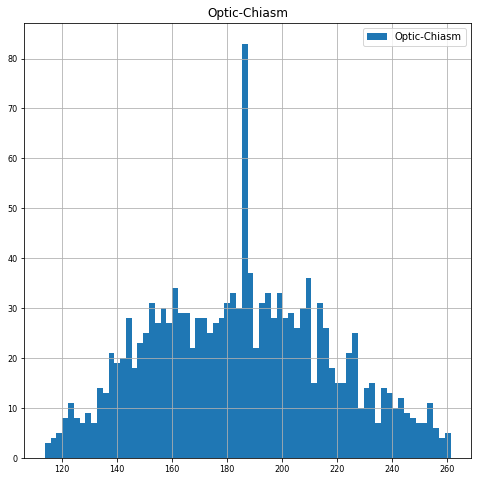

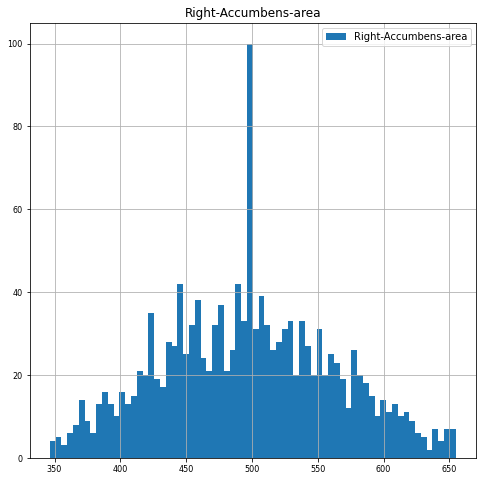

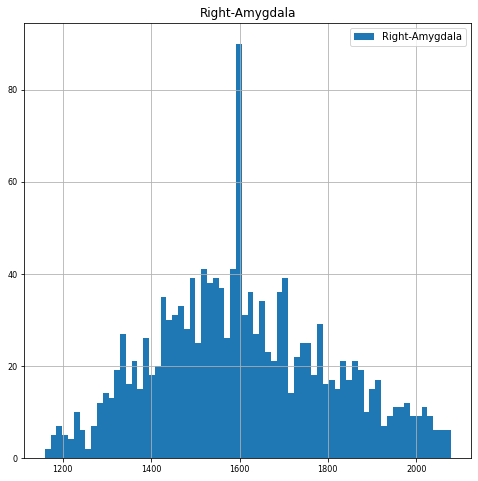

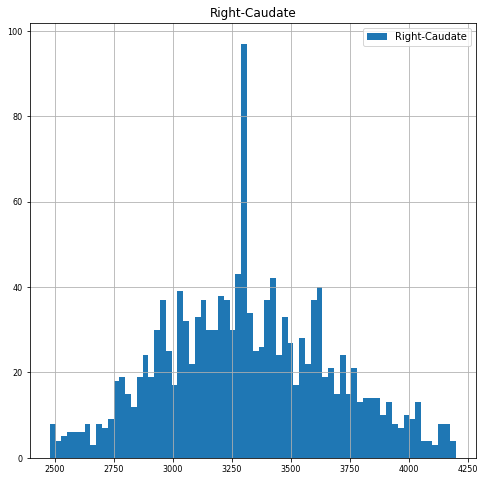

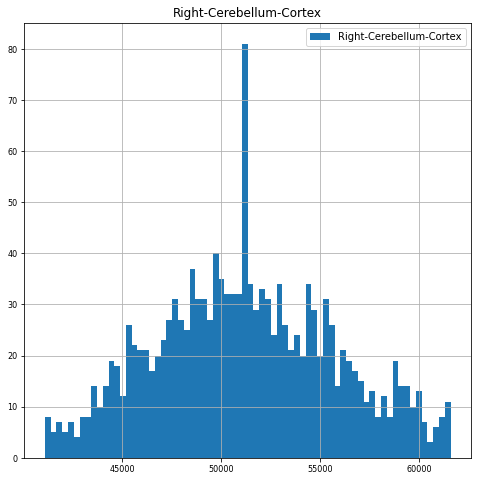

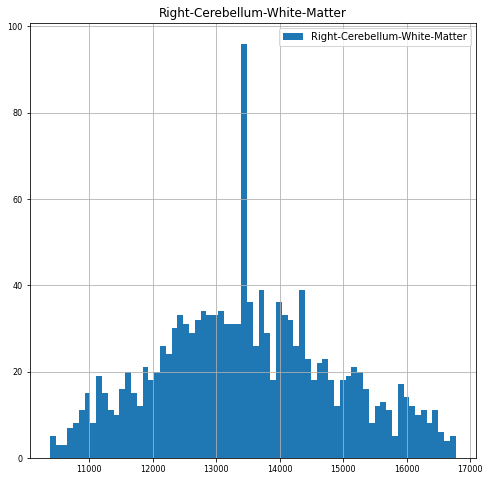

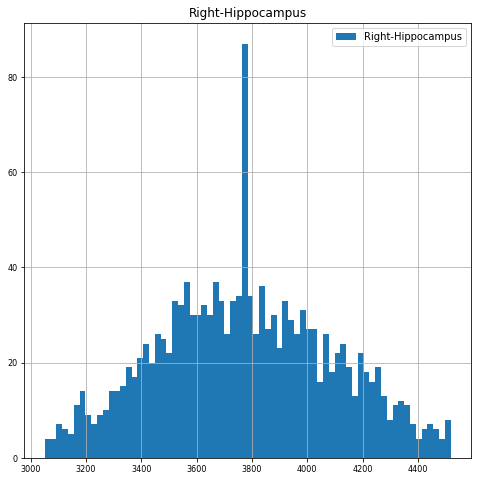

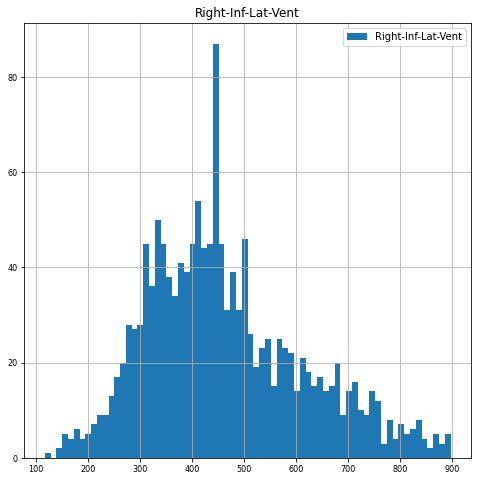

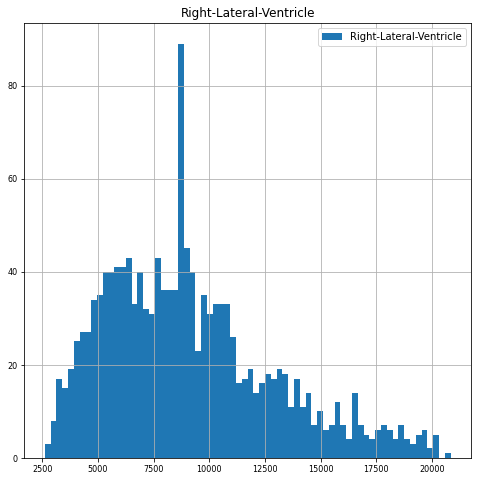

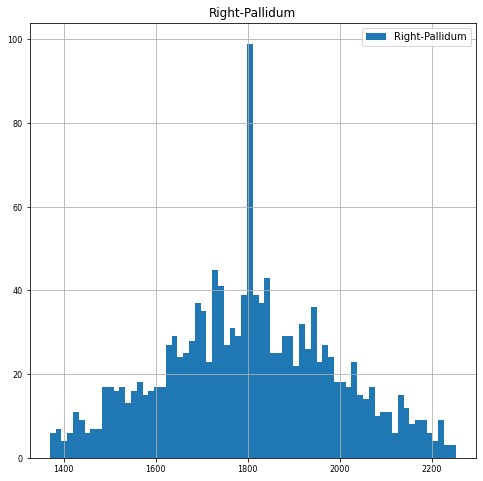

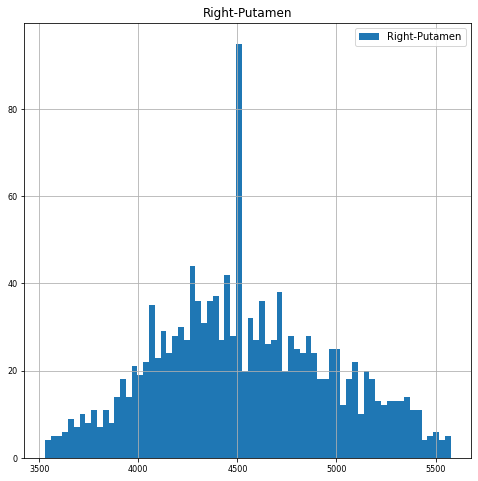

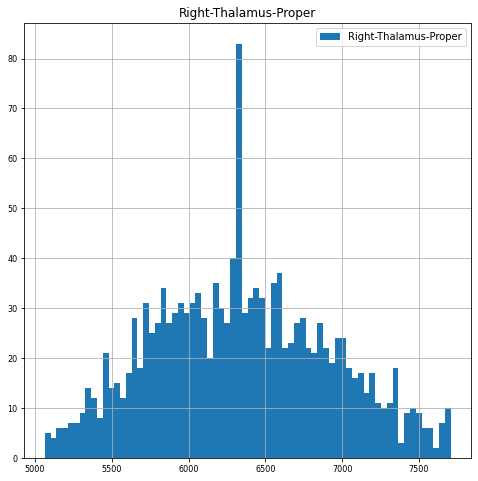

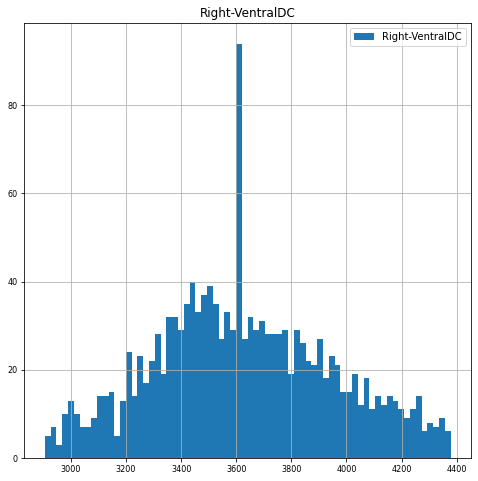

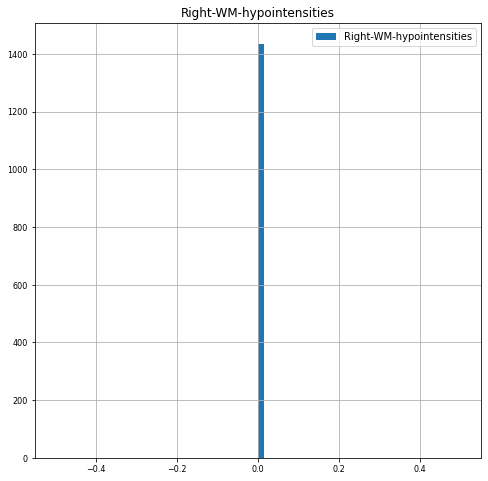

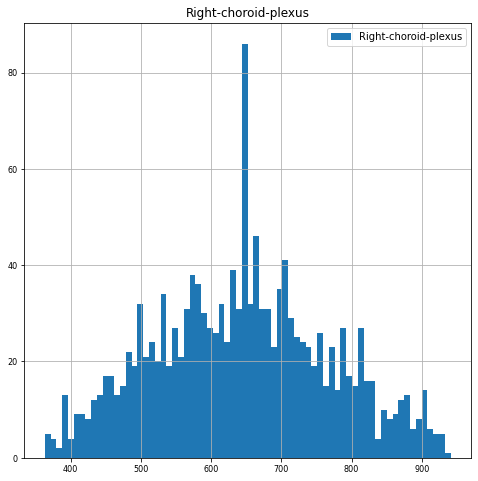

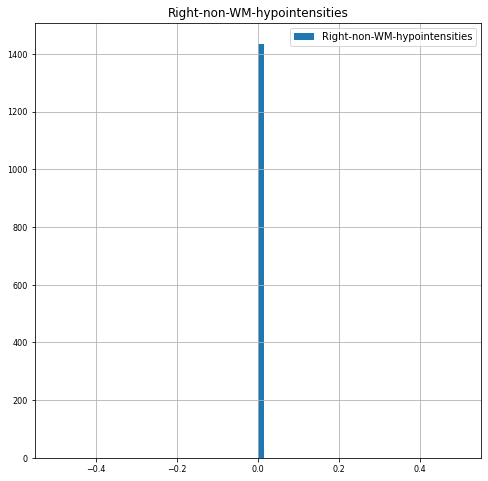

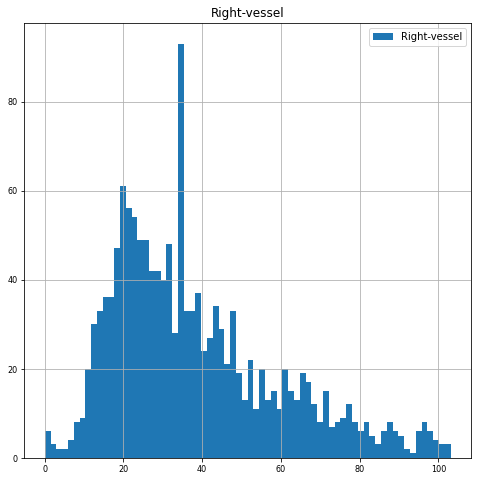

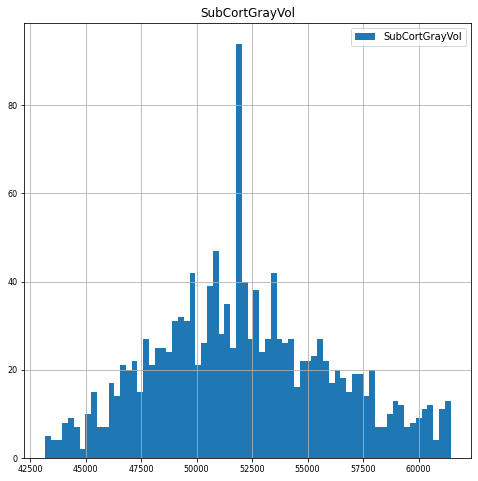

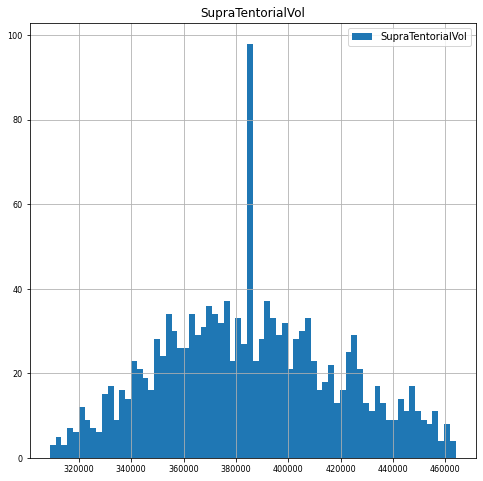

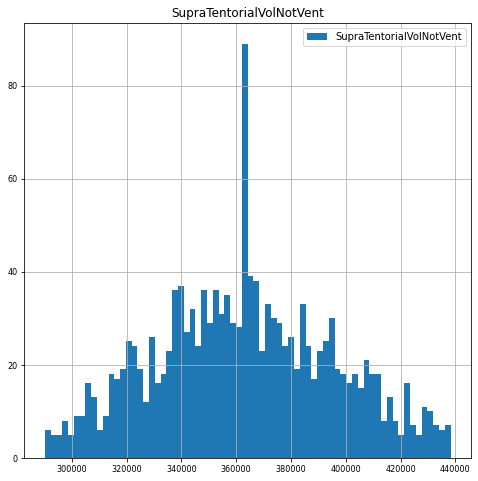

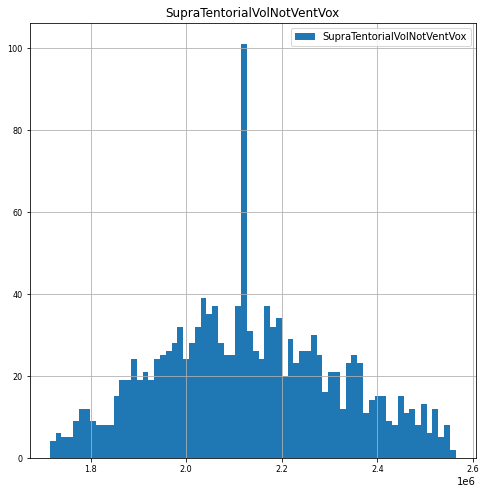

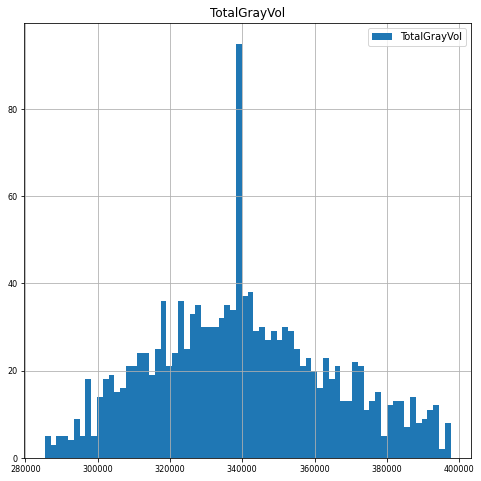

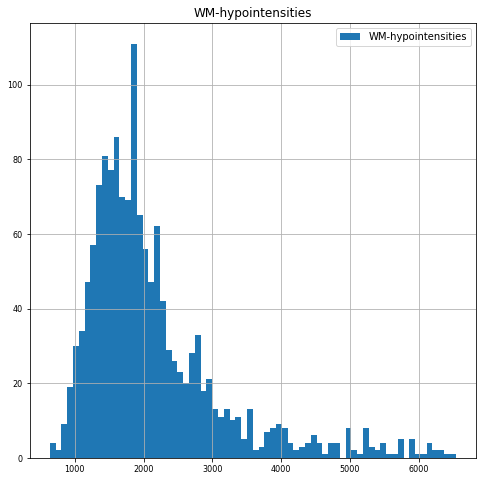

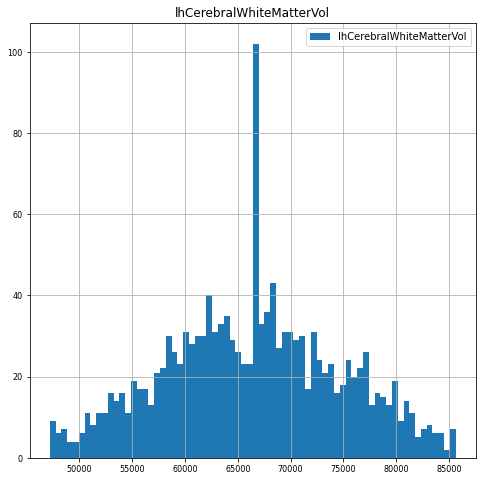

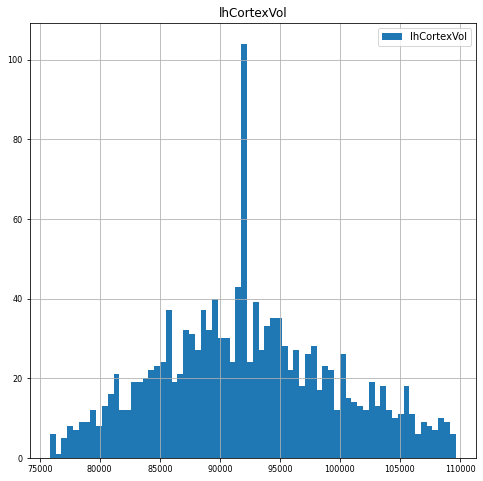

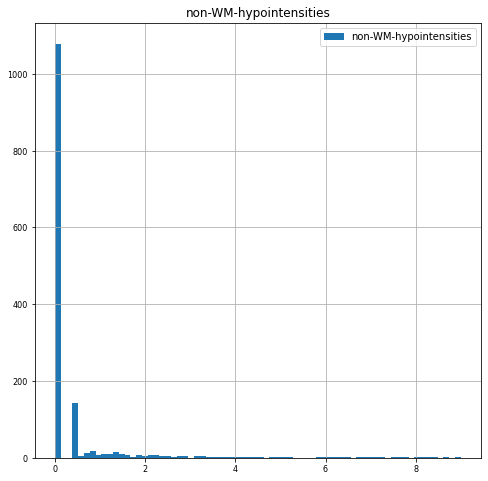

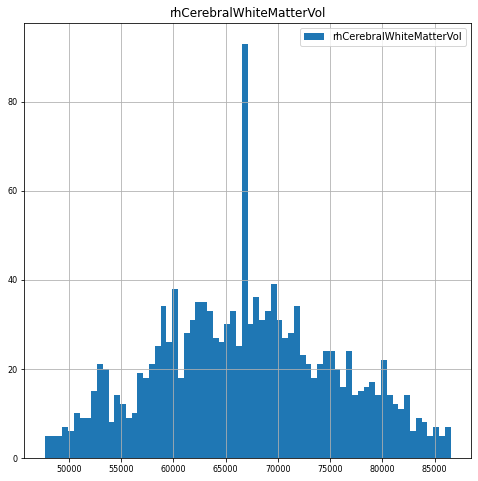

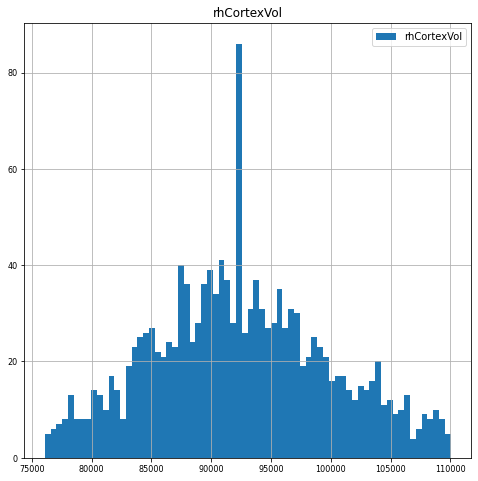

In [57]:
#Histograms

for i in range(len(statsFreeSurfer.columns.tolist())):
    statsFreeSurfer.hist(column=statsFreeSurfer.columns[i],figsize=(8,8), bins=70, xlabelsize=8, ylabelsize=8, legend=True)
    plt.show()

## Wilcoxon test without outliers

$H_0$: $P(X>Y) = 0.5$ (Both data come from poblations equallly distributed)

$H_1$: $P(X>Y) \neq 0.5$ (Both data doesn't come from poblations equallly distributed)

In [58]:
from scipy.stats import wilcoxon
import numpy as np

wilcox_not = []
wilcox = []

for i in statsFastSurfer.columns:

    x = statsFastSurfer[i]
    y = statsFreeSurfer[i]
    if i in non_seg:
        continue
    else:
        if wilcoxon(x, y)[1] < 0.05:

            result = "we can accept the alternative hypothesis"
            wilcox_not.append(i)
        else:
            
            result = "we can't reject the null hypothesis"
            wilcox.append(i)
        

    print('In the',i,'the Wilcoxon result is: ', wilcoxon(x, y),'so ', result,'\n')

In the 3rd-Ventricle the Wilcoxon result is:  WilcoxonResult(statistic=71384.5, pvalue=5.833467263029156e-176) so  we can accept the alternative hypothesis 

In the 4th-Ventricle the Wilcoxon result is:  WilcoxonResult(statistic=20479.5, pvalue=4.568046258309207e-218) so  we can accept the alternative hypothesis 

In the Brain-Stem the Wilcoxon result is:  WilcoxonResult(statistic=105537.0, pvalue=2.9166127972944035e-150) so  we can accept the alternative hypothesis 

In the BrainSegVol the Wilcoxon result is:  WilcoxonResult(statistic=139994.0, pvalue=2.0782683409188488e-126) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVent the Wilcoxon result is:  WilcoxonResult(statistic=200388.0, pvalue=1.256191545529938e-89) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVentSurf the Wilcoxon result is:  WilcoxonResult(statistic=162.0, pvalue=3.830331085029255e-236) so  we can accept the alternative hypothesis 

In the CC_Anterior the Wilcoxon result is

In [59]:
wilcox

[]

## t-test without outliers

$H_0$: $\mu_0 = \mu_1$ (Mean values are equal)

$H_1$: $\mu_0 \neq \mu_1$ (Mean values are not equal)

In [60]:
from scipy.stats import ttest_rel
import numpy as np

t_not = []
t = []

for i in statsFastSurfer.columns:

    x = statsFastSurfer[i]
    y = statsFreeSurfer[i]
    if i in non_seg:
        continue
    else:
        if ttest_rel(x, y)[1] < 0.001:

            result = "we can accept the alternative hypothesis"
            t_not.append(i)
        else:
            
            result = "we can't reject the null hypothesis"
            t.append(i)
        

    print('In the',i,'the t-test result is: ', ttest_rel(x, y),'so ', result,'\n')

In the 3rd-Ventricle the t-test result is:  Ttest_relResult(statistic=20.305325360386835, pvalue=8.864065469593243e-81) so  we can accept the alternative hypothesis 

In the 4th-Ventricle the t-test result is:  Ttest_relResult(statistic=41.586826672351904, pvalue=1.0721165390470176e-248) so  we can accept the alternative hypothesis 

In the Brain-Stem the t-test result is:  Ttest_relResult(statistic=25.411652081887148, pvalue=6.237295970439642e-118) so  we can accept the alternative hypothesis 

In the BrainSegVol the t-test result is:  Ttest_relResult(statistic=16.194549489764743, pvalue=2.6512752140651977e-54) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVent the t-test result is:  Ttest_relResult(statistic=12.781595608559316, pvalue=1.6557600889983163e-35) so  we can accept the alternative hypothesis 

In the BrainSegVolNotVentSurf the t-test result is:  Ttest_relResult(statistic=-150.20591946321505, pvalue=0.0) so  we can accept the alternative hypothesis 

I

In [61]:
t

[]

## Kolmogorov Smirnov without outliers

In [62]:
from scipy.stats import ks_2samp
import numpy as np

ks_regions_not = []
ks_regions = []

for i in statsFastSurfer.columns:

    x = statsFastSurfer[i]
    y = statsFreeSurfer[i]
    if ks_2samp(x, y)[1] < 0.05:
        
        result = "They don't follow the same distribution"
        ks_regions_not.append(i)
    else:
        if i in non_seg:
            continue
        else:
            result = 'They follow the same distribution'
            ks_regions.append(i)
        

    print('In the',i,'the KS-Test result is: ', ks_2samp(x, y),'so ', result,'\n')

In the 3rd-Ventricle the KS-Test result is:  KstestResult(statistic=0.11559888579387187, pvalue=8.941957731823975e-09) so  They don't follow the same distribution 

In the 4th-Ventricle the KS-Test result is:  KstestResult(statistic=0.20543175487465182, pvalue=6.350347568255181e-27) so  They don't follow the same distribution 

In the Brain-Stem the KS-Test result is:  KstestResult(statistic=0.16782729805013927, pvalue=4.551883063355032e-18) so  They don't follow the same distribution 

In the BrainSegVol the KS-Test result is:  KstestResult(statistic=0.09401114206128133, pvalue=6.066792367619286e-06) so  They don't follow the same distribution 

In the BrainSegVolNotVent the KS-Test result is:  KstestResult(statistic=0.08844011142061281, pvalue=2.6206327122579326e-05) so  They don't follow the same distribution 

In the BrainSegVolNotVentSurf the KS-Test result is:  KstestResult(statistic=0.5619777158774373, pvalue=2.9488724491806267e-209) so  They don't follow the same distribution 


In [63]:
ks_regions

[]

In [64]:
concat_df = pd.concat([statsFastSurfer,statsFreeSurfer]).sort_index()

concat_df.head(10)

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                              
10010   FastSurfer         1252.3         1545.0            0.0     23478.7   
        FreeSurfer         1159.4         1573.8            0.0     23742.3   
10011   FastSurfer         1395.7         1464.9            0.0     20967.4   
        FreeSurfer         1275.4         1295.1            0.0     19752.6   
10012   FastSurfer         1373.6         1385.9            0.0     21221.4   
        FreeSurfer         1380.4         1170.0            0.0     20233.4   
10014   FastSurfer         1262.1         2172.9            0.0     19249.0   
        FreeSurfer         1094.4         1844.8            0.0     18933.6   
10016   FastSurfer          869.7         1429.4            0.0     23659.8   
        FreeSurfer          687.6         1233.8            0.0     24217.7   

                     BrainSegVol  BrainSegVolNotVent  BrainSegVolNotVentSurf  \
subject Software                                                               
10010   FastSurfer  1.130872e+06        1.103652e+06            1.103846e+06   
        FreeSurfer  1.120108e+06        1.094086e+06            1.279596e+06   
10011   FastSurfer  1.013429e+06        9.930320e+05            9.933133e+05   
        FreeSurfer  9.905536e+05        9.711305e+05            1.121663e+06   
10012   FastSurfer  1.074364e+06        1.042517e+06            1.042115e+06   
        FreeSurfer  1.060461e+06        1.030194e+06            1.161398e+06   
10014   FastSurfer  1.004189e+06        9.769280e+05            9.771503e+05   
        FreeSurfer  9.999252e+05        9.761669e+05            1.146797e+06   
10016   FastSurfer  1.141082e+06        1.125395e+06            1.125598e+06   
        FreeSurfer  1.138987e+06        1.125878e+06            1.324557e+06   

                    CC_Anterior  CC_Central  CC_Mid_Anterior  ...  \
subject Software                                              ...   
10010   FastSurfer       1159.2       914.5           541.80  ...   
        FreeSurfer        725.7       372.8           400.90  ...   
10011   FastSurfer        703.7       339.2           350.50  ...   
        FreeSurfer        518.1       258.3           268.40  ...   
10012   FastSurfer        981.2       712.4           388.50  ...   
        FreeSurfer        664.5       279.2           301.50  ...   
10014   FastSurfer        870.0       467.3           390.20  ...   
        FreeSurfer        647.0       280.9           297.00  ...   
10016   FastSurfer        932.0       754.3           466.55  ...   
        FreeSurfer        708.5       432.3           348.05  ...   

                    SupraTentorialVol  SupraTentorialVolNotVent  \
subject Software                                                  
10010   FastSurfer       9.853291e+05             962081.127032   
        FreeSurfer       4.044504e+05             382244.984786   
10011   FastSurfer       8.956513e+05             879223.319629   
        FreeSurfer       3.632158e+05             347508.095220   
10012   FastSurfer       9.587228e+05             930585.844341   
        FreeSurfer       3.939082e+05             367047.816728   
10014   FastSurfer       8.753833e+05             852697.330292   
        FreeSurfer       3.592436e+05             339077.156891   
10016   FastSurfer       1.006365e+06             994089.588492   
        FreeSurfer       4.136746e+05             403208.335860   

                    SupraTentorialVolNotVentVox   TotalGrayVol  \
subject Software                                                 
10010   FastSurfer                     960743.0  606493.534351   
        FreeSurfer                    2241017.0  361617.995000   
10011   FastSurfer                     877813.0  579274.765061   
        FreeSurfer                    2018412.0  327493.800819   
10012   FastSurfer                     930082.0  584596.562471   
        FreeSu

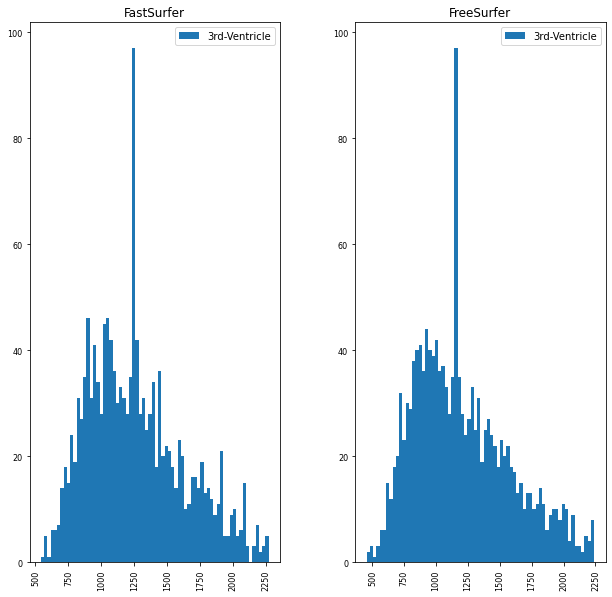

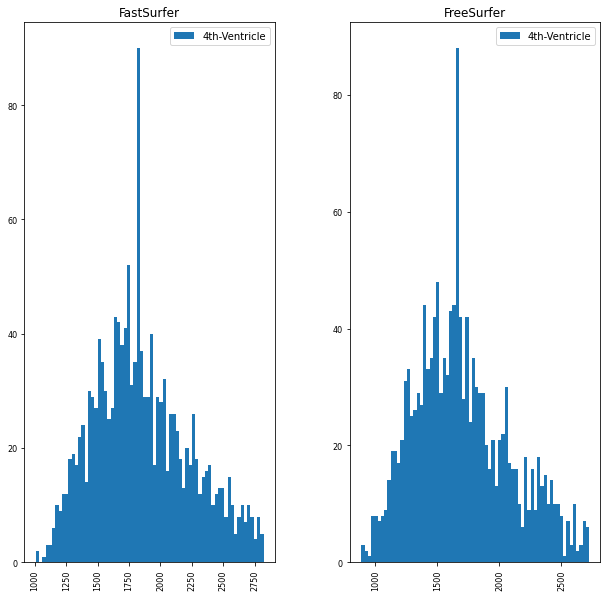

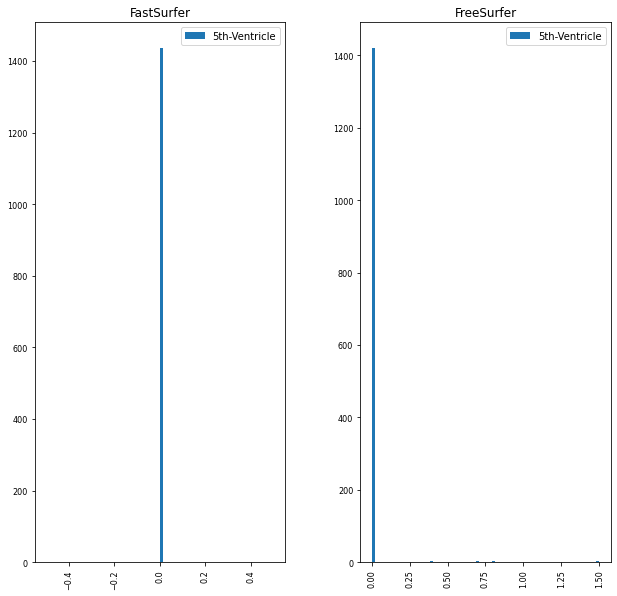

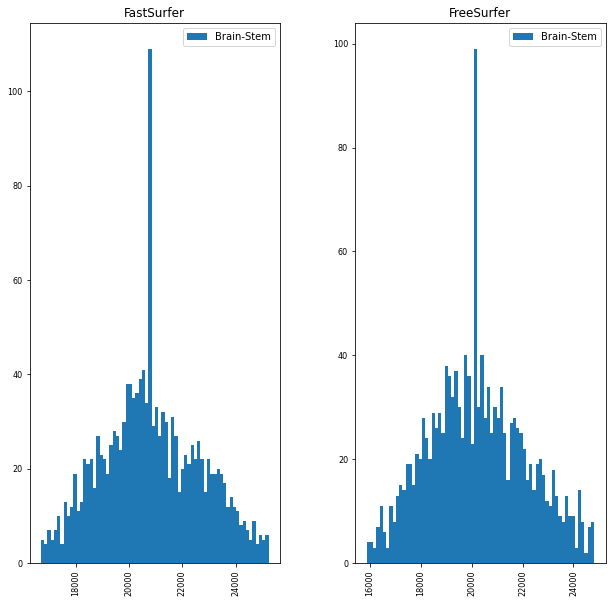

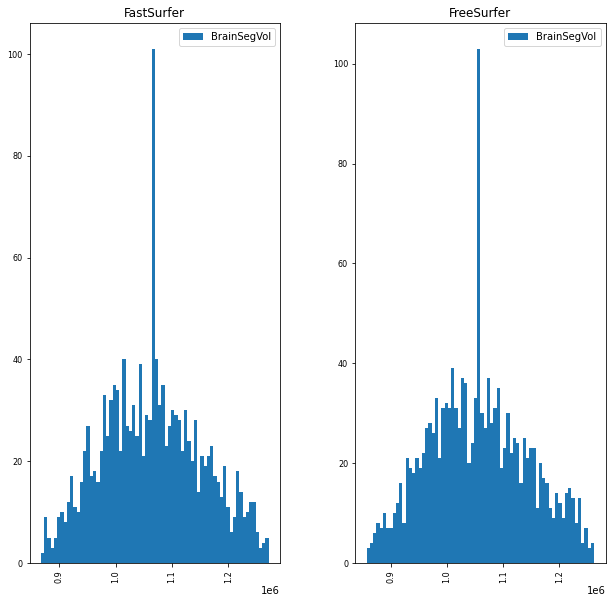

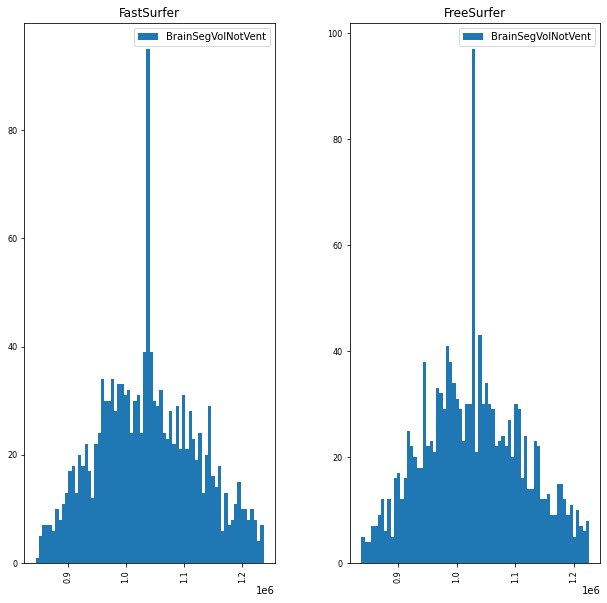

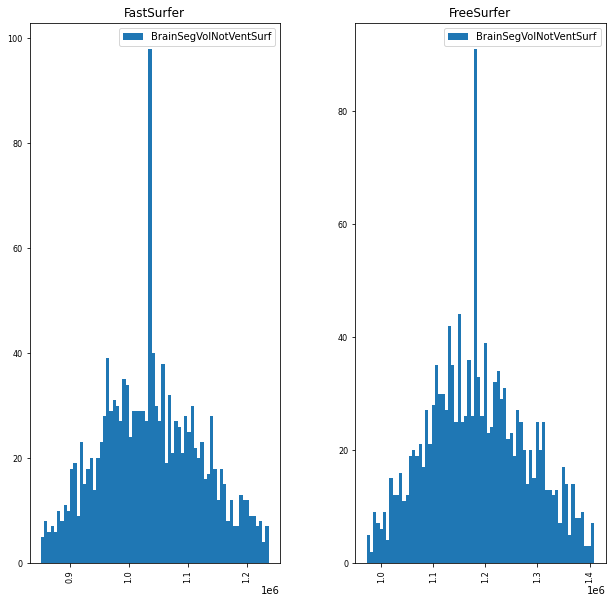

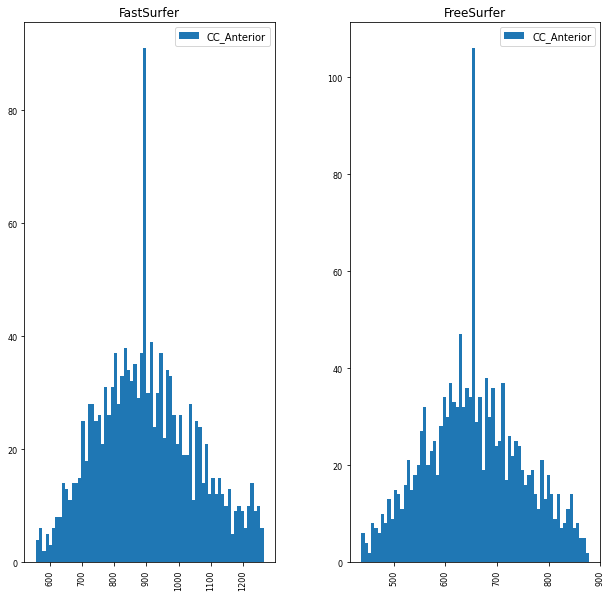

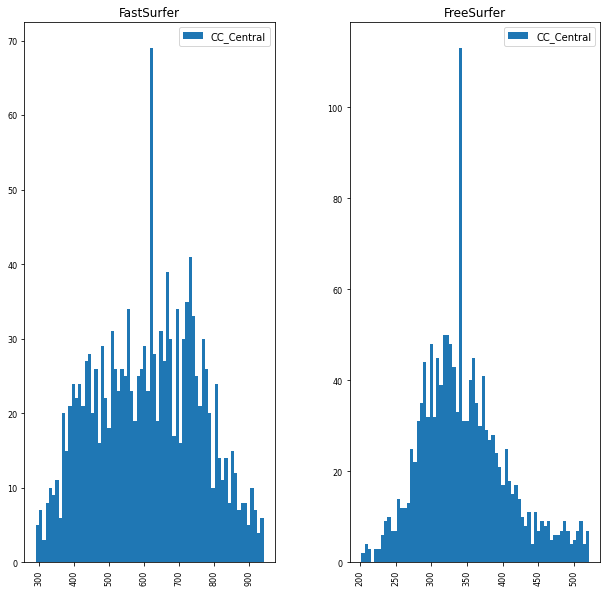

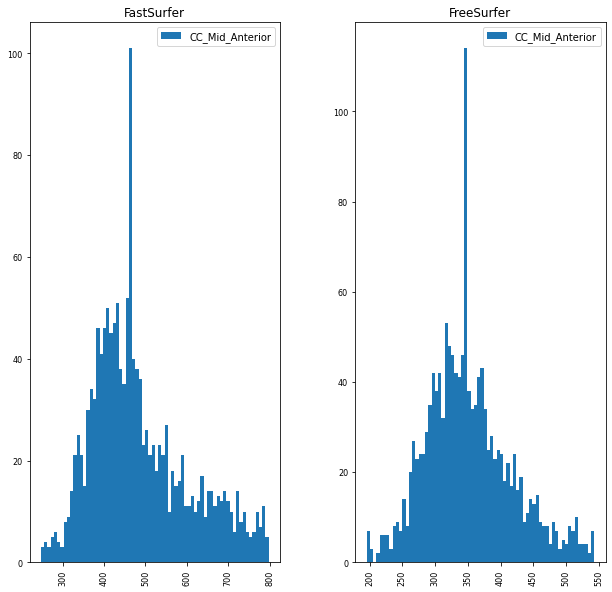

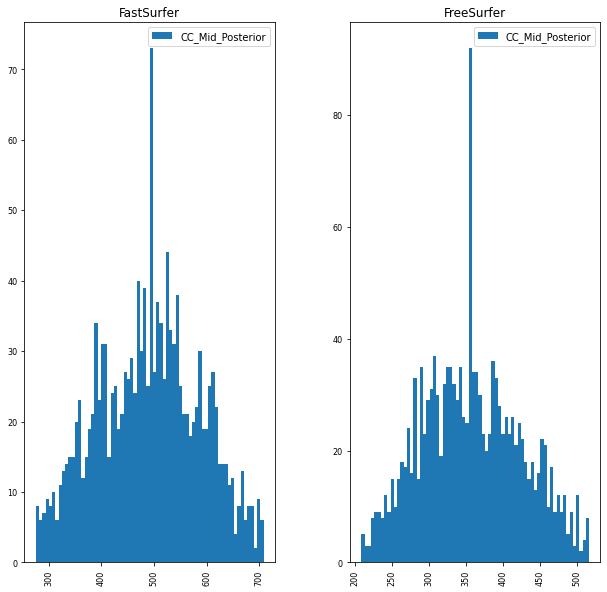

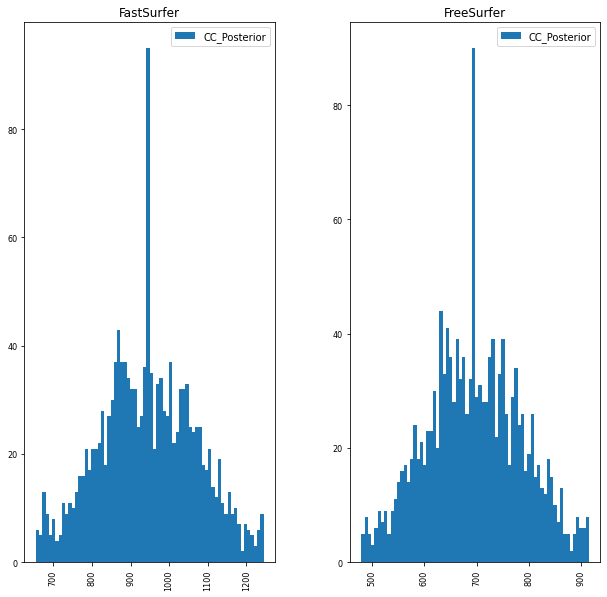

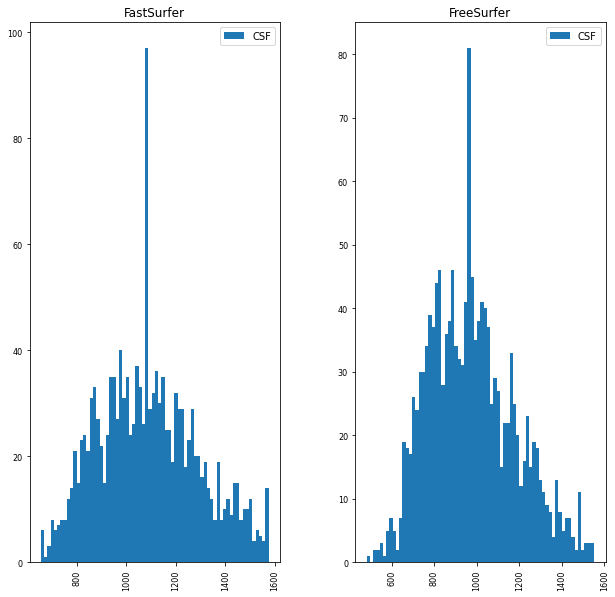

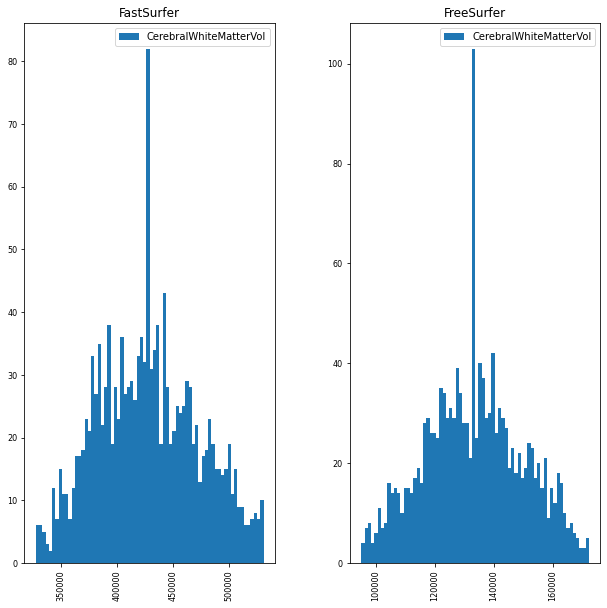

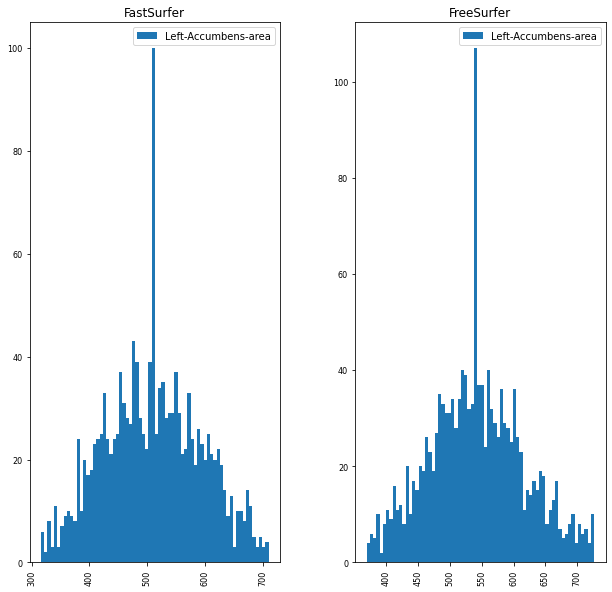

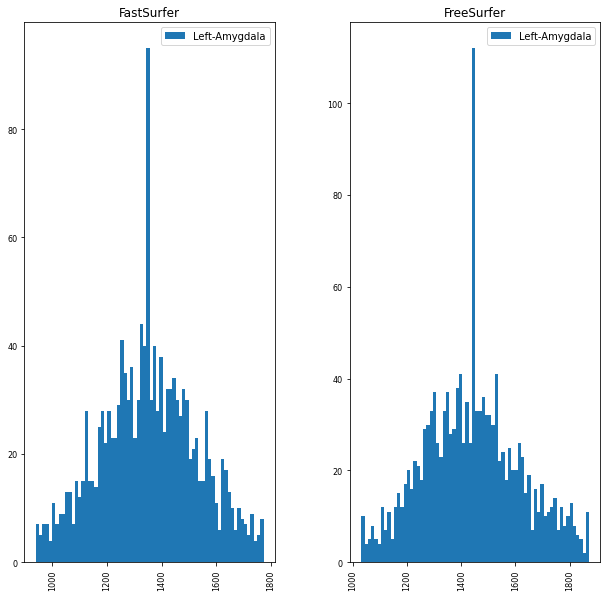

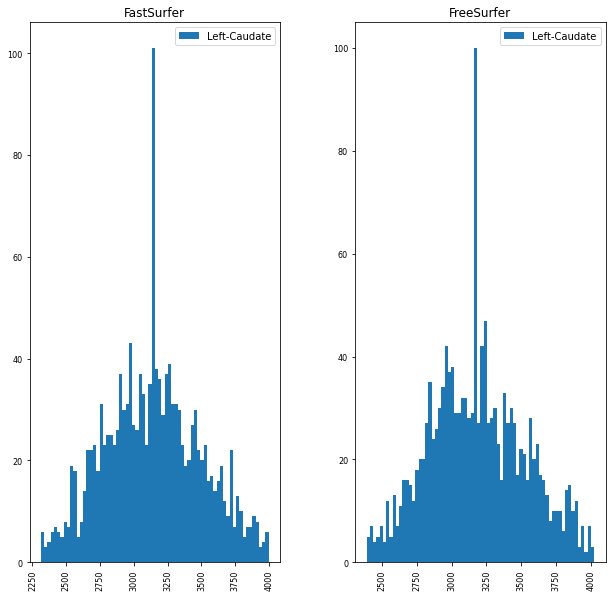

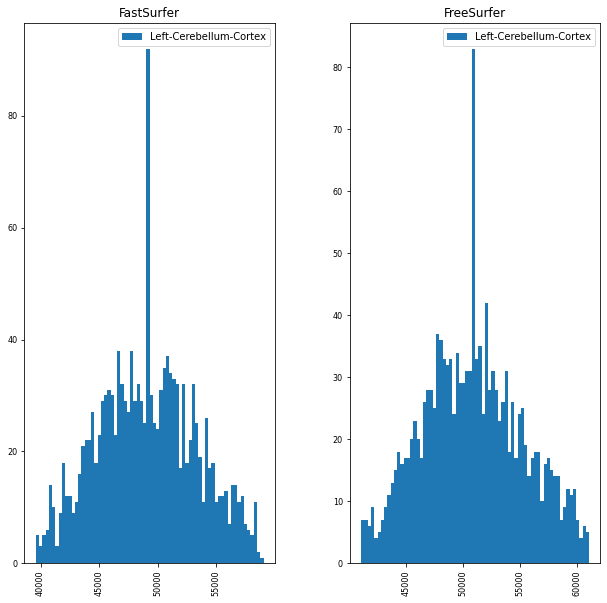

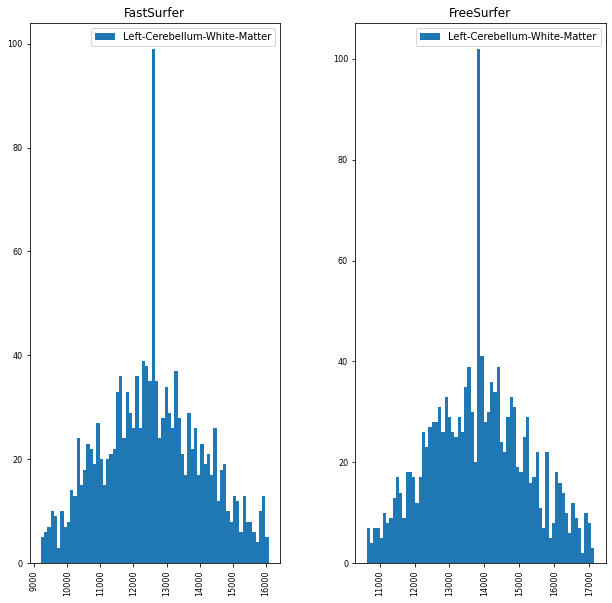

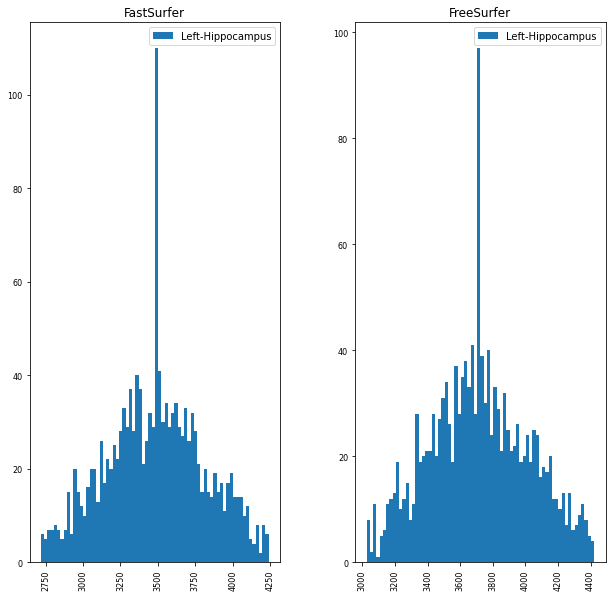

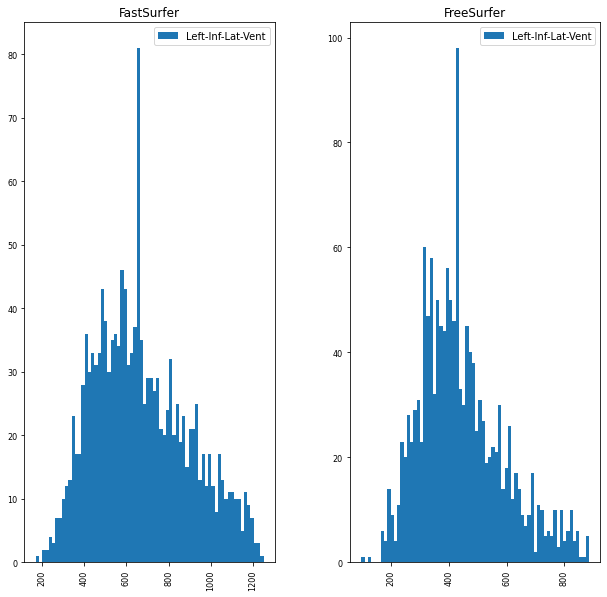

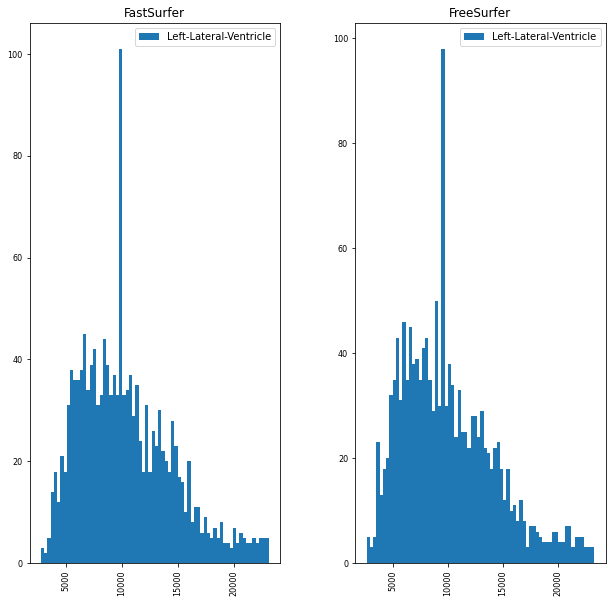

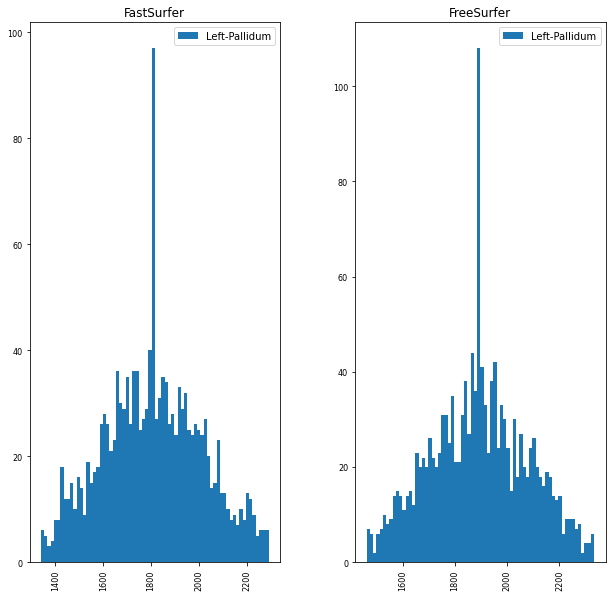

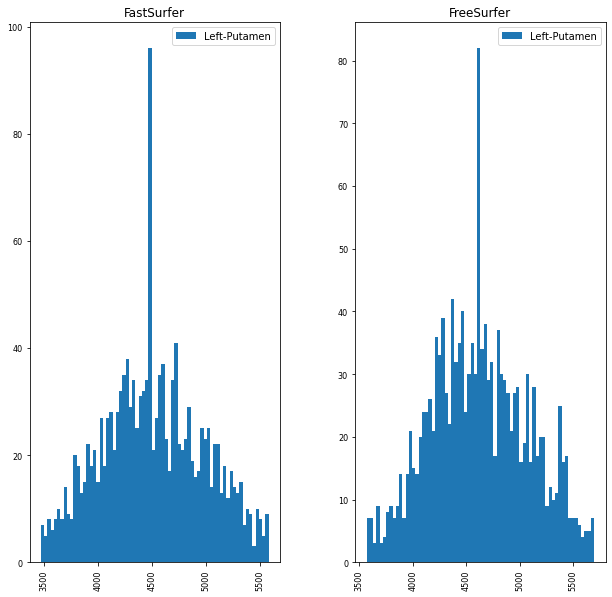

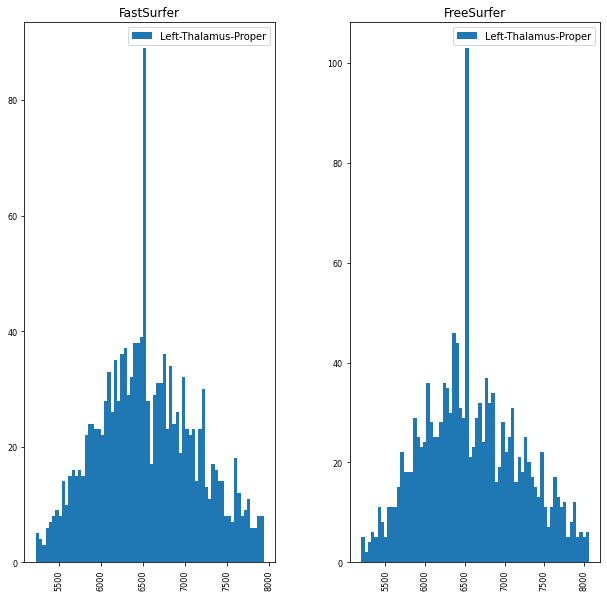

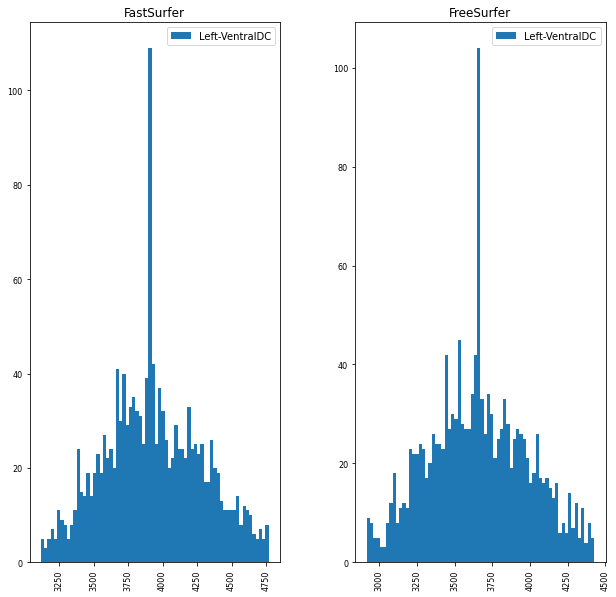

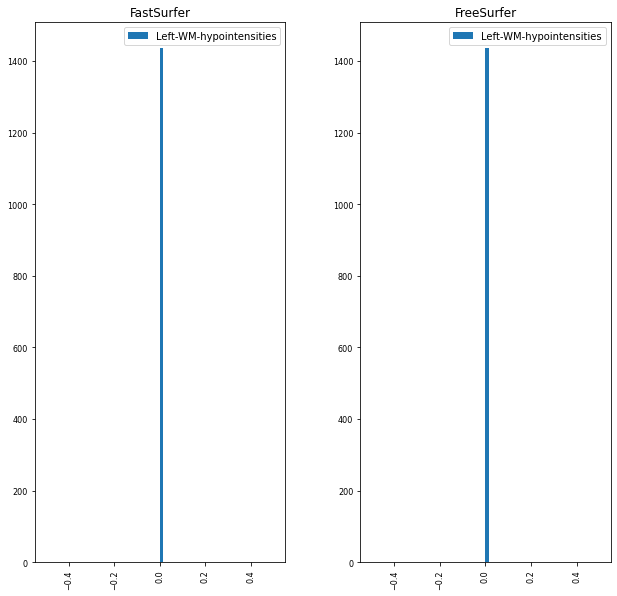

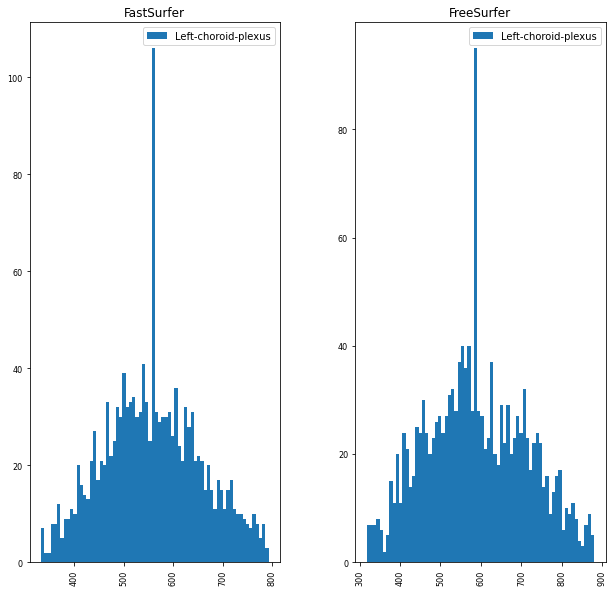

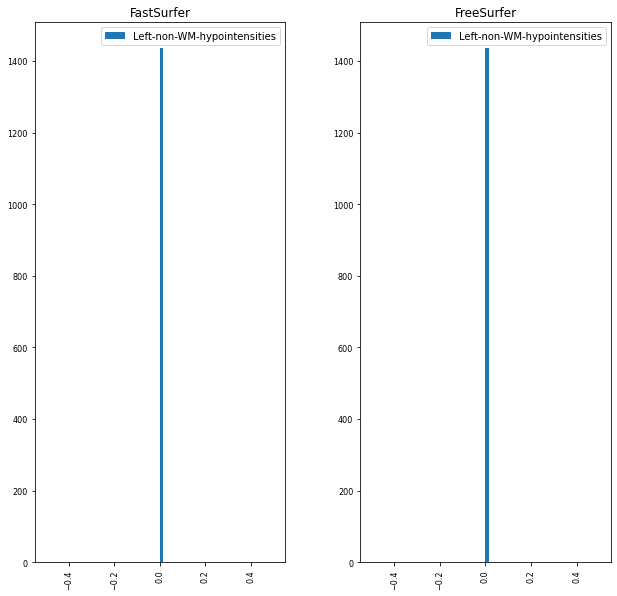

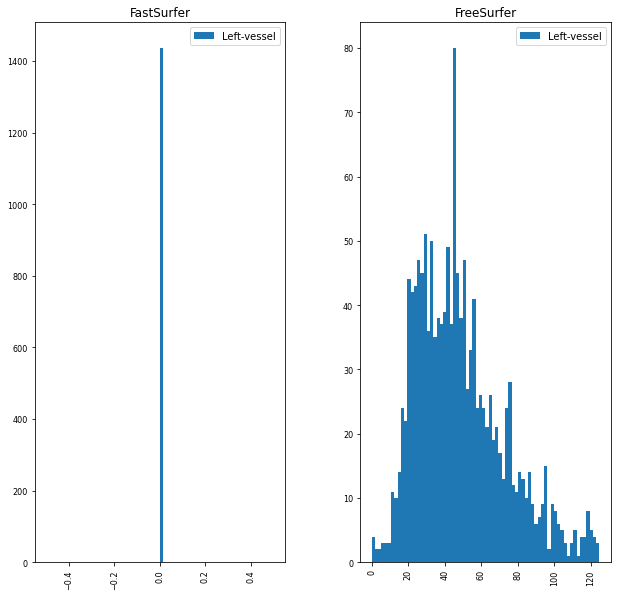

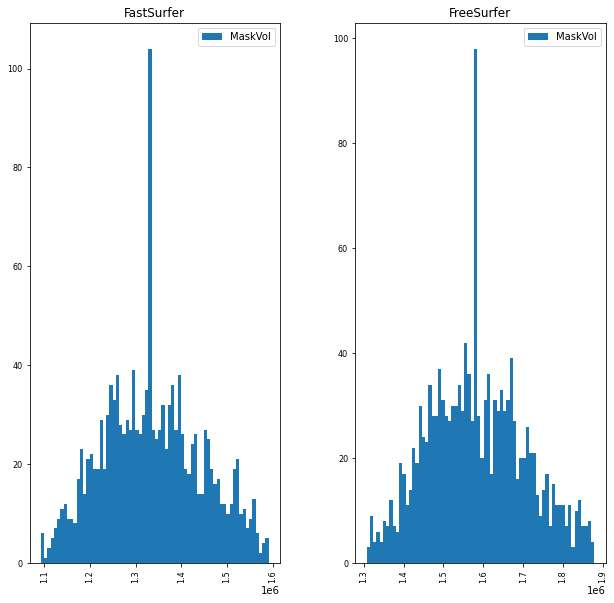

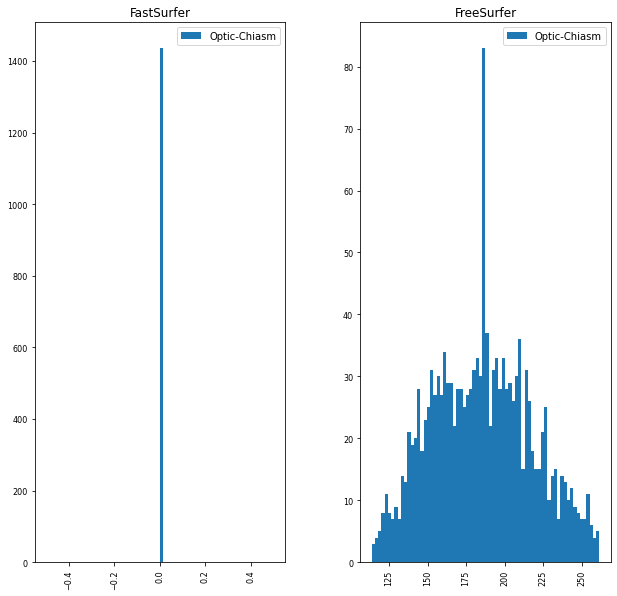

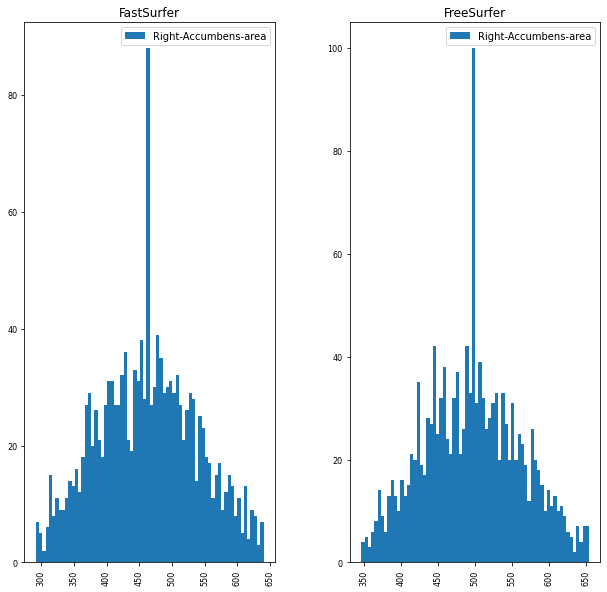

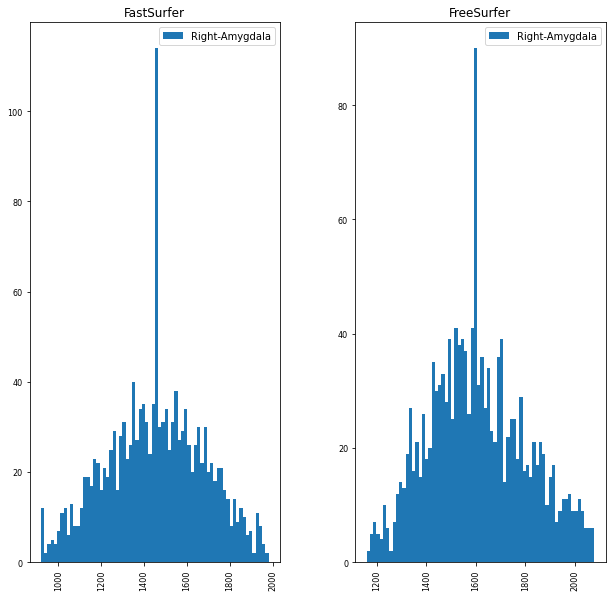

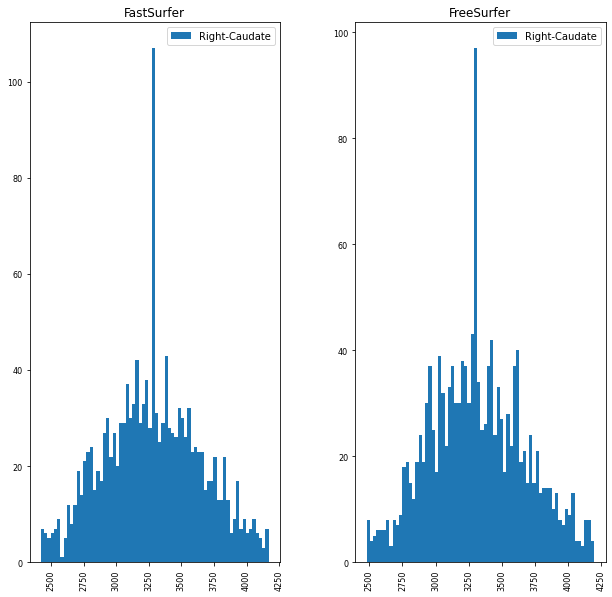

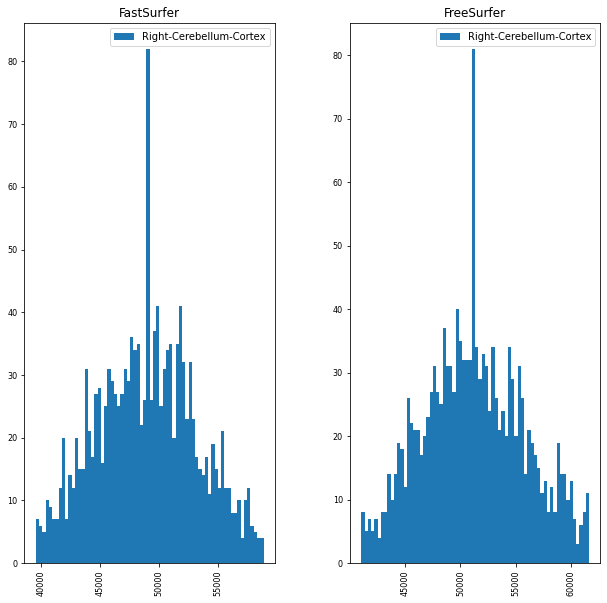

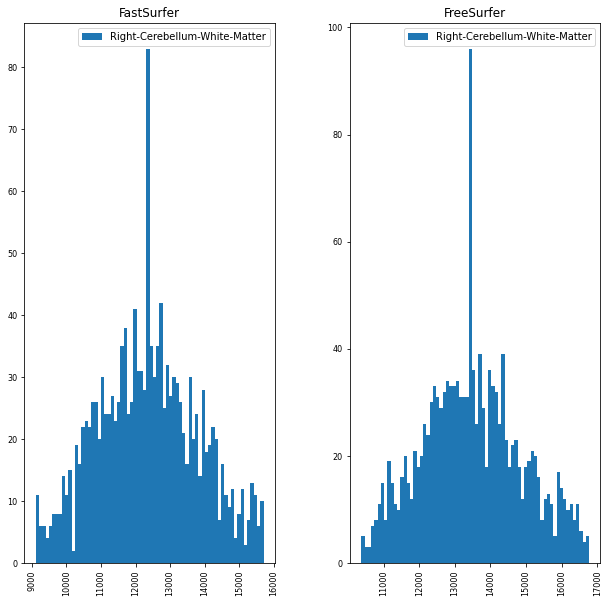

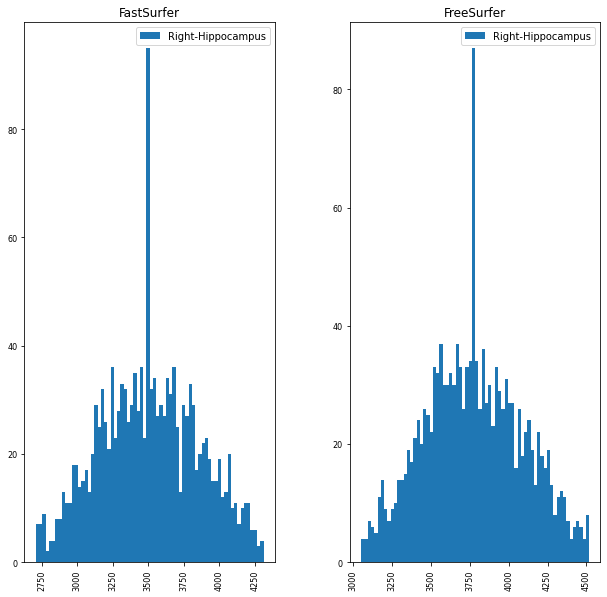

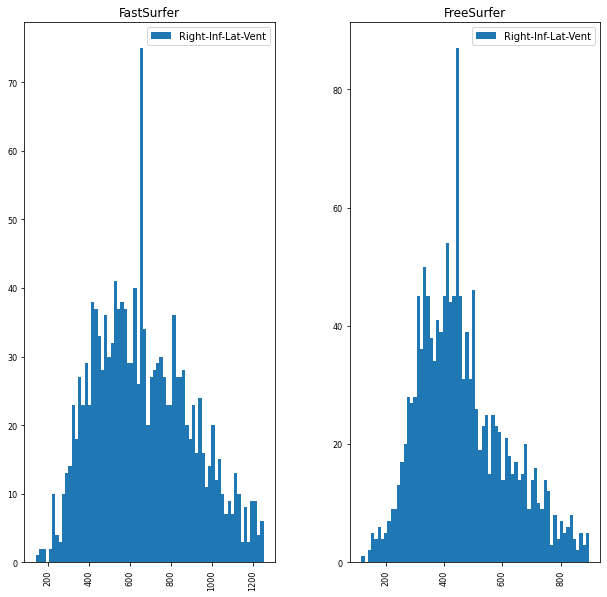

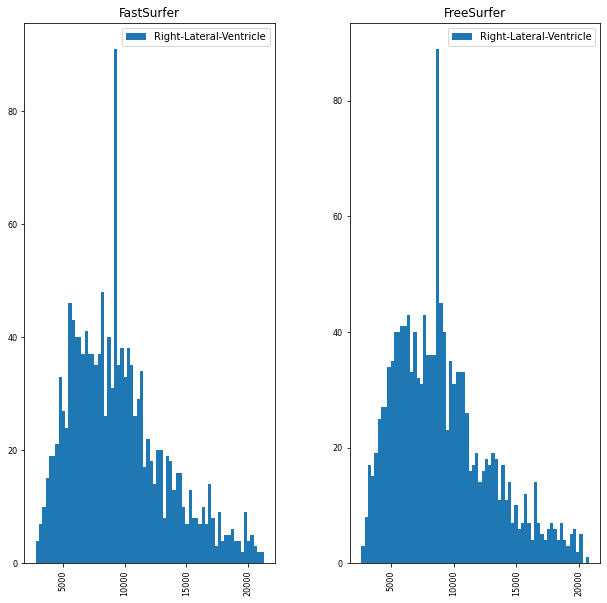

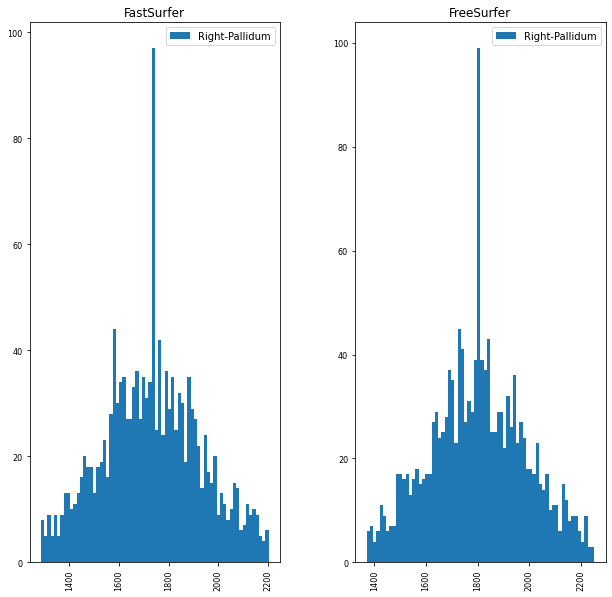

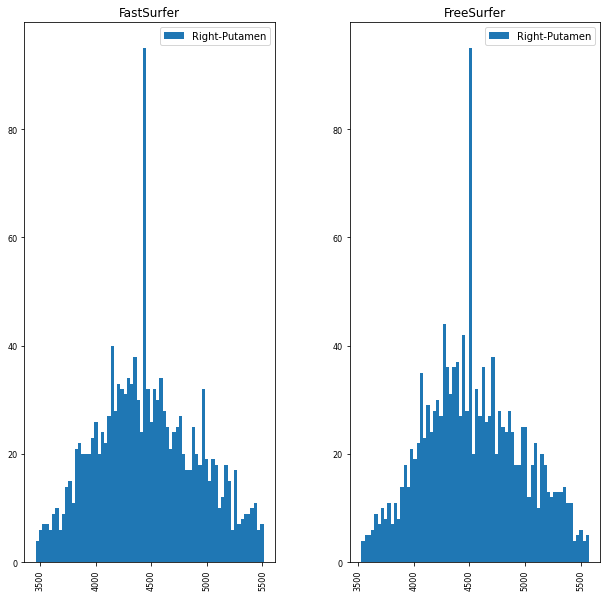

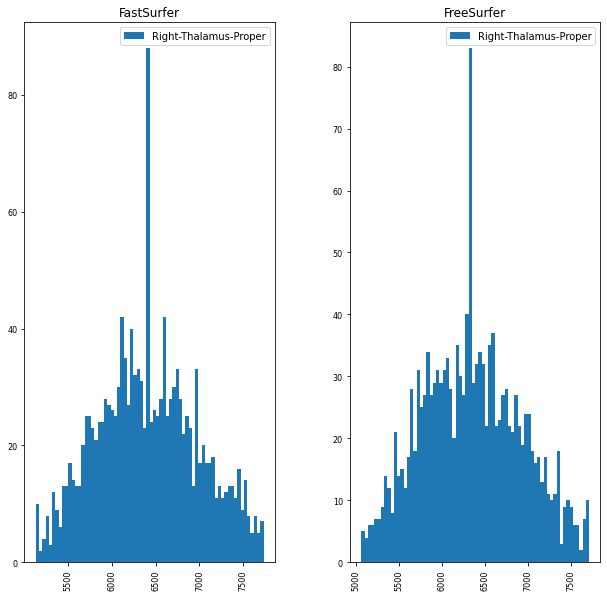

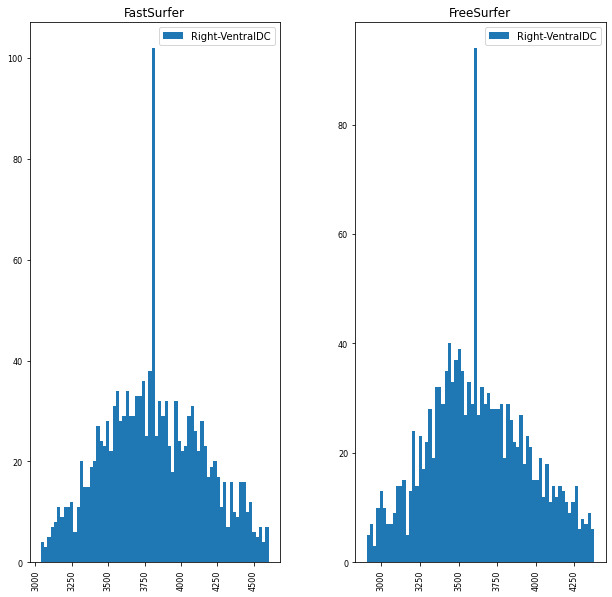

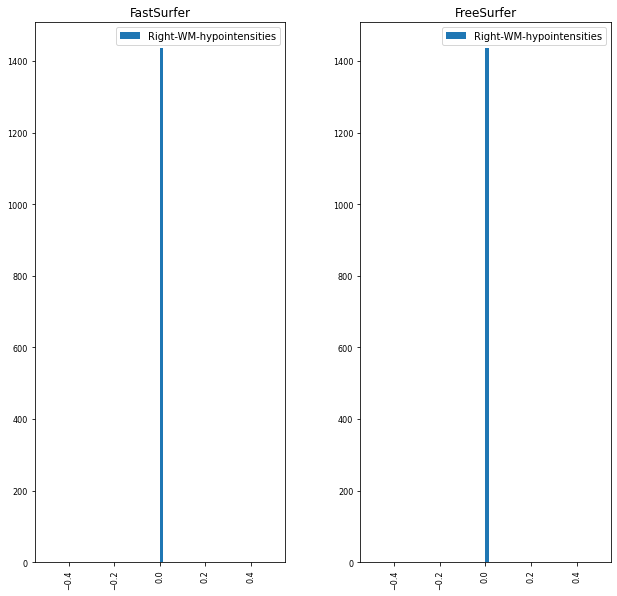

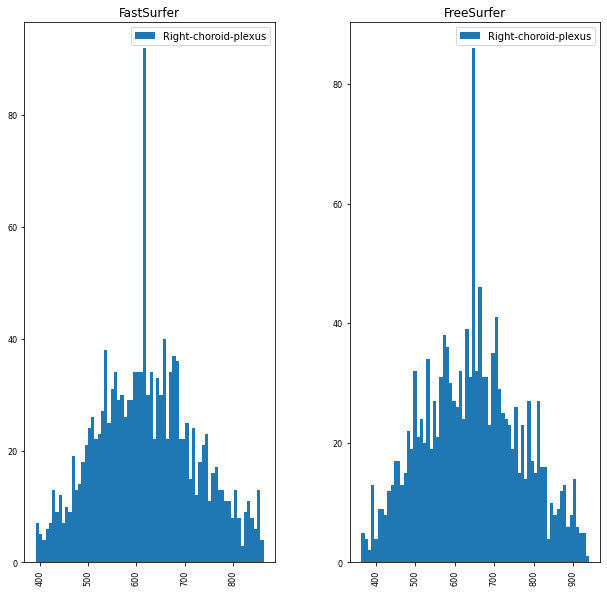

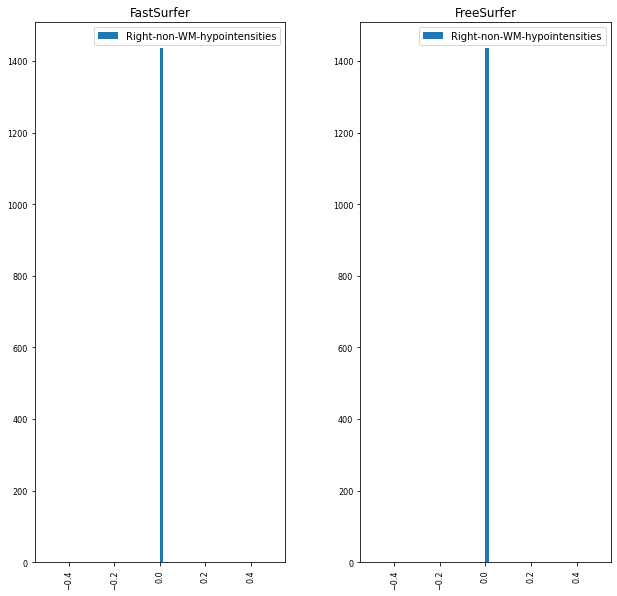

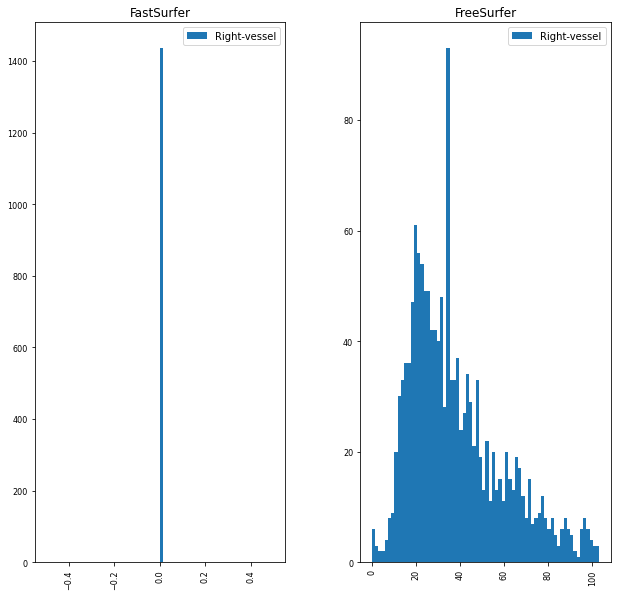

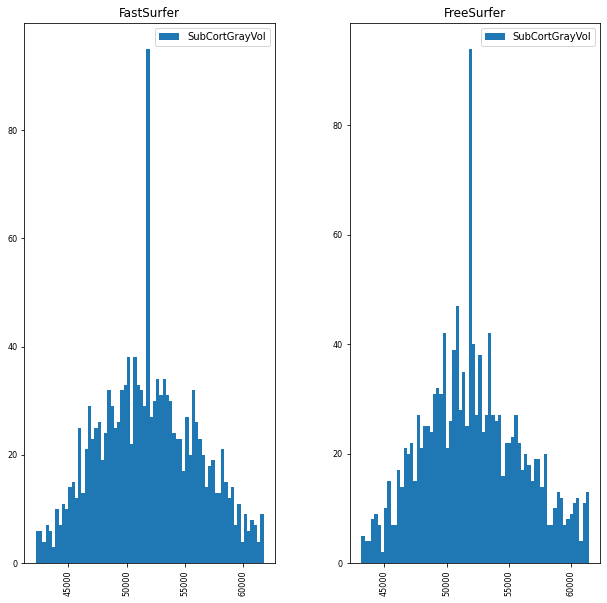

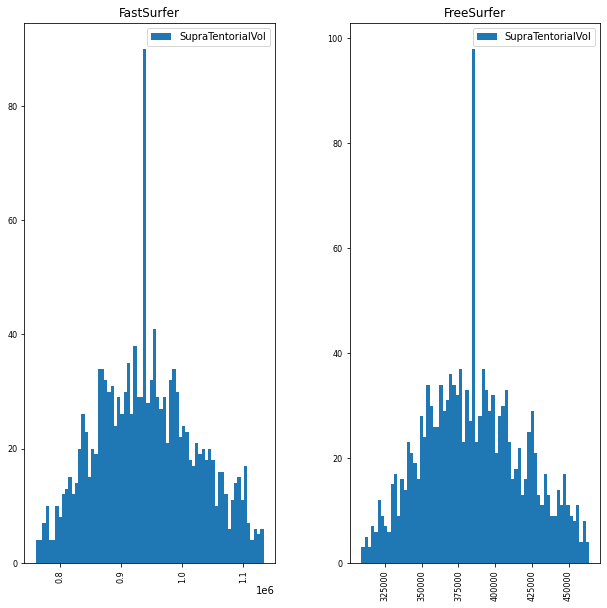

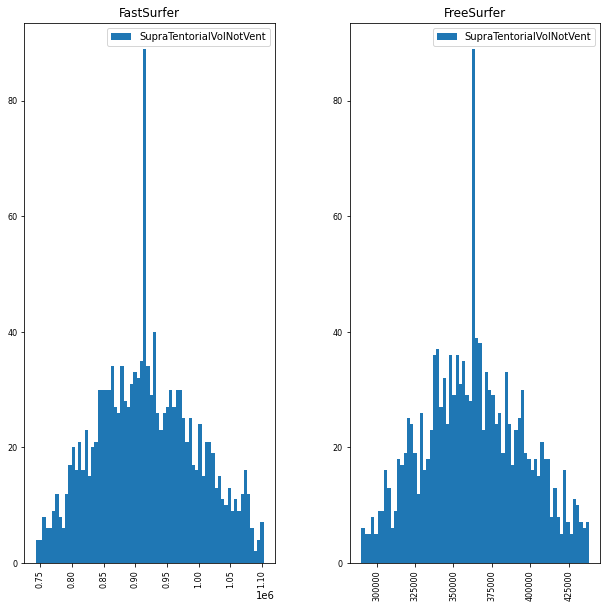

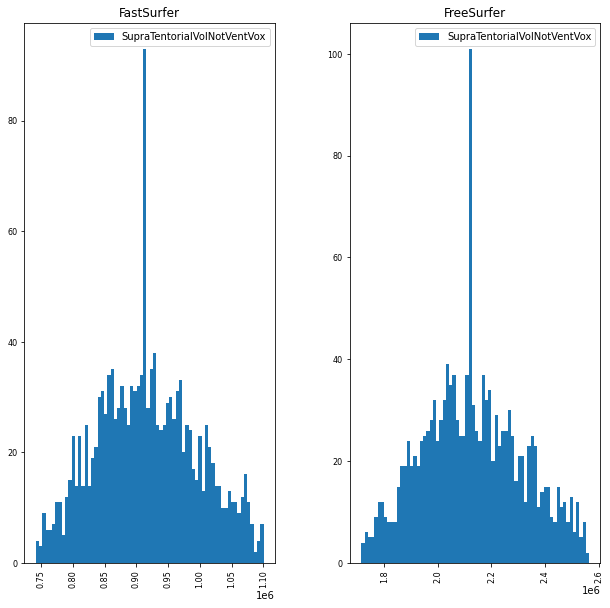

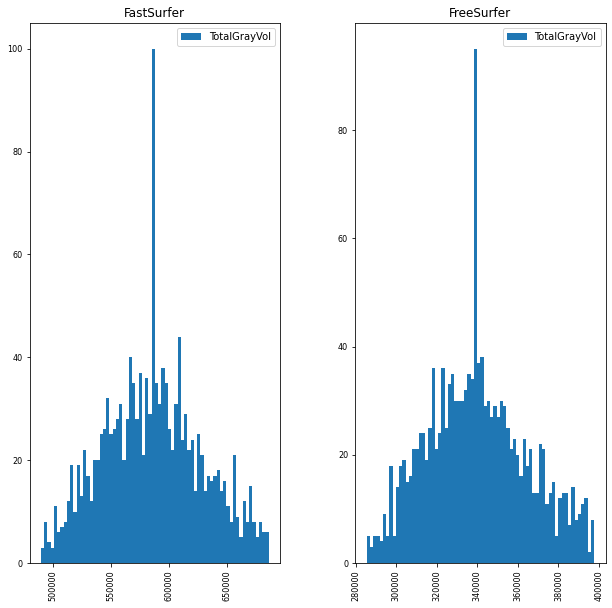

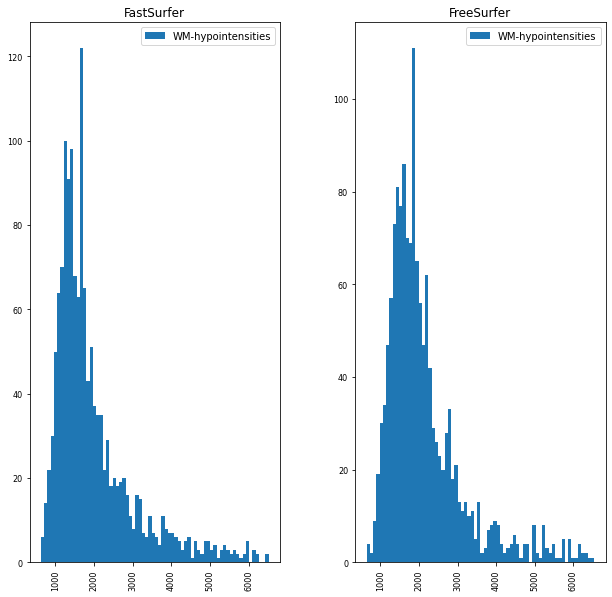

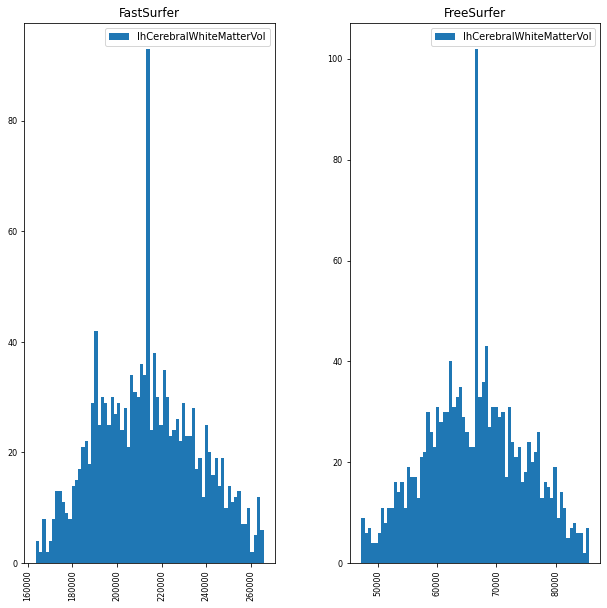

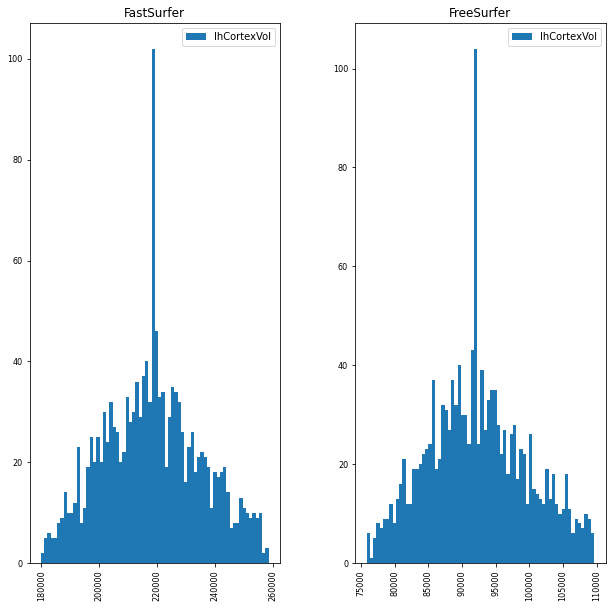

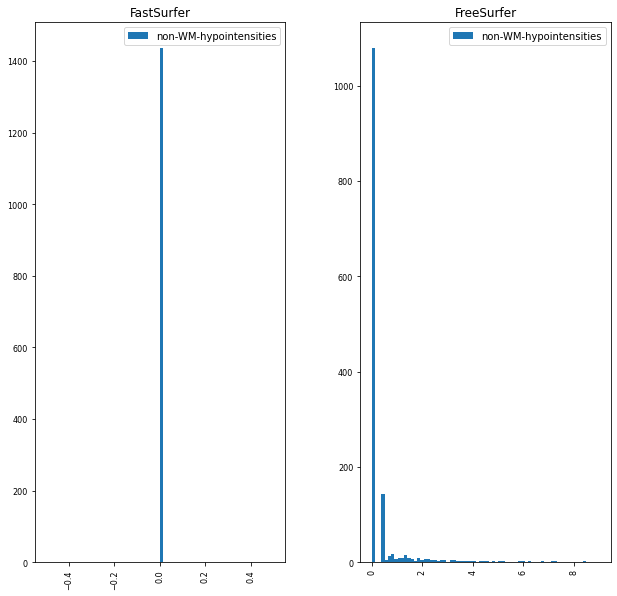

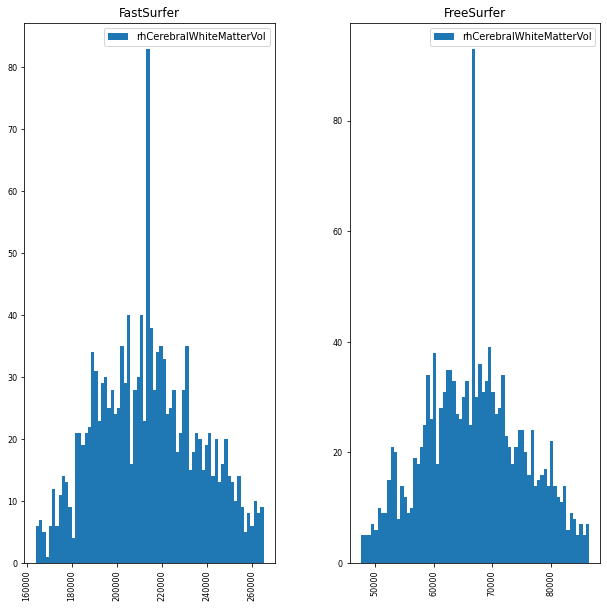

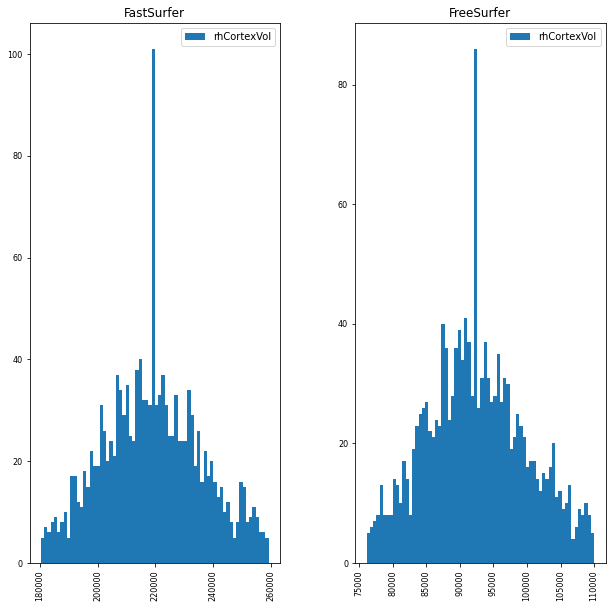

In [65]:
#Histograms

for i in range(len(concat_df.columns.tolist())):
    concat_df.hist(column=concat_df.columns[i],by='Software',figsize=(10,10), bins=70, xlabelsize=8, ylabelsize=8, legend=True)
    plt.show()

# Future objectives

- Studying the way FastSurfer works, in comparison to FreeSurfer, deppending on the age of the patient